# Handwriting Recognition using CNN


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
directory = '/content/drive/My Drive/HandwrittenDigitRecognition/Img'
files=os.listdir(directory)
print(files[0:5])
print(len(files))

Mounted at /content/drive
['img013-044.png', 'img044-026.png', 'img059-005.png', 'img062-018.png', 'img003-050.png']
3410


In [ ]:
files.sort()
files = files[0:550]
print(files[0:5])

['img001-001.png', 'img001-002.png', 'img001-003.png', 'img001-004.png', 'img001-005.png']


In [ ]:
#import random
#random.shuffle(files)
#print(files[0:5])

In [ ]:
# filename and image data
datafile=[]
data=[]
for file in files:
    image=load_img(os.path.join(directory,file),grayscale=False,color_mode='rgb',target_size=(100,100))
    image=img_to_array(image)
    image=image/255.0
    data+=[image]
    datafile+=[file]
print(datafile[0:5])
print(len(datafile))

['img001-001.png', 'img001-002.png', 'img001-003.png', 'img001-004.png', 'img001-005.png']
550


In [ ]:
train=np.array(data)
print(train.shape)

(550, 100, 100, 3)


In [ ]:
df_english=pd.read_csv('/content/drive/My Drive/HandwrittenDigitRecognition/english.csv')
df_english = df_english.loc[range(0,550),:]
df_english.head(5)

image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0

In [ ]:
factlabel=pd.factorize(df_english['label'])

print(factlabel[0])
print(factlabel[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 

In [ ]:
labelfile=[]
for item in df_english['image']:
    folderName, fileName = item.split('/')
    labelfile.append(fileName)
df_english['fileName']=labelfile
df_english['numericalLabel']=factlabel[0]

df_english.head(5)

image label        fileName  numericalLabel
0  Img/img001-001.png     0  img001-001.png               0
1  Img/img001-002.png     0  img001-002.png               0
2  Img/img001-003.png     0  img001-003.png               0
3  Img/img001-004.png     0  img001-004.png               0
4  Img/img001-005.png     0  img001-005.png               0

In [ ]:
englishArray = []
for item in datafile:
    aux = df_english.loc[df_english['fileName']==item,['numericalLabel']].to_numpy()[0][0]
    englishArray = np.append(englishArray,aux)
    
print(englishArray[0:5])
print(datafile[0:5])

[0. 0. 0. 0. 0.]
['img001-001.png', 'img001-002.png', 'img001-003.png', 'img001-004.png', 'img001-005.png']


In [ ]:
categoricalData=to_categorical(englishArray)
catArray=np.array(categoricalData)

print("Data Shape:{}\nLabels shape: {}".format(train.shape,catArray.shape))

Data Shape:(550, 100, 100, 3)
Labels shape: (550, 10)


In [ ]:
catArray.shape

(550, 10)

We first split 20% of data in test and 80% in train, and then we split our train samples into 20% validation, 80% train

In [ ]:
from sklearn.model_selection import train_test_split
#20% test, 80% train of the total
Xtrain,X_test,ytrain,y_test=train_test_split(train,catArray,test_size=0.2,random_state=44)
#20% validation, 80% train of the train
X_train,X_val,y_train,y_val=train_test_split(Xtrain,ytrain,test_size=0.2,random_state=44)

(-0.5, 99.5, 99.5, -0.5)

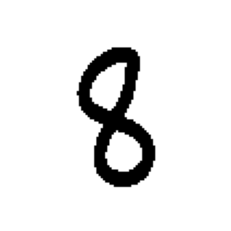

In [ ]:
plt.imshow(X_train[0])
plt.grid(False)
plt.axis('off')

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

(-0.5, 99.5, 99.5, -0.5)

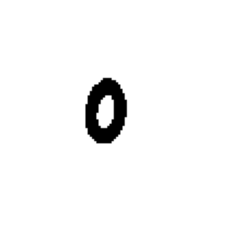

In [ ]:
plt.imshow(X_val[0])
plt.grid(False)
plt.axis('off')

In [ ]:
y_val[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

(-0.5, 99.5, 99.5, -0.5)

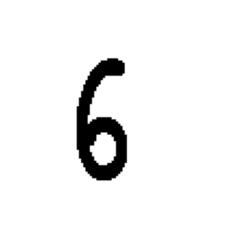

In [ ]:
plt.imshow(X_test[0])
plt.grid(False)
plt.axis('off')

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))

print('X_val: ' + str(X_val.shape))
print('y_val: ' + str(y_val.shape))

print('X_test: ' + str(X_test.shape))
print('y_test: ' + str(y_test.shape))

X_train: (352, 100, 100, 3)
y_train: (352, 10)
X_val: (88, 100, 100, 3)
y_val: (88, 10)
X_test: (110, 100, 100, 3)
y_test: (110, 10)


#We create two use cases: with and without data augmentation 

##Data Augmentation 

In [ ]:
X_train_DA = X_train
y_train_DA = y_train

X_val_DA = X_val
y_val_DA = y_val

X_test_DA = X_test
y_test_DA = y_test

We double the amount of train and validation samples with transformation of images made from the original images

In [ ]:
import random
from keras.models import Sequential
from tensorflow.keras.layers import RandomRotation, RandomZoom, RandomTranslation, RandomContrast
from tensorflow.image import random_brightness
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
#To do the transfromation:
#- We rotate the image between 10% and 30%, and between -30% and -10%
#- We zoom the image between 10% and 30%, and between -30% and -10%
#- We translate the image between 10 and 20%, and between -10% and -20% in height and same values in width
#- We choose a random value of contrast for the image between 0.5 and 0.9 
#- We choose a random value of brightness for the image between -0.4 and 0.4

def data_aug(image):
  sign = random.choice((-1, 1))
  data_augmentation = tf.keras.Sequential([
     RandomRotation(factor=(min([sign*0.1, sign*0.3]), max([sign*0.1, sign*0.3]))),
     RandomZoom(height_factor=(min([sign*0.1, sign*0.3]), max([sign*0.1, sign*0.3])),width_factor=(min([sign*0.1, sign*0.3]), max([sign*0.1, sign*0.3]))),
     RandomTranslation(height_factor=(min([sign*0.1, sign*0.2]), max([sign*0.1, sign*0.2])),width_factor=(min([sign*0.1, sign*0.2]), max([sign*0.1, sign*0.2]))),
     RandomContrast(factor=(0.5, 0.9))
  ])
  image = random_brightness(data_augmentation(image),0.4)
  return image

In [ ]:
X_train_DA = X_train_DA.tolist()
y_train_DA = y_train_DA.tolist()
aux = 0 
for i in X_train:  
  image = data_aug(i)
  image=img_to_array(image)
  X_train_DA += [image]
  y_train_DA += [y_train[aux]]
  aux = aux + 1
X_train_DA = np.array(X_train_DA)
y_train_DA =np.array(y_train_DA)
print(X_train_DA.shape)
print(y_train_DA.shape)

(704, 100, 100, 3)
(704, 10)


(-0.5, 99.5, 99.5, -0.5)

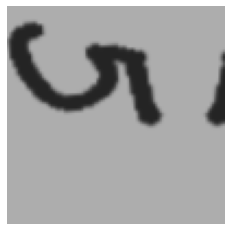

In [ ]:
plt.imshow(X_train_DA[700])
plt.grid(False)
plt.axis('off')

In [ ]:
y_train_DA[700]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
X_val_DA = X_val_DA.tolist()
y_val_DA = y_val_DA.tolist()
aux = 0
for i in X_val:  
  image = data_aug(i)
  image=img_to_array(image)
  X_val_DA += [image]
  y_val_DA += [y_val[aux]]
  aux = aux + 1
X_val_DA = np.array(X_val_DA)
y_val_DA =np.array(y_val_DA)
print(X_val_DA.shape)
print(y_val_DA.shape)

(176, 100, 100, 3)
(176, 10)


(-0.5, 99.5, 99.5, -0.5)

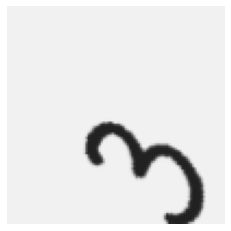

In [ ]:
plt.imshow(X_val_DA[100])
plt.grid(False)
plt.axis('off')

In [ ]:
y_val_DA[100]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

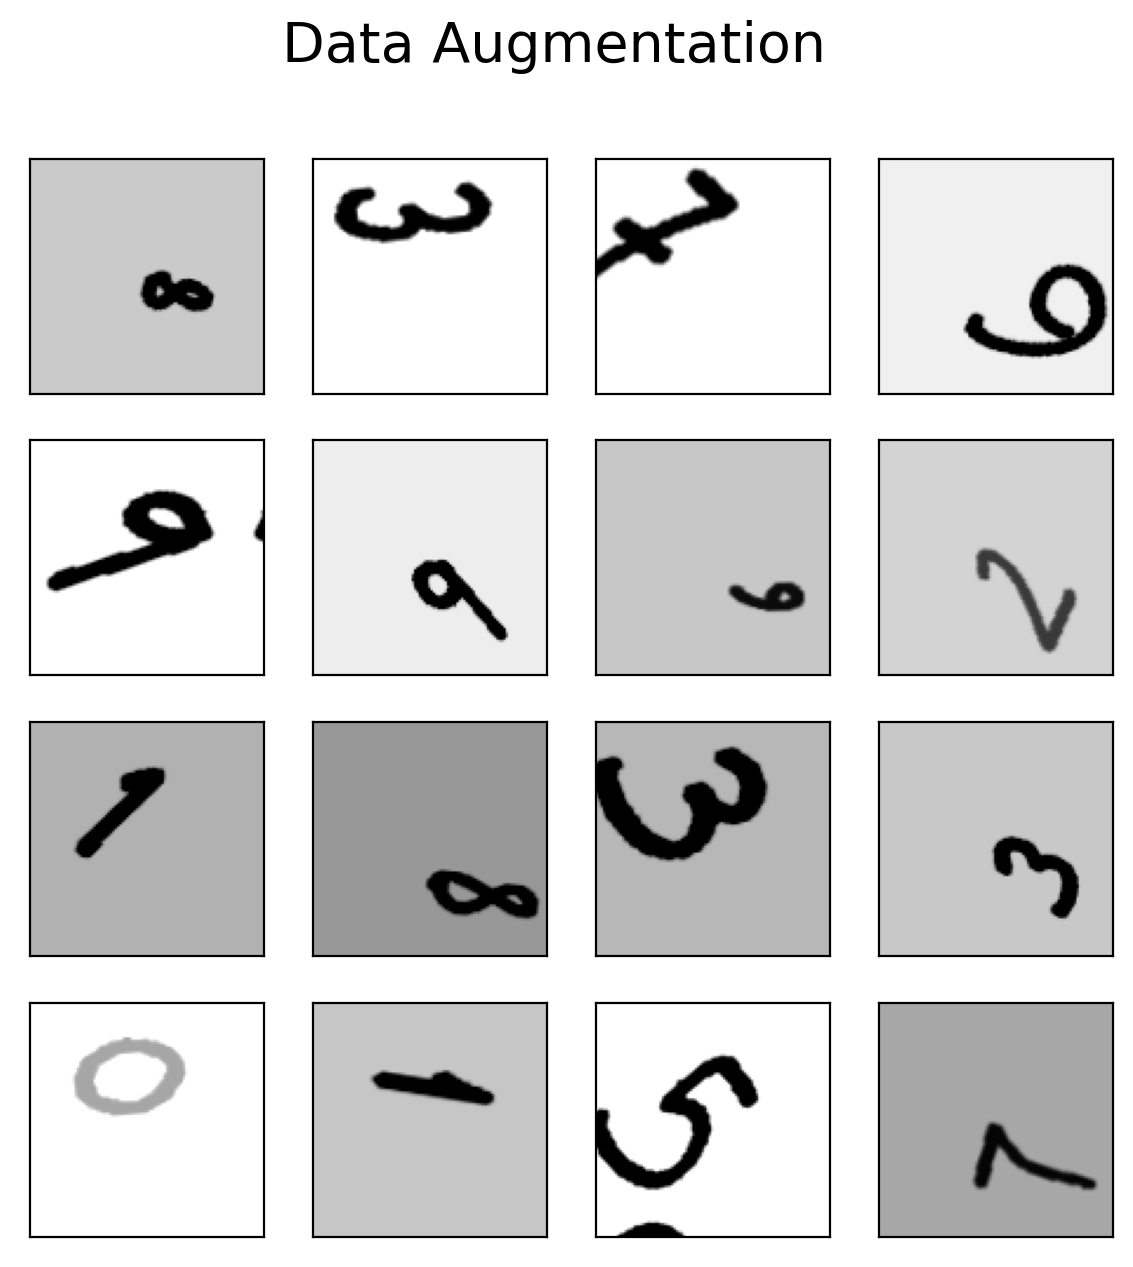

In [ ]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina', quality=100)

fig,ax = plt.subplots(nrows=4,ncols=4,figsize=(7,7))
plt.suptitle("Data Augmentation",size = 20)
k = 0 
for i in range(4):
  for j in range(4):
    ax[i][j].imshow(X_train_DA[353+k])
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])
    k = k + 1
plt.show()

Now we try regular model

VGG style

In [ ]:
from keras.models import Sequential

from keras.layers import MaxPooling2D, Dropout, Dense, Flatten

from keras.layers import Convolution2D as Conv2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_444"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 48, 48, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 44, 44, 64)        36928     
                                                    

In [ ]:
history=model.fit(X_train, y_train,
         epochs=100,
         batch_size=128,
         validation_data=(X_val, y_val),
         verbose=1)

Epoch 1/100
3/3 [==============================] - 17s 5s/step - loss: 2.3569 - accuracy: 0.0852 - val_loss: 2.3094 - val_accuracy: 0.0795
Epoch 2/100
3/3 [==============================] - 16s 5s/step - loss: 2.3071 - accuracy: 0.0881 - val_loss: 2.3085 - val_accuracy: 0.0909
Epoch 3/100
3/3 [==============================] - 16s 5s/step - loss: 2.3003 - accuracy: 0.1420 - val_loss: 2.3077 - val_accuracy: 0.0909
Epoch 4/100
3/3 [==============================] - 16s 5s/step - loss: 2.2954 - accuracy: 0.1278 - val_loss: 2.3075 - val_accuracy: 0.0909
Epoch 5/100
3/3 [==============================] - 16s 5s/step - loss: 2.2937 - accuracy: 0.1108 - val_loss: 2.3078 - val_accuracy: 0.0909
Epoch 6/100
3/3 [==============================] - 16s 5s/step - loss: 2.2901 - accuracy: 0.1392 - val_loss: 2.3086 - val_accuracy: 0.0909
Epoch 7/100
3/3 [==============================] - 16s 5s/step - loss: 2.2940 - accuracy: 0.1364 - val_loss: 2.3043 - val_accuracy: 0.0909
Epoch 8/100
3/3 [==========

In [ ]:
# Check accuracy on train set
loss_train, accuracy_train = model.evaluate(X_train, y_train, batch_size=128)
print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set
loss, accuracy = model.evaluate(X_test, y_test, batch_size=128)
print('\nTest Accuracy=', accuracy)

3/3 [==============================] - 4s 1s/step - loss: 1.9742e-04 - accuracy: 1.0000

Training Accuracy= 1.0
1/1 [==============================] - 1s 1s/step - loss: 1.9368 - accuracy: 0.6818

Test Accuracy= 0.6818181872367859


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
r = 169/255.
g = 96/255.
b = 139/255.

purple = (r,g,b,1)
r=131/255.
g=168/255.
b=184/255.
blue = (r,g,b,1)

Train Accuracy:  0.99
Test Accuracy:  0.65


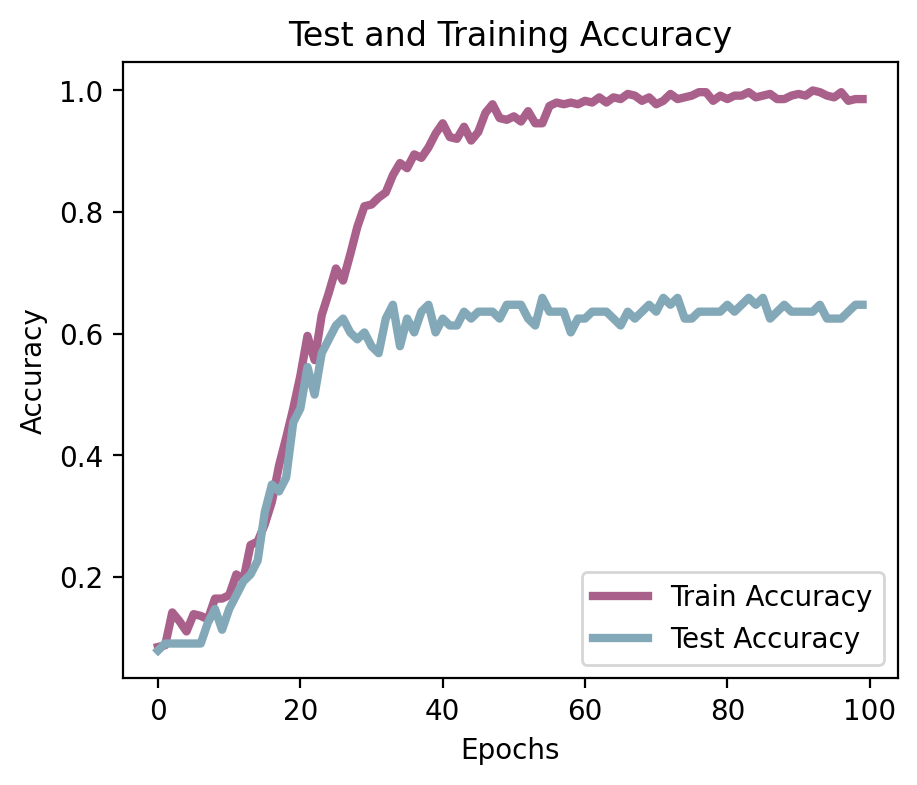

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina', quality=100)

print('Train Accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['accuracy'])),history.history['accuracy'],color = purple, linewidth = 3, label='Train Accuracy')
plt.plot(range(0, len(history.history['val_accuracy'])),history.history['val_accuracy'],color = blue, linewidth = 3, label='Test Accuracy')
plt.legend(loc='lower right')

plt.title('Test and Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)         
plt.rc('axes', titlesize=SMALL_SIZE)   
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=SMALL_SIZE) 
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()

Train Loss:  0.03
Test Loss:  2.7


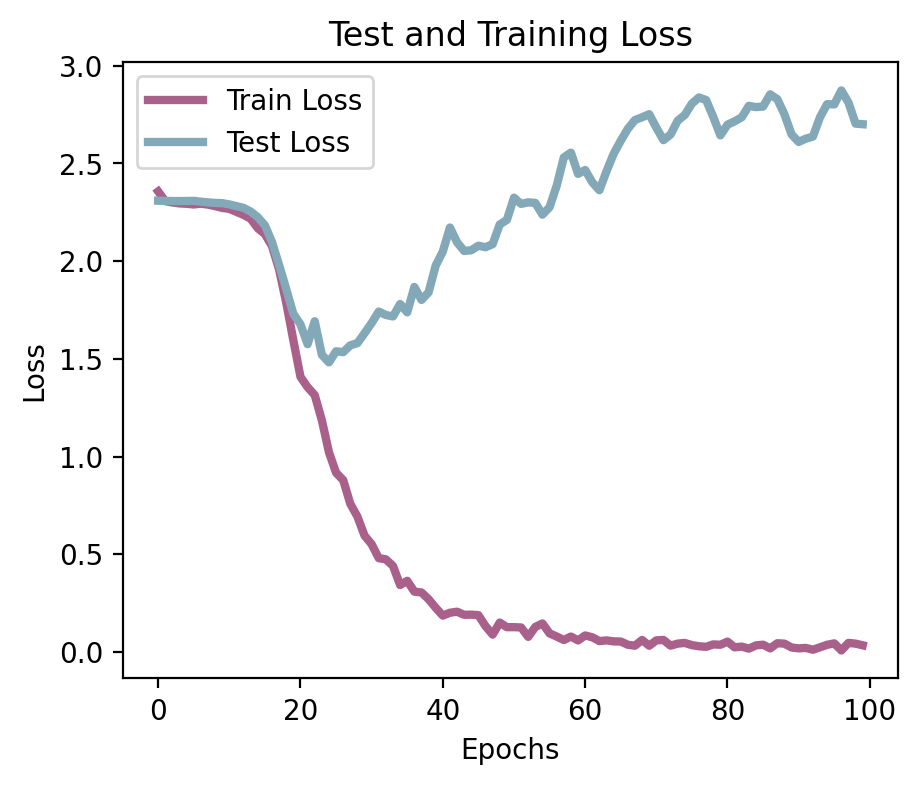

In [ ]:
set_matplotlib_formats('retina', quality=100)

print('Train Loss: ',np.round(history.history['loss'][-1],2))
print('Test Loss: ',np.round(history.history['val_loss'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['loss'])),history.history['loss'],color = purple, linewidth = 3, label='Train Loss')
plt.plot(range(0, len(history.history['val_loss'])),history.history['val_loss'],color = blue, linewidth = 3, label='Test Loss')
plt.legend(loc='upper left')

plt.title('Test and Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)  
plt.rc('axes', labelsize=MEDIUM_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()

In [ ]:
pred_probabilities= model.predict(X_test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',y_test[0:5])

First Five Probs.:
 [[5.6271552e-09 1.7933533e-04 5.4037437e-09 1.7958877e-08 7.2692952e-10
  1.9969979e-05 9.9697852e-01 1.4658604e-13 2.8221388e-03 7.2466095e-09]
 [1.1144188e-11 2.2484341e-10 5.5496802e-08 5.1139054e-05 1.7576340e-10
  9.6588462e-07 2.7672174e-08 7.5026499e-11 9.9994779e-01 8.4641000e-10]
 [2.1032164e-02 1.2318218e-01 6.0728687e-01 1.2759736e-01 3.9958116e-02
  1.5850880e-03 4.9423021e-03 8.7072654e-03 6.5600462e-02 1.0819730e-04]
 [1.7818840e-13 8.3782780e-14 8.8871434e-15 1.4215797e-09 8.3932618e-11
  9.9998581e-01 1.8503133e-07 1.0379189e-14 1.3949140e-05 1.0889288e-08]
 [3.6850807e-09 1.3091199e-06 5.9104686e-06 3.6807817e-09 5.0067843e-05
  3.2956216e-08 1.6280827e-10 7.1490669e-01 5.0330553e-02 2.3470537e-01]]


First Five Classes:
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Confusion Matrix:
 [[ 3  2  0  0  0  0  1  0  1  0]
 [ 0 11  1  0  0  0  0  0  0  1]
 [ 0  0 11  0  0  0  1  1  0  0]
 [ 0  1  0  5  2  1  0  0  3  0]
 [ 0  1  1  0  7  0  1  0  0  2]
 [ 0  0  1  2  0  7  0  1  1  0]
 [ 0  0  0  0  0  0  6  0  0  0]
 [ 0  1  0  1  0  0  0 10  0  1]
 [ 0  0  0  0  0  1  0  0  9  1]
 [ 0  0  0  0  1  0  0  1  3  6]]


[Text(0, 0.5, 'FT_0'),
 Text(0, 1.5, 'FT_1'),
 Text(0, 2.5, 'FT_2'),
 Text(0, 3.5, 'FT_3'),
 Text(0, 4.5, 'FT_4'),
 Text(0, 5.5, 'FT_5'),
 Text(0, 6.5, 'FT_6'),
 Text(0, 7.5, 'FT_7'),
 Text(0, 8.5, 'FT_8'),
 Text(0, 9.5, 'FT_9')]

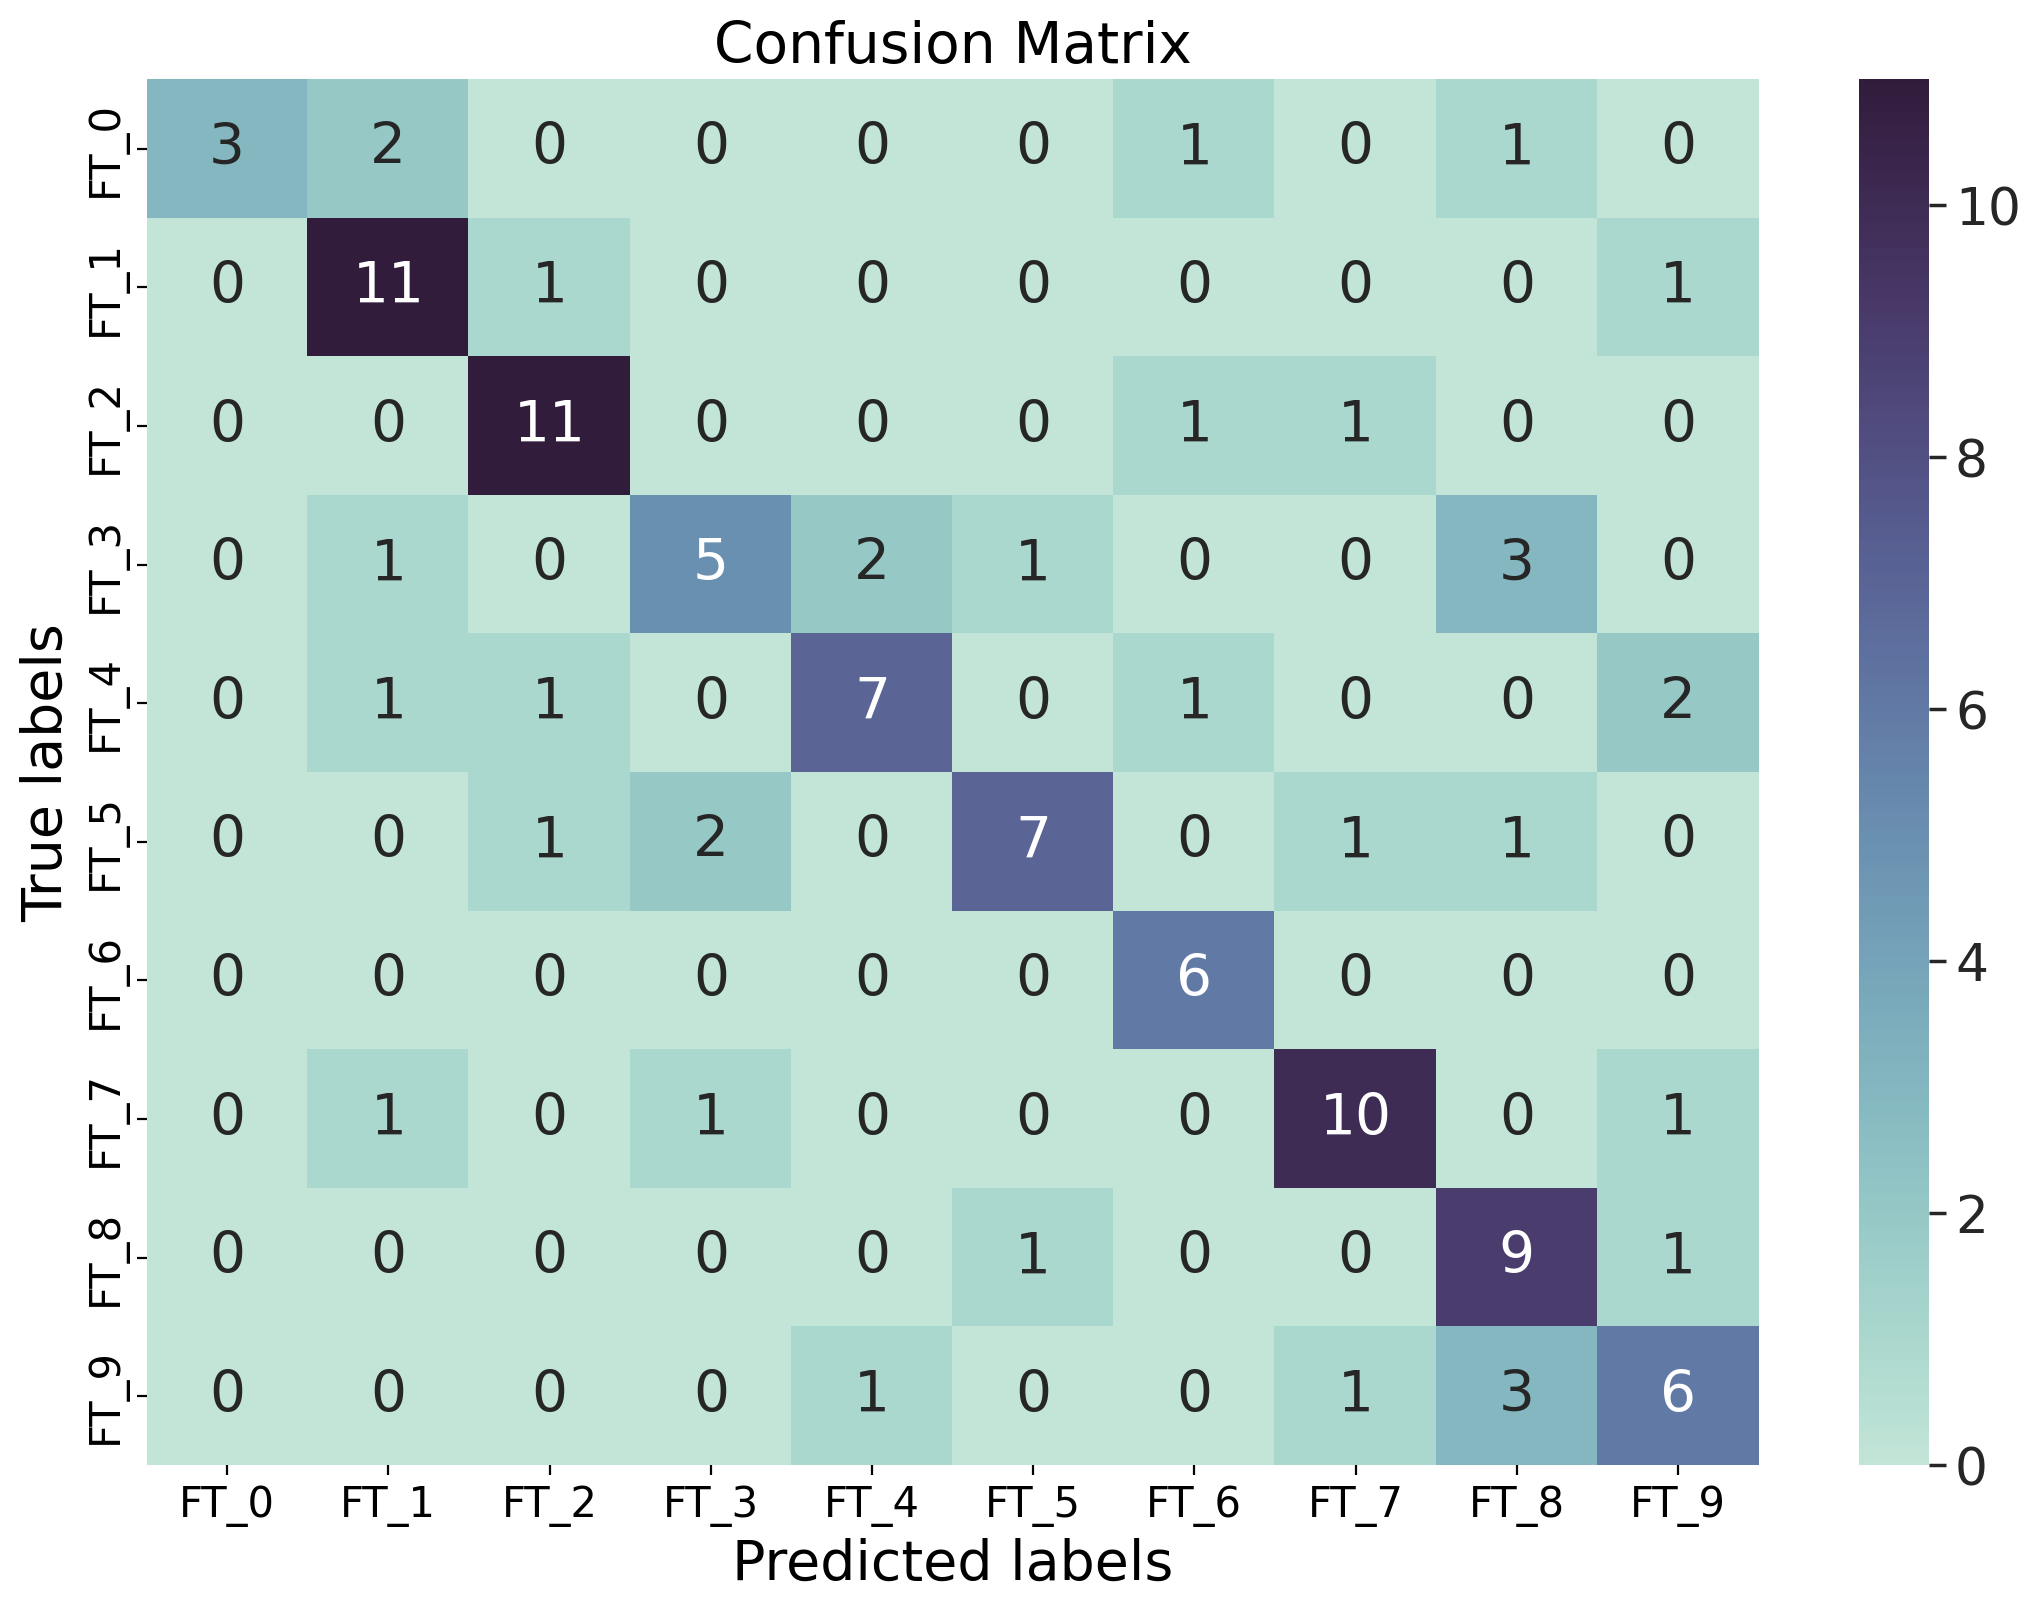

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm

fig = plt.subplots(figsize=(13, 9))

ConfMatrix=cm(np.argmax(y_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.set(font_scale=1.7)

sns.heatmap(ConfMatrix, annot=True, ax = ax,cmap = palette); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.rc('xtick', labelsize=17)  
plt.rc('ytick', labelsize=17)   

xTicklabels = []
yTicklabels = []

for i in range(0,10):
  aux= 'FT_' + str(i)
  xTicklabels.append(aux)
  aux2 = 'FT_' + str(i)
  yTicklabels.append(aux2)
ax.xaxis.set_ticklabels(xTicklabels)
ax.yaxis.set_ticklabels(yTicklabels)

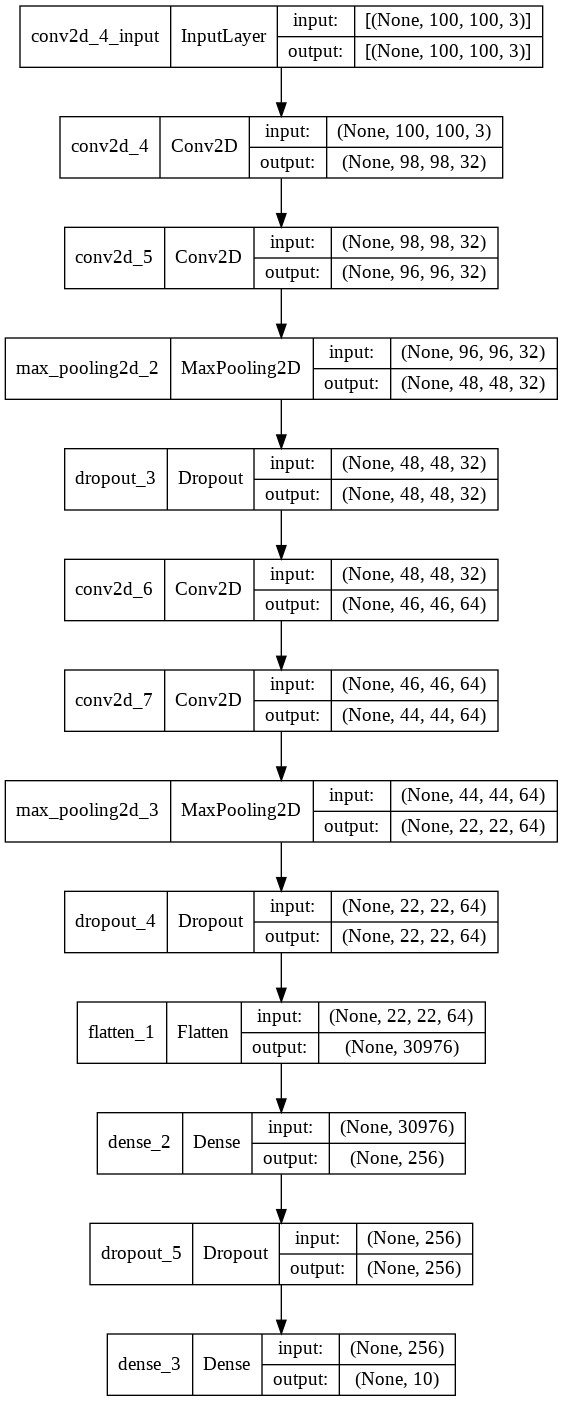

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#Plot  filters

In [ ]:

for layer in model.layers:
	if 'conv' not in layer.name:
		continue
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d_4 (3, 3, 3, 32)
conv2d_5 (3, 3, 32, 32)
conv2d_6 (3, 3, 32, 64)
conv2d_7 (3, 3, 64, 64)


Layer 1 (conv2d): 32 filtros de 3x3 con 3 canales 

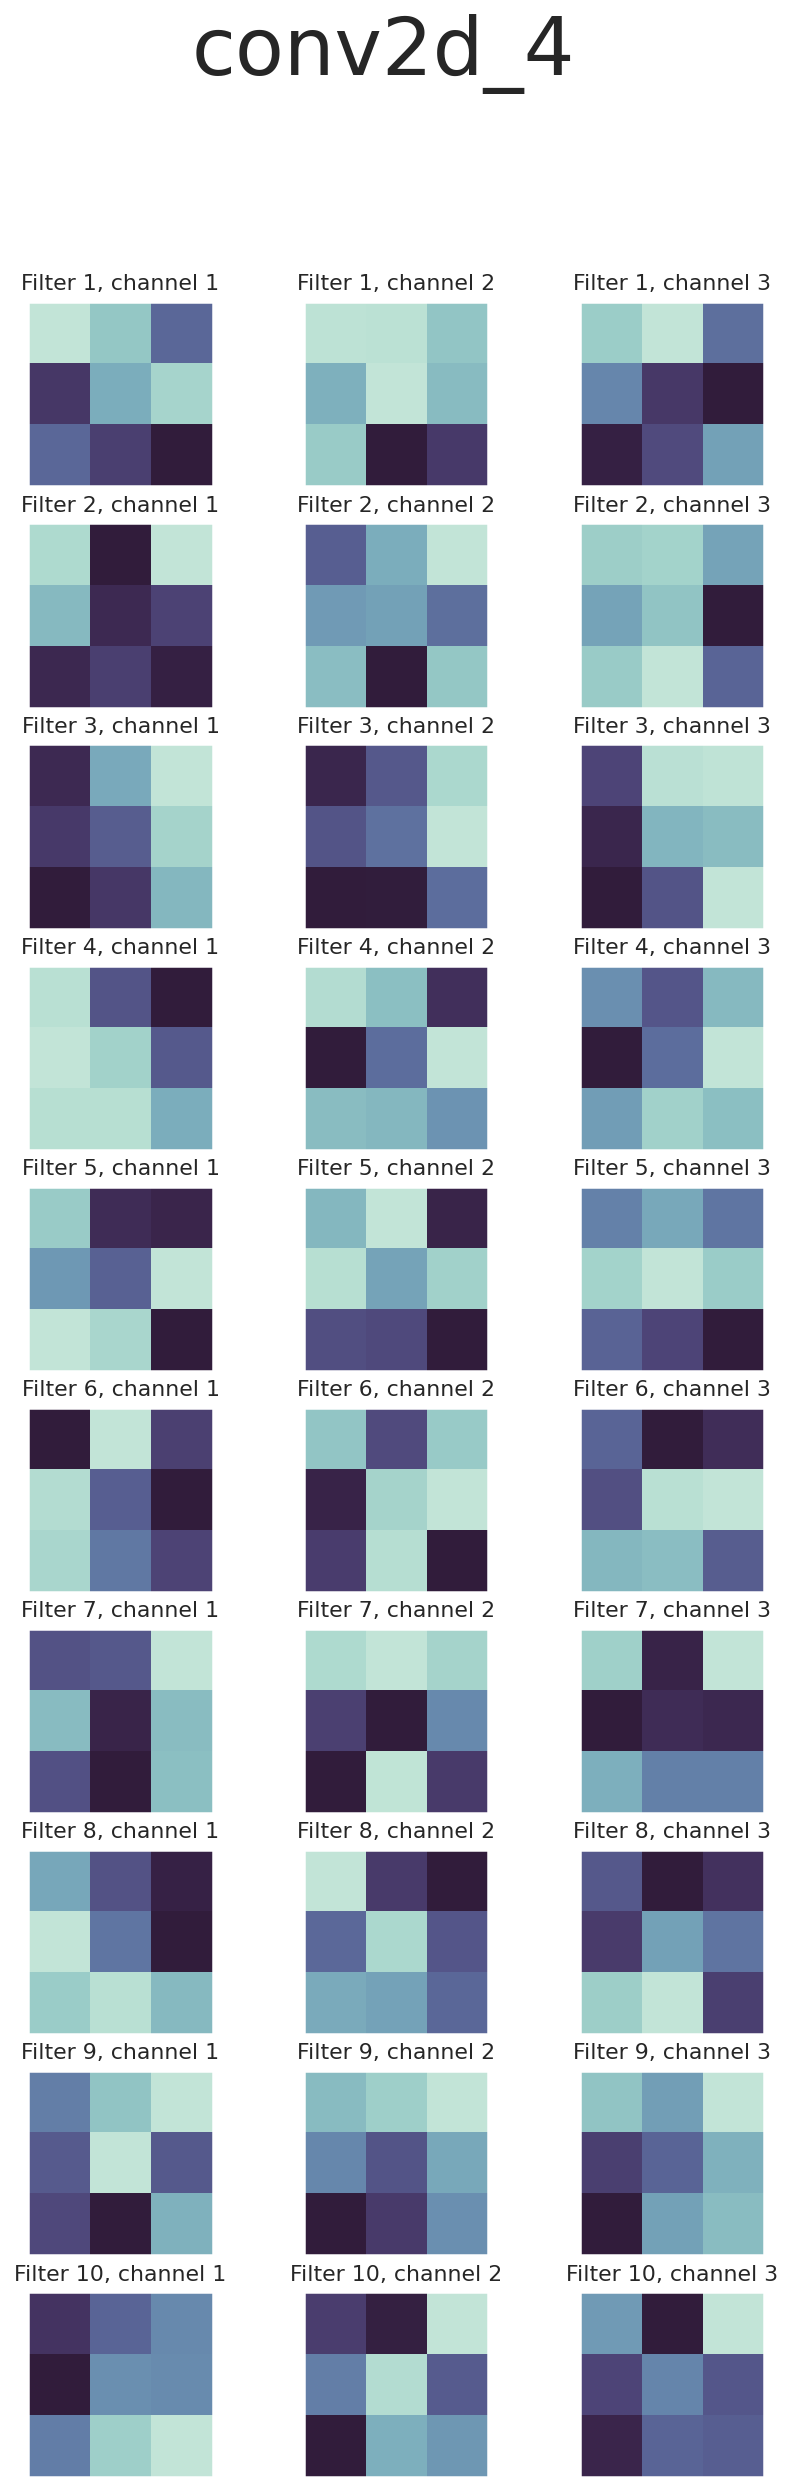

In [ ]:

n_layer = 0
layer, biases = model.layers[n_layer].get_weights()

n_rows = 10  # n_filters
n_cols = 3  # n_chs

fig,ax = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(7,20))
plt.suptitle(model.layers[n_layer].name,fontsize=40)
for i in range(n_rows):
	filter = layer[:, :, :, i]
	for j in range(n_cols):
		ax[i][j].imshow(filter[:, :, j], cmap=palette)
		ax[i][j].set_title( 'Filter '+ str((i+1)) + ', channel ' + str((j+1)), size = 11)
		ax[i][j].set_xticks([])
		ax[i][j].set_yticks([])
plt.show()

Layer 2 (conv2d_1): 32 filtros de 3x3 con 32 canales 

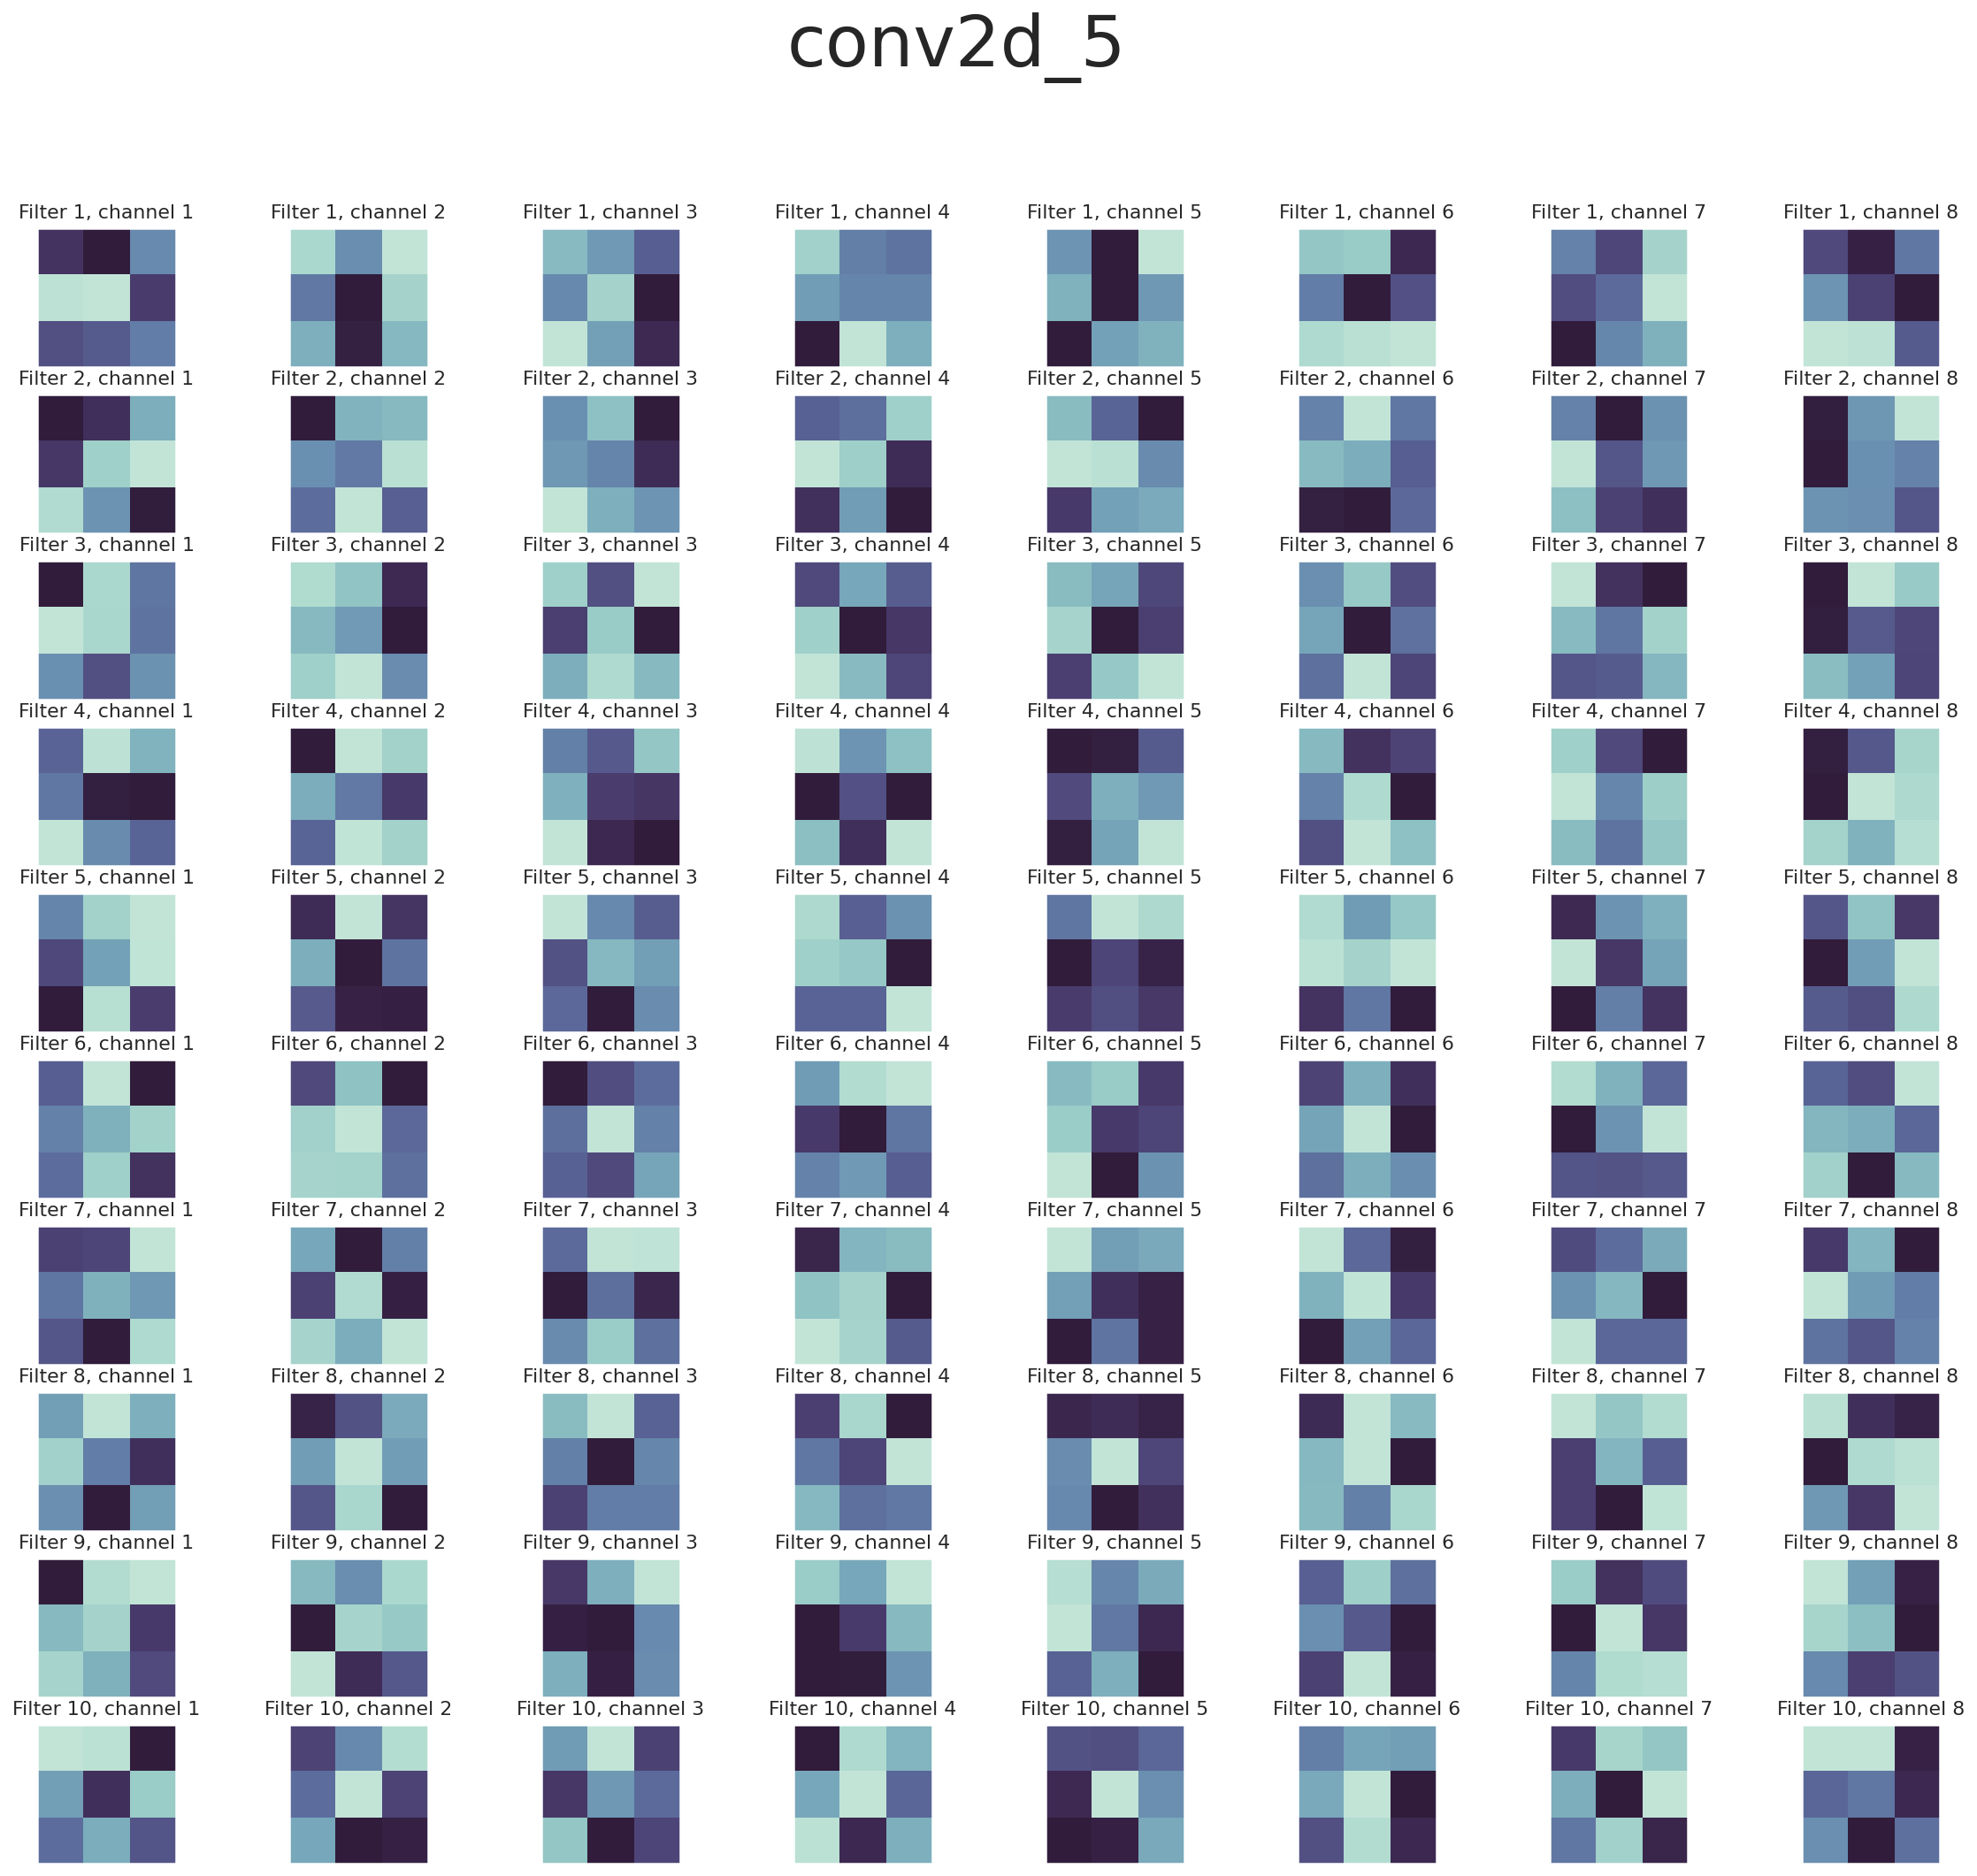

In [ ]:
#First 10 Filters With One Subplot per Channel (CHANNEL FROM 1 TO 8 OUT OF 32)
n_layer = 1
layer, biases = model.layers[n_layer].get_weights()

n_rows = 10  # n_filters
n_cols = 8  # n_chs

fig,ax = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20,17))
plt.suptitle(model.layers[n_layer].name,fontsize=40)
for i in range(n_rows):
	filter = layer[:, :, :, i]
	for j in range(n_cols):
		ax[i][j].imshow(filter[:, :, j], cmap=palette)
		ax[i][j].set_title( 'Filter '+ str((i+1)) + ', channel ' + str((j+1)), size = 11)
		ax[i][j].set_xticks([])
		ax[i][j].set_yticks([])
plt.show()

#Visualizing features mapping

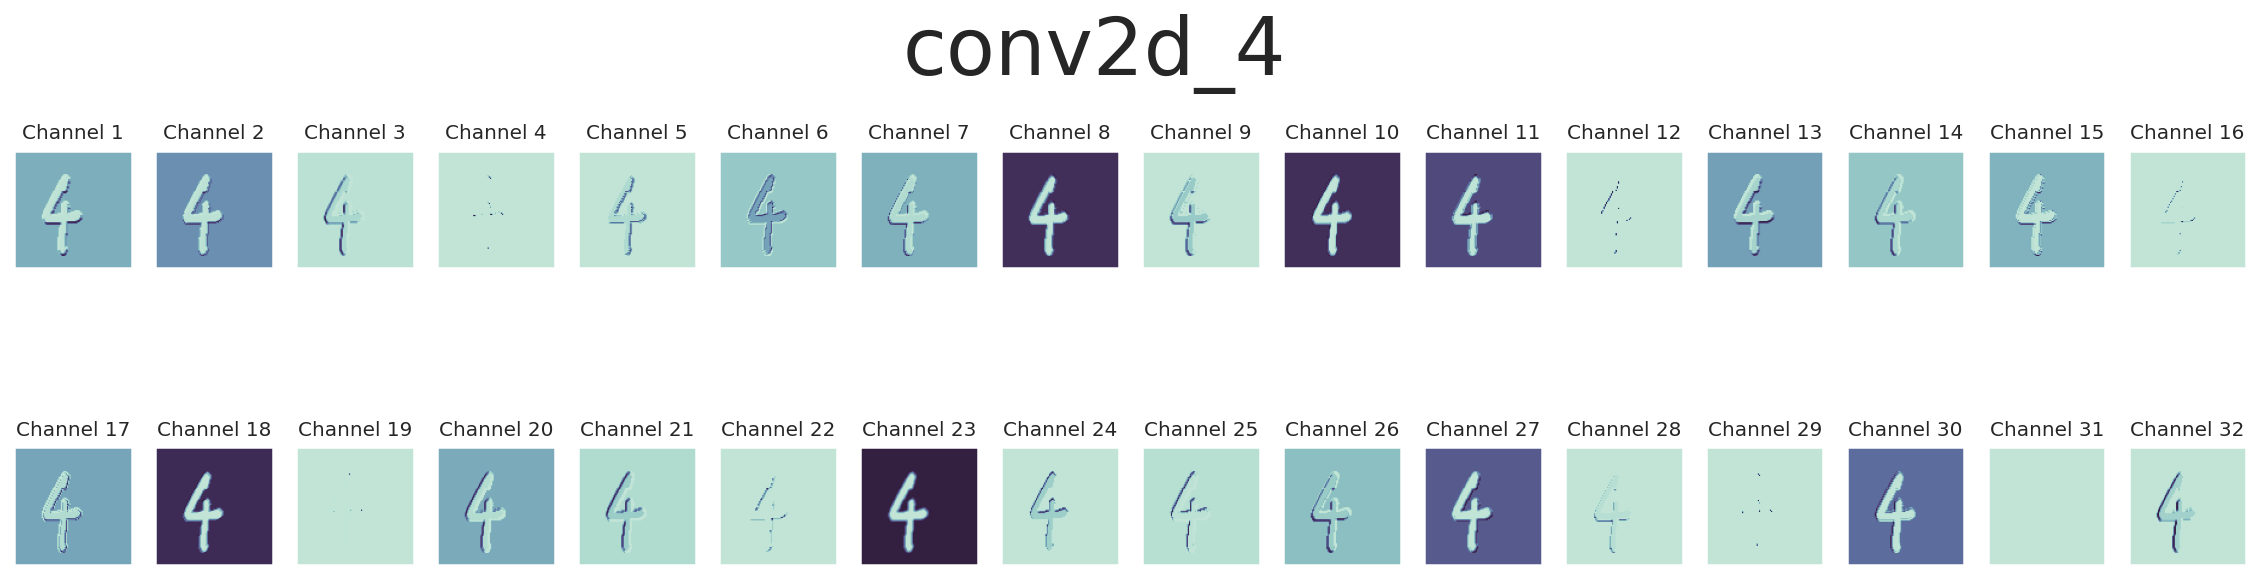

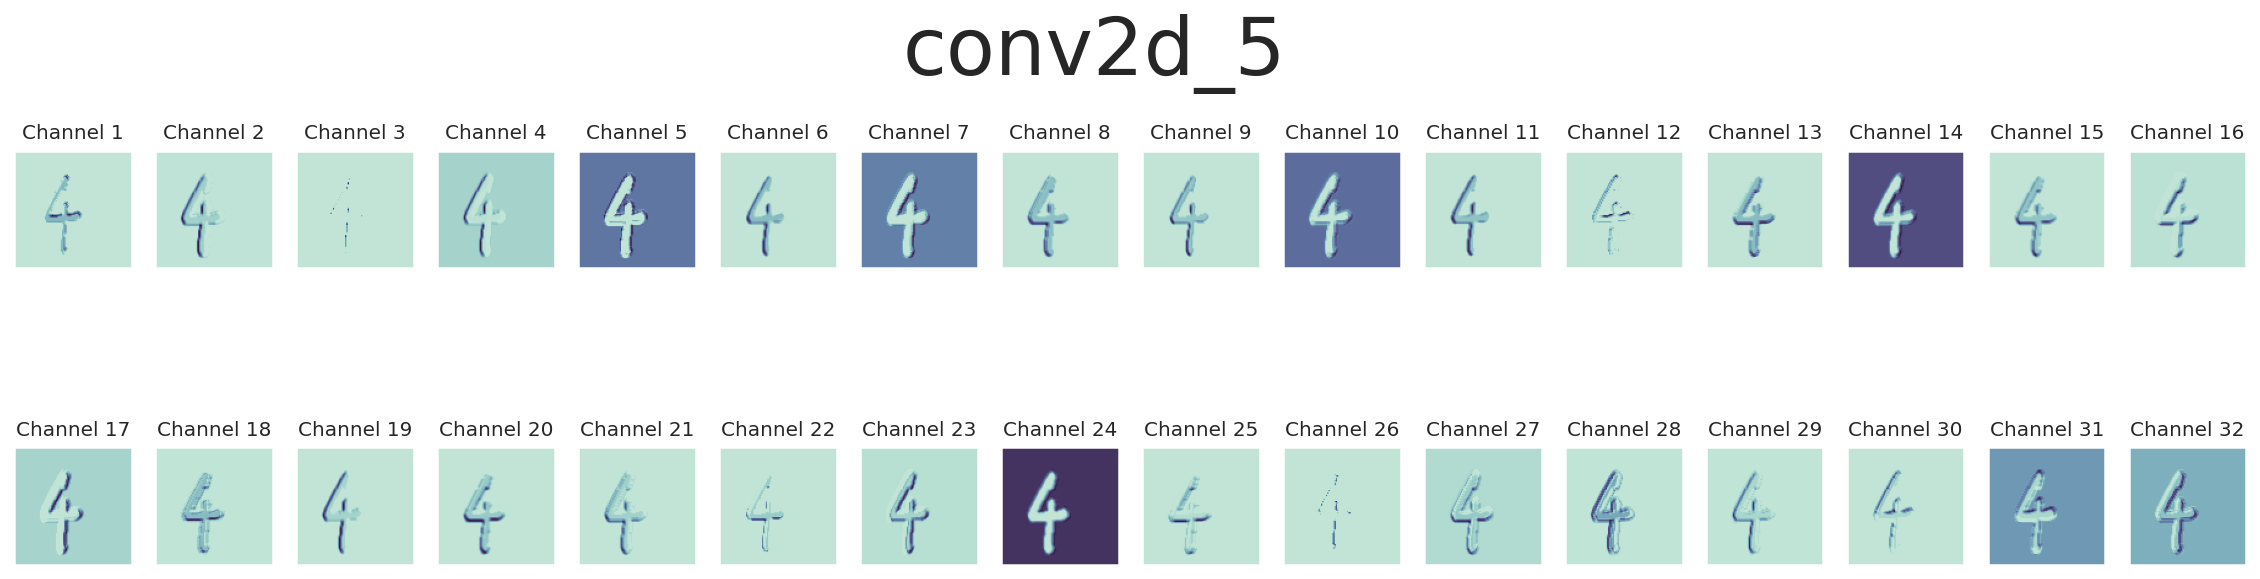

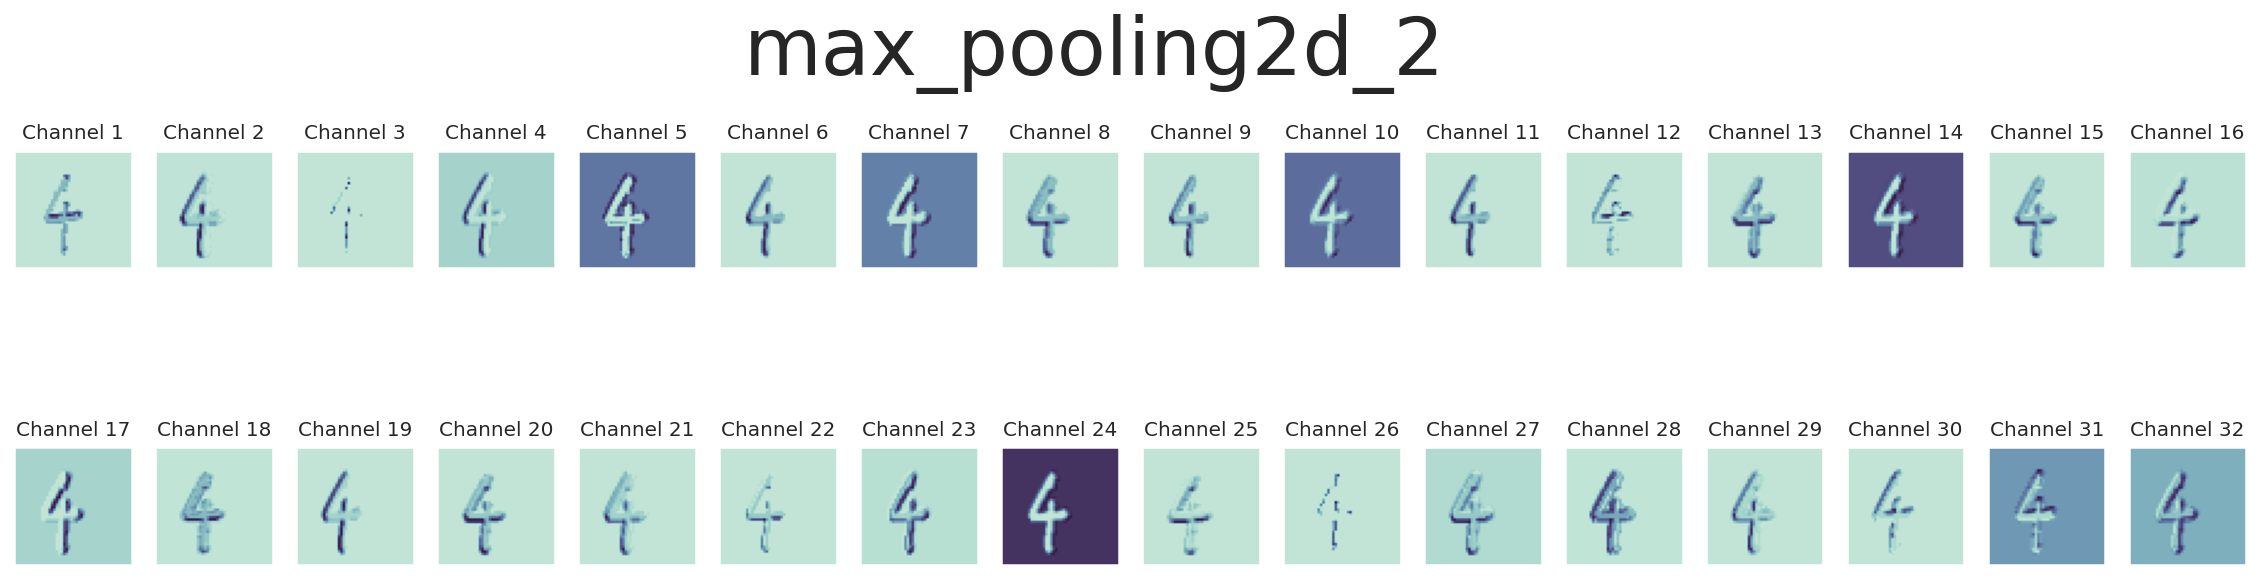

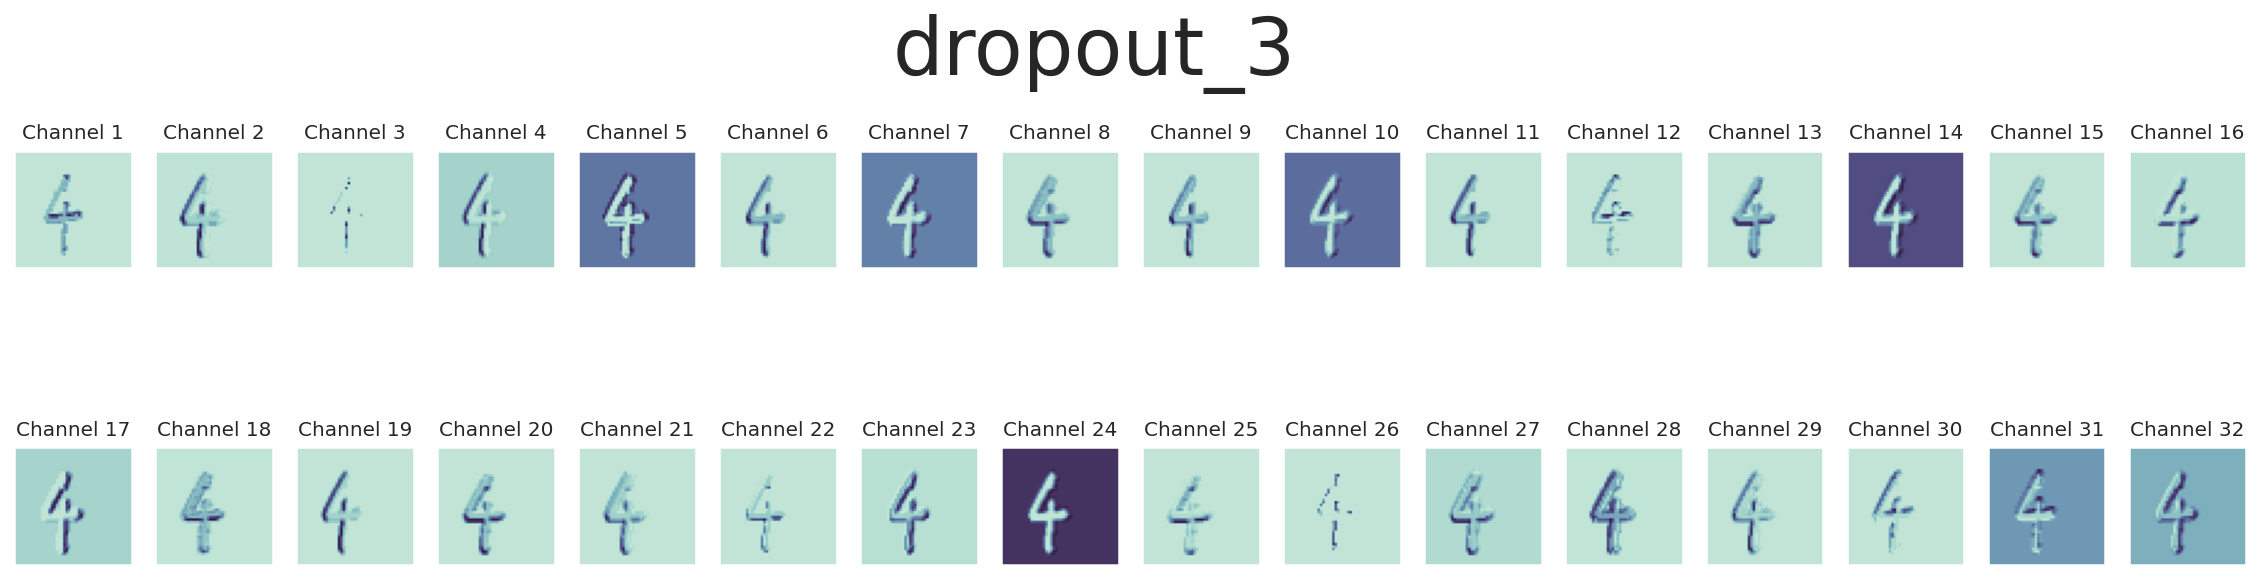

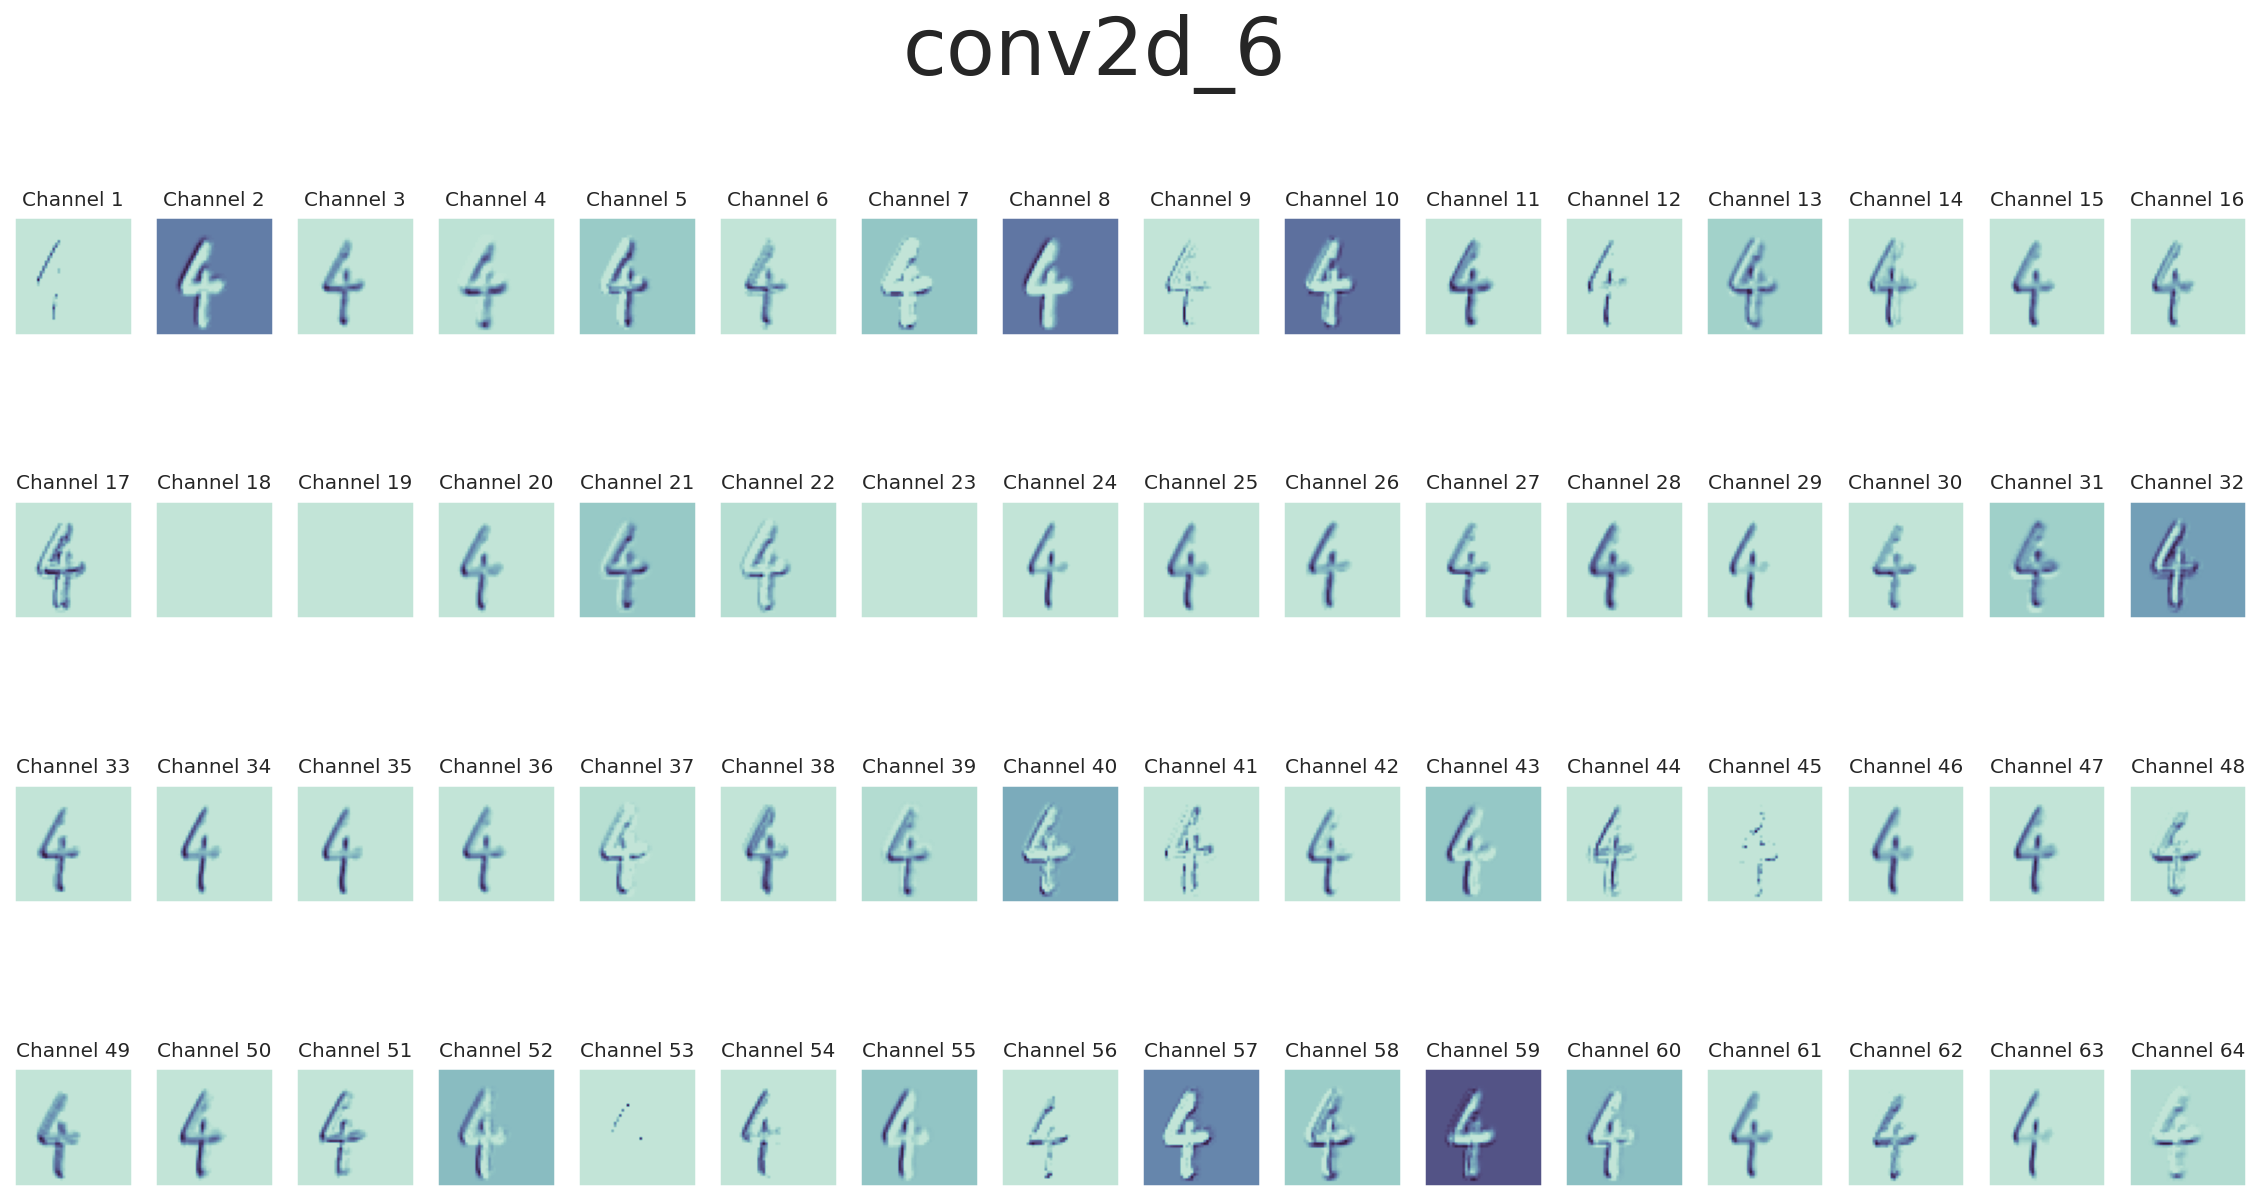

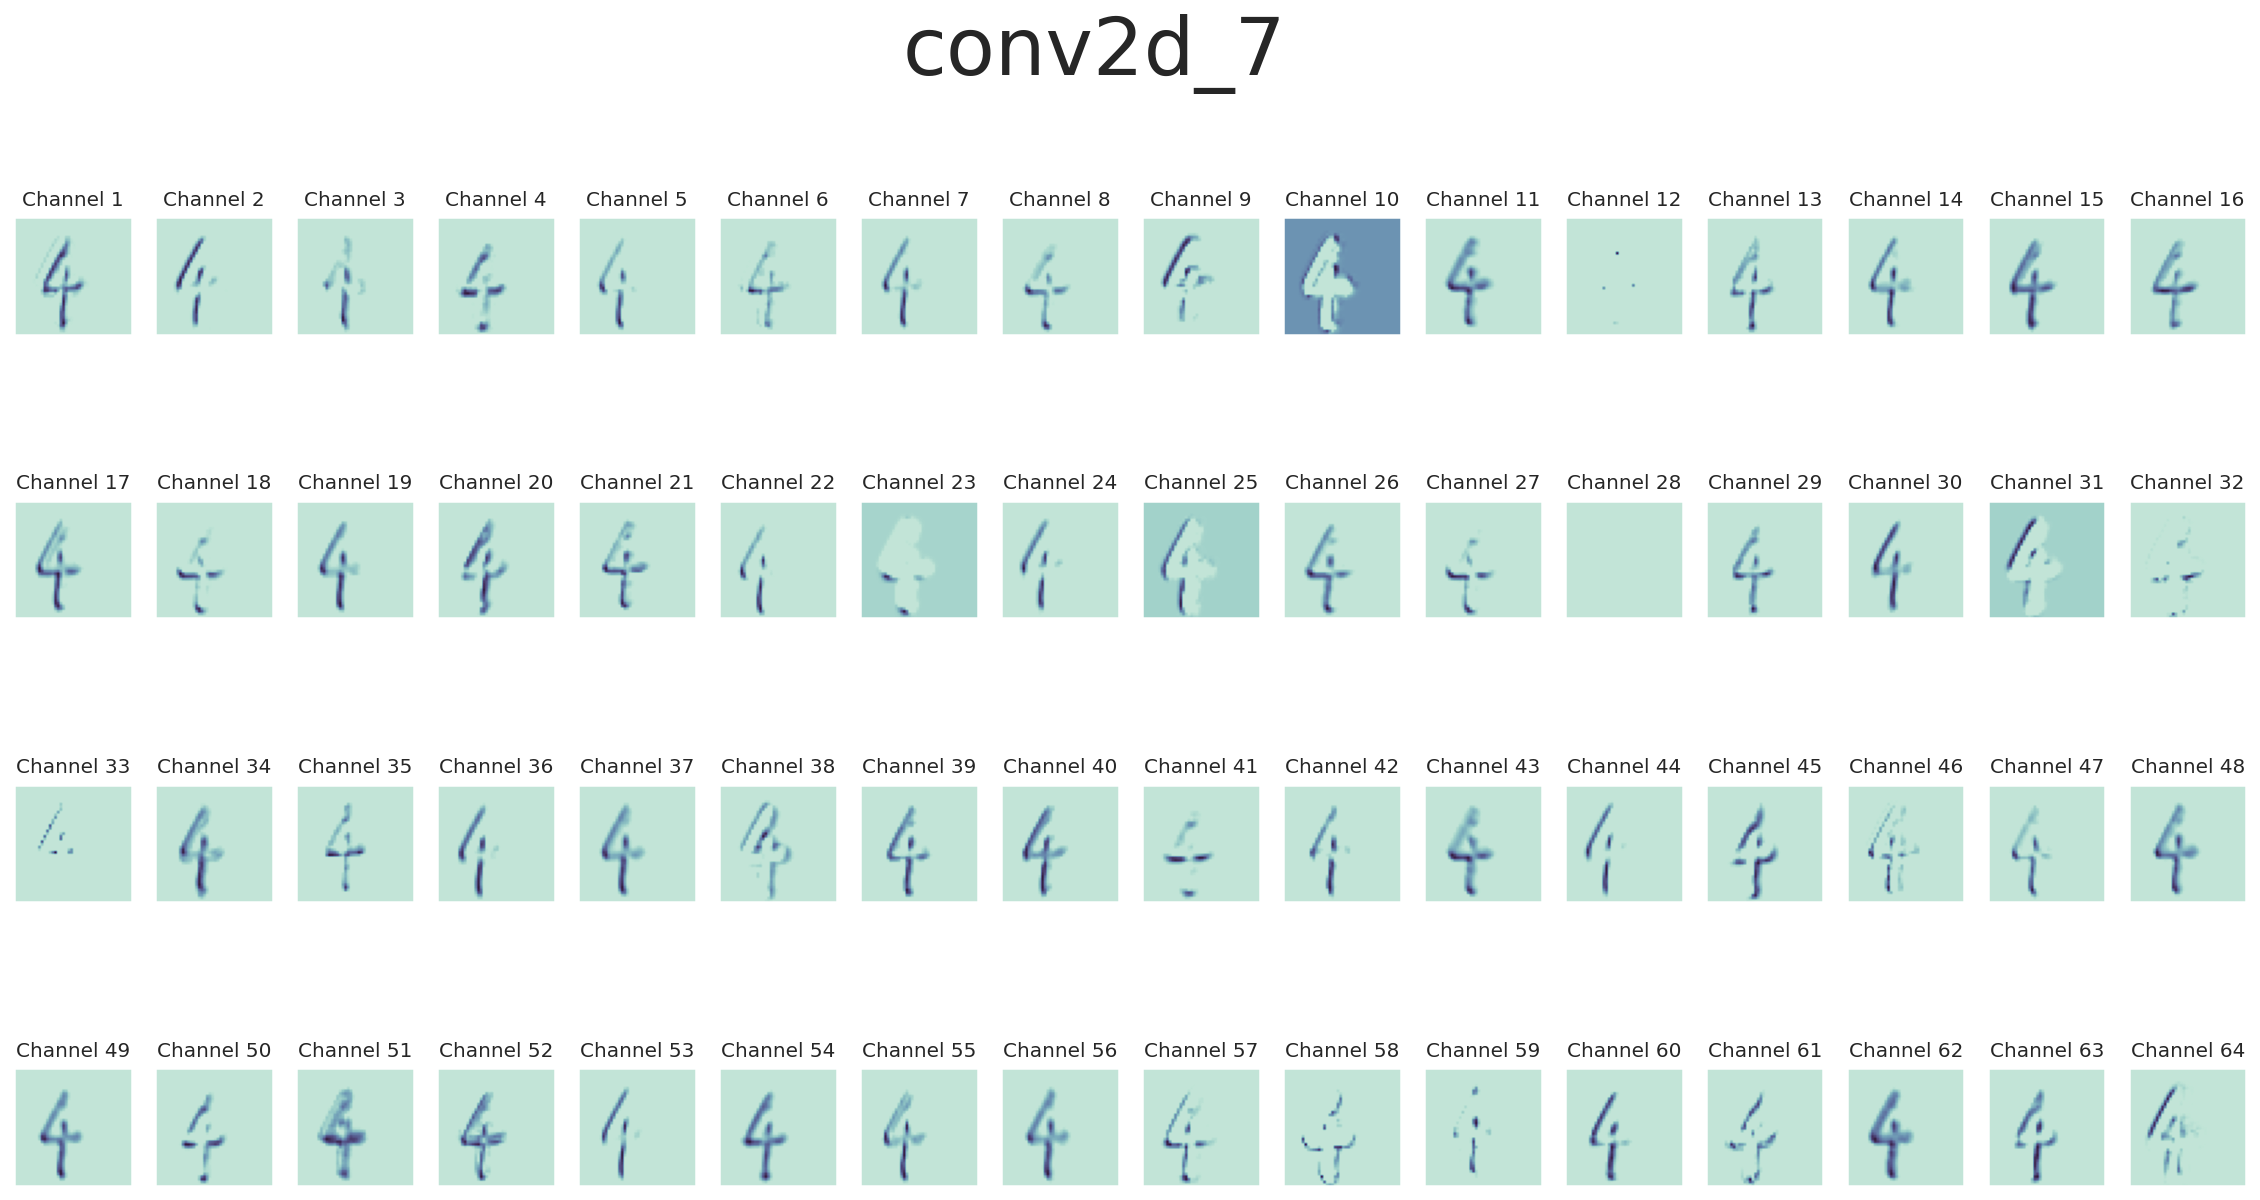

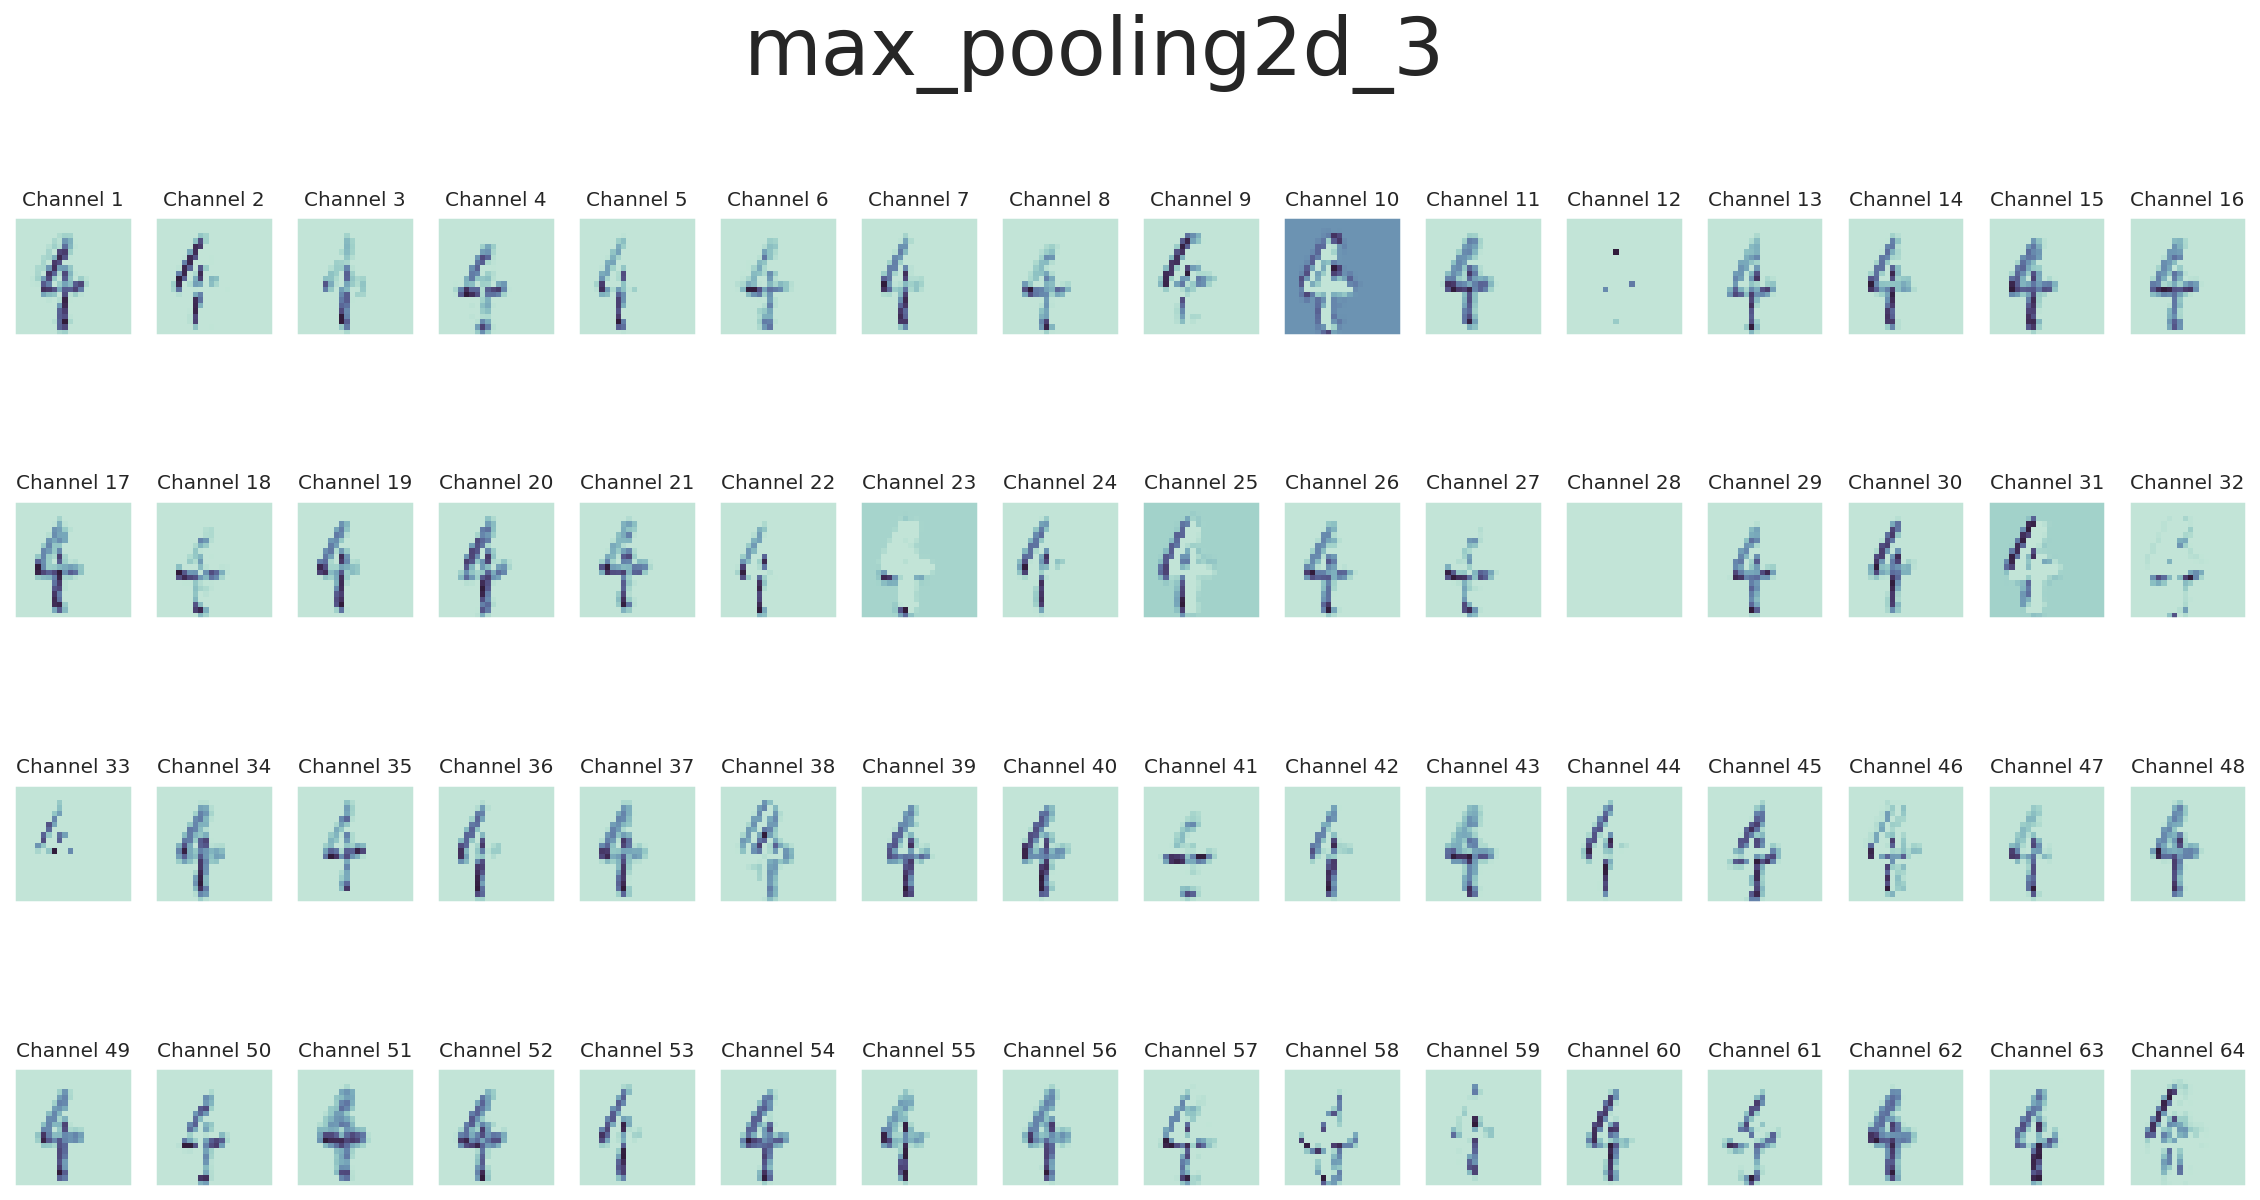

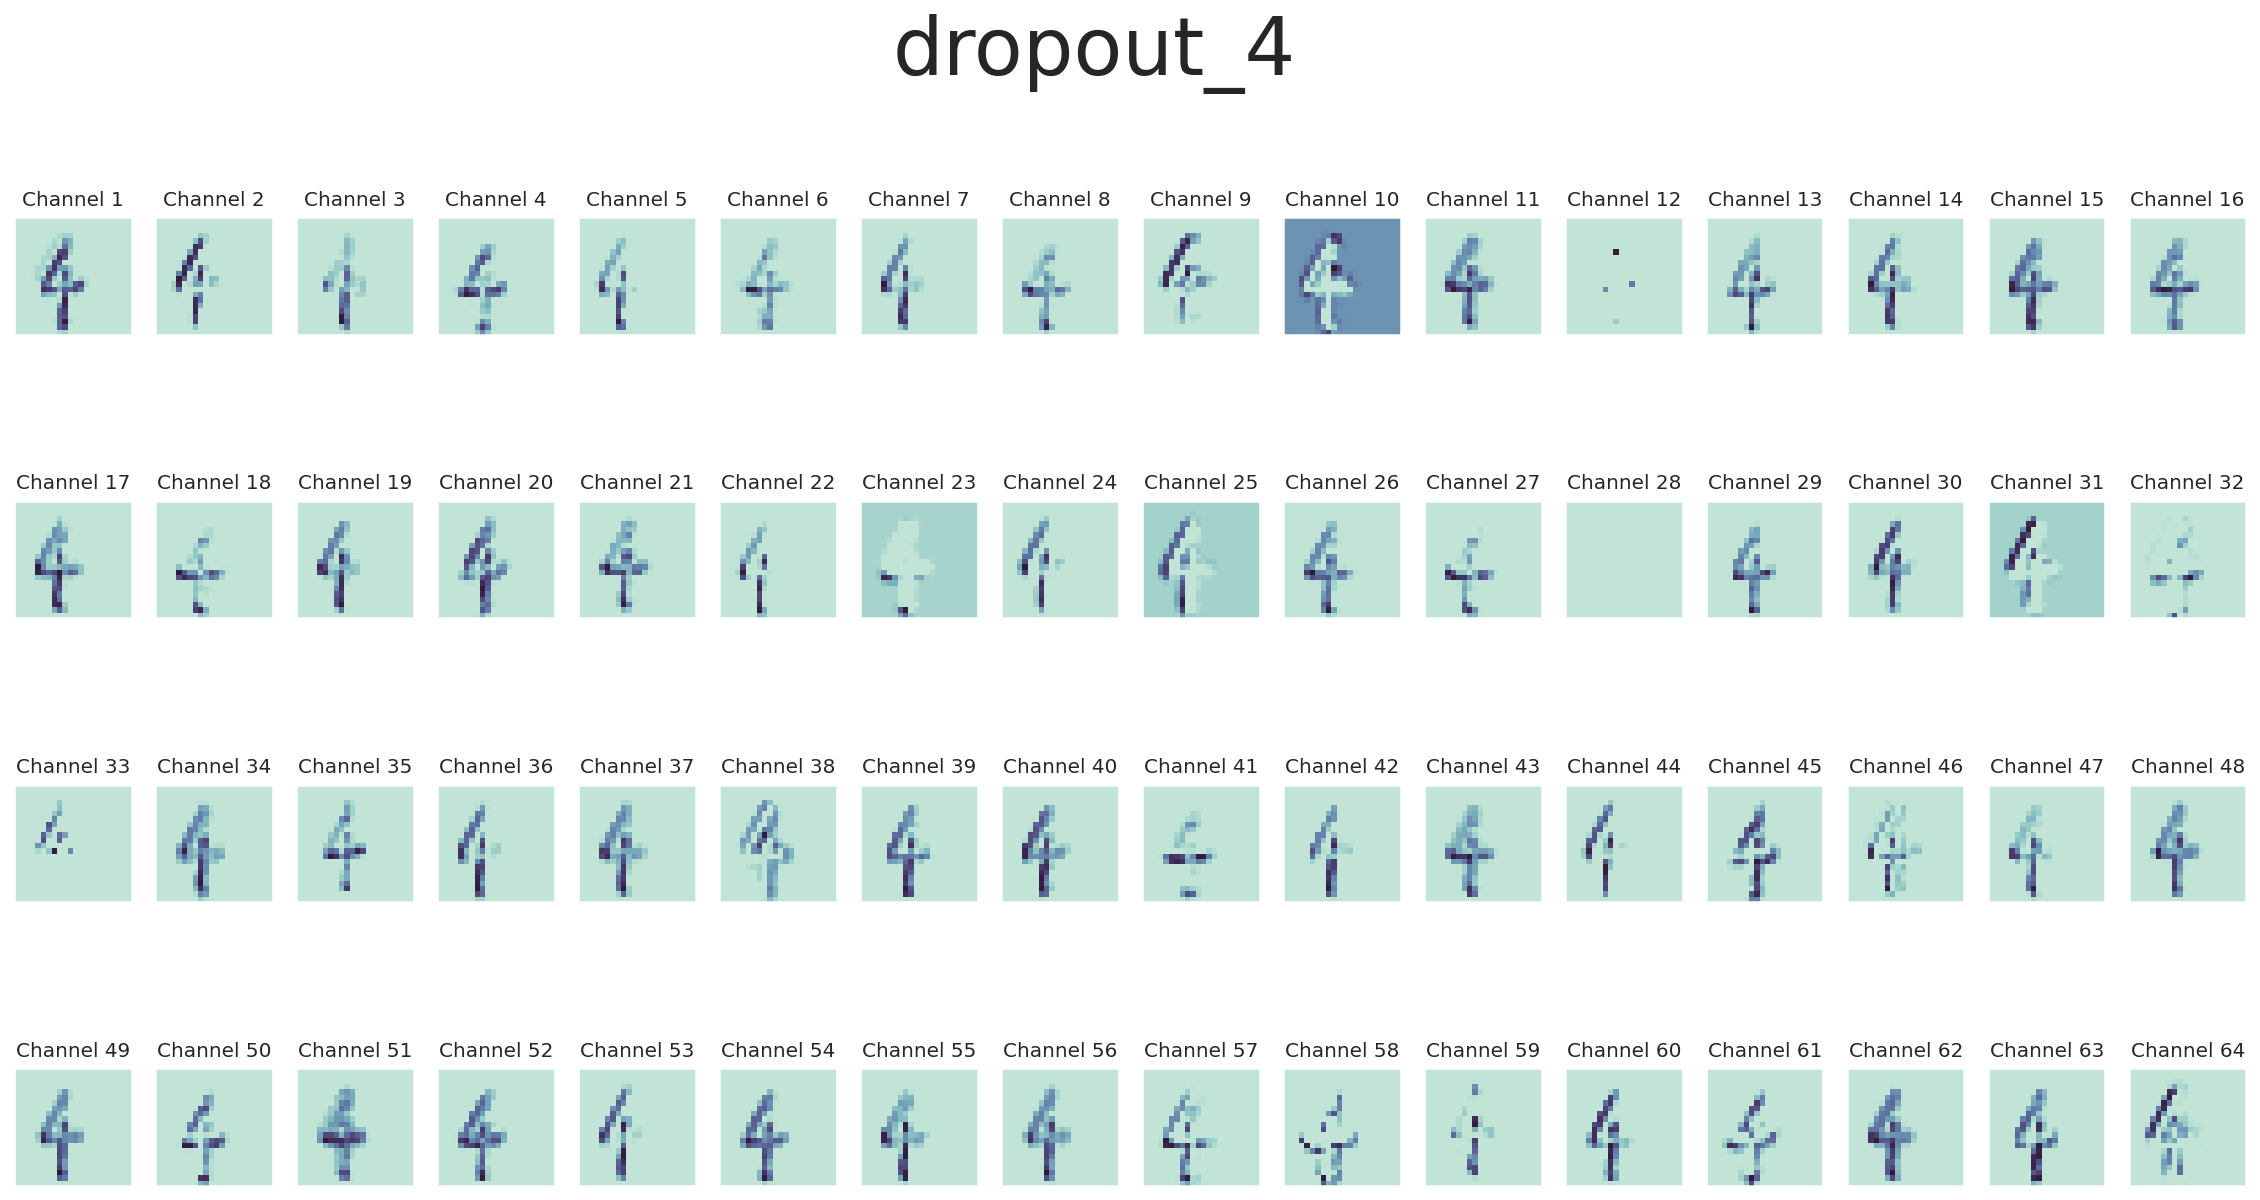

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd372c595f0> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 1440x348480 with 2155 Axes>

In [ ]:
from IPython.display import set_matplotlib_formats
from keras.models import Model

set_matplotlib_formats('retina', quality=100)

n_cols = 16  

image = X_train[66]
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

for n_layer in range(len(model.layers)):
  if model.layers[n_layer].name == 'flatten':
      break;  
  intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(model.layers[n_layer].name).output)
  intermediate_output = intermediate_layer_model.predict(image)
  n_channels = intermediate_output.shape[-1]
  n_rows = n_channels//n_cols
  fig,ax = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20,(2.5*n_rows)))
  plt.suptitle(model.layers[n_layer].name,fontsize=40)
  aux = 0
  for i in range(n_rows):
    for j in range(n_cols):
      ax[i][j].imshow(intermediate_output[0,:,:,aux], cmap = palette)
      ax[i][j].set_title('Channel '+ str((1+aux)), size = 10)
      ax[i][j].set_xticks([])
      ax[i][j].set_yticks([])
      aux = aux + 1 
  plt.show()

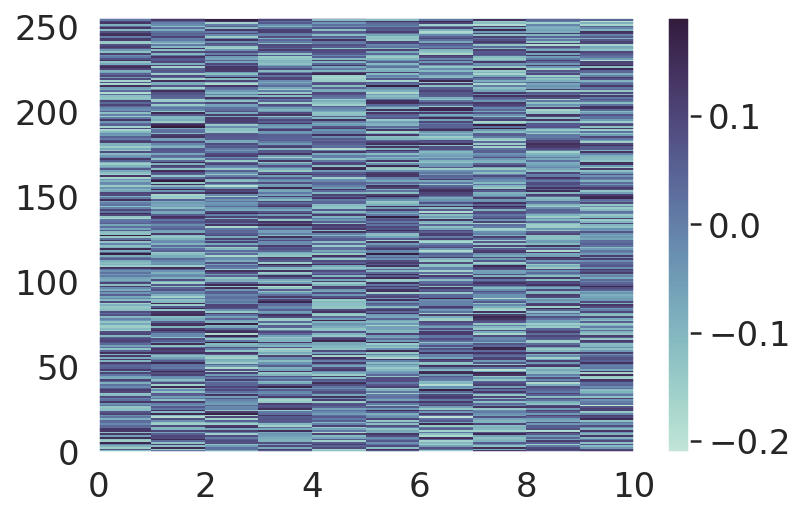

In [ ]:
#weight of the output layer
plt.pcolor(model.layers[11].get_weights()[0],cmap=palette)
plt.colorbar()

#Use case two: DA

In [ ]:
from keras.models import Sequential

from keras.layers import MaxPooling2D, Dropout, Dense, Flatten

from keras.layers import Convolution2D as Conv2D

model_DA = Sequential()
model_DA.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100,3)))
model_DA.add(Conv2D(32, (3, 3), activation='relu'))
model_DA.add(MaxPooling2D(pool_size=(2, 2)))
model_DA.add(Dropout(0.25))

model_DA.add(Conv2D(64, (3, 3), activation='relu'))
model_DA.add(Conv2D(64, (3, 3), activation='relu'))
model_DA.add(MaxPooling2D(pool_size=(2, 2)))
model_DA.add(Dropout(0.25))

model_DA.add(Flatten())
model_DA.add(Dense(256, activation='relu'))
model_DA.add(Dropout(0.5))
model_DA.add(Dense(10, activation='softmax')) 

In [ ]:
from tensorflow.keras.optimizers import SGD

model_DA.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_DA.summary()

Model: "sequential_441"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 44, 64)        36928     
                                                    

In [ ]:
history=model_DA.fit(X_train_DA, y_train_DA,
         epochs=100,
         batch_size=128,
         validation_data=(X_val_DA, y_val_DA),
         verbose=1)

Epoch 1/100
6/6 [==============================] - 34s 5s/step - loss: 2.3380 - accuracy: 0.0966 - val_loss: 2.3063 - val_accuracy: 0.0966
Epoch 2/100
6/6 [==============================] - 32s 5s/step - loss: 2.3010 - accuracy: 0.1122 - val_loss: 2.3081 - val_accuracy: 0.0795
Epoch 3/100
6/6 [==============================] - 31s 5s/step - loss: 2.2948 - accuracy: 0.1435 - val_loss: 2.3151 - val_accuracy: 0.1023
Epoch 4/100
6/6 [==============================] - 31s 5s/step - loss: 2.2946 - accuracy: 0.1136 - val_loss: 2.3150 - val_accuracy: 0.0795
Epoch 5/100
6/6 [==============================] - 31s 5s/step - loss: 2.2968 - accuracy: 0.1037 - val_loss: 2.3074 - val_accuracy: 0.1023
Epoch 6/100
6/6 [==============================] - 31s 5s/step - loss: 2.2889 - accuracy: 0.1179 - val_loss: 2.3115 - val_accuracy: 0.0909
Epoch 7/100
6/6 [==============================] - 31s 5s/step - loss: 2.2884 - accuracy: 0.1264 - val_loss: 2.3097 - val_accuracy: 0.0966
Epoch 8/100
6/6 [==========

In [ ]:
# Check accuracy on train set
loss_train, accuracy_train = model_DA.evaluate(X_train_DA, y_train_DA, batch_size=128)
print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set

loss, accuracy = model_DA.evaluate(X_test_DA, y_test_DA, batch_size=128)
print('\nTest Accuracy=', accuracy)

6/6 [==============================] - 7s 1s/step - loss: 2.2204e-04 - accuracy: 1.0000

Training Accuracy= 1.0
1/1 [==============================] - 1s 1s/step - loss: 2.7126 - accuracy: 0.6636

Test Accuracy= 0.6636363863945007


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Train Accuracy:  0.99
Test Accuracy:  0.48


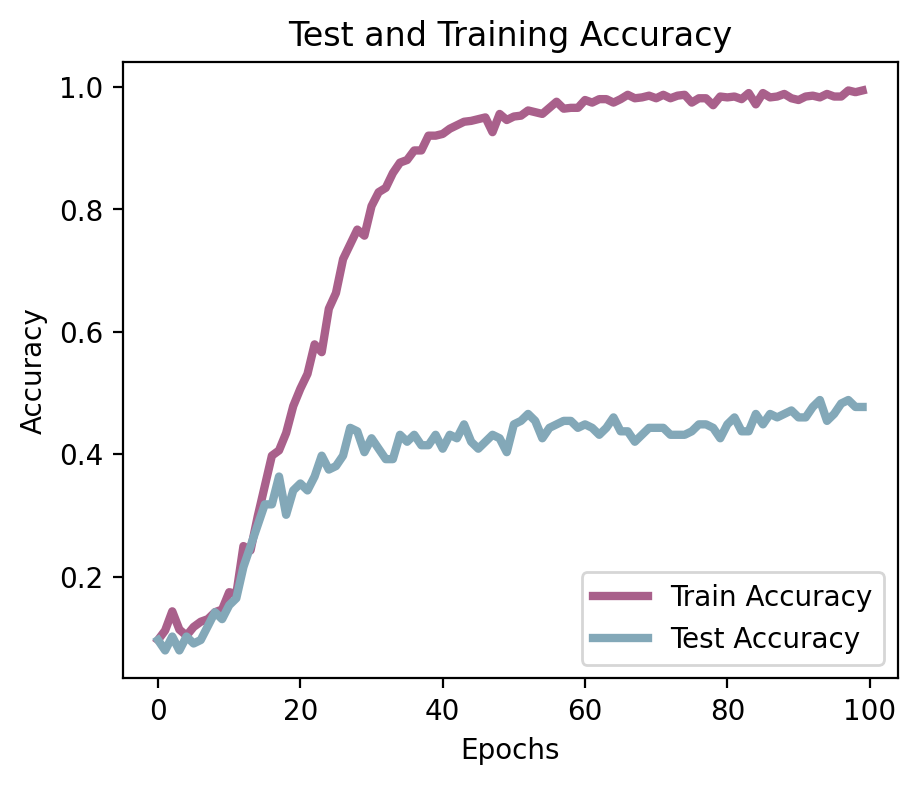

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina', quality=100)

print('Train Accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['accuracy'])),history.history['accuracy'],color = purple, linewidth = 3, label='Train Accuracy')
plt.plot(range(0, len(history.history['val_accuracy'])),history.history['val_accuracy'],color = blue, linewidth = 3, label='Test Accuracy')
plt.legend(loc='lower right')

plt.title('Test and Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()

Train Loss:  0.02
Test Loss:  5.25


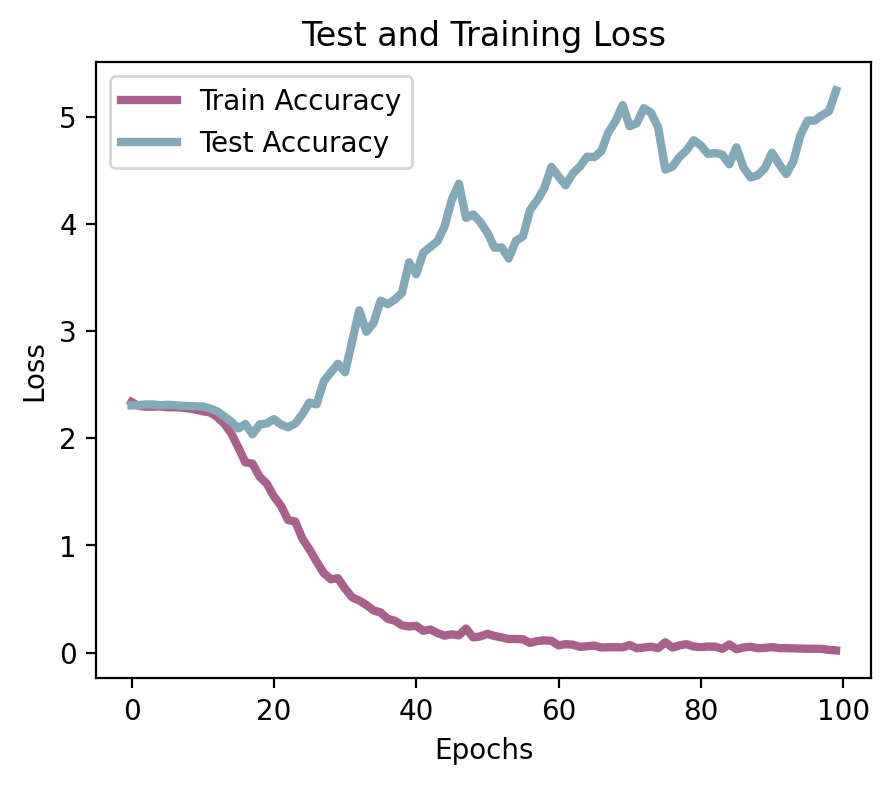

In [ ]:
set_matplotlib_formats('retina', quality=100)

print('Train Loss: ',np.round(history.history['loss'][-1],2))
print('Test Loss: ',np.round(history.history['val_loss'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['loss'])),history.history['loss'],color = purple, linewidth = 3, label='Train Accuracy')
plt.plot(range(0, len(history.history['val_loss'])),history.history['val_loss'],color = blue, linewidth = 3, label='Test Accuracy')
plt.legend(loc='upper left')

plt.title('Test and Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)  
plt.rc('axes', labelsize=MEDIUM_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()

In [ ]:
pred_probabilities= model_DA.predict(X_test_DA)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',y_test_DA[0:5])

First Five Probs.:
 [[1.5891744e-02 4.8726858e-03 1.2270462e-04 6.4776879e-07 7.3046031e-05
  8.1871526e-04 8.4858215e-01 2.1026715e-06 1.2815683e-01 1.4794256e-03]
 [9.5397266e-12 4.6252356e-11 3.9224105e-06 6.0099218e-04 3.2519252e-12
  6.1975072e-07 9.7096926e-09 1.2581866e-07 9.9939430e-01 8.5353511e-09]
 [3.5786926e-04 9.5219817e-03 8.3109457e-04 2.9232988e-02 2.2657443e-02
  6.8708793e-03 3.0592924e-01 1.3298712e-03 2.2022207e-01 4.0304664e-01]
 [8.4206376e-19 5.0720100e-15 1.9393584e-15 1.9282007e-08 4.2371282e-15
  9.9999988e-01 2.3323617e-12 1.1096862e-13 3.5749537e-08 6.1239298e-08]
 [2.5081603e-08 1.6534608e-07 3.9081321e-08 2.7567343e-05 3.2288388e-06
  2.1148583e-06 6.3557265e-10 2.7632466e-01 5.0405793e-02 6.7323643e-01]]


First Five Classes:
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Confusion Matrix:
 [[ 6  0  0  0  0  1  0  0  0  0]
 [ 1  8  0  0  0  0  0  0  0  4]
 [ 1  0  7  1  0  1  0  1  2  0]
 [ 0  0  0  4  2  1  0  0  4  1]
 [ 0  0  0  0  7  0  3  0  0  2]
 [ 0  0  1  1  0  9  0  1  0  0]
 [ 0  0  0  0  0  0  6  0  0  0]
 [ 0  1  0  0  0  0  0 10  0  2]
 [ 0  0  0  0  0  0  0  0  9  2]
 [ 0  1  1  0  1  0  0  0  1  7]]


[Text(0, 0.5, 'FT_0'),
 Text(0, 1.5, 'FT_1'),
 Text(0, 2.5, 'FT_2'),
 Text(0, 3.5, 'FT_3'),
 Text(0, 4.5, 'FT_4'),
 Text(0, 5.5, 'FT_5'),
 Text(0, 6.5, 'FT_6'),
 Text(0, 7.5, 'FT_7'),
 Text(0, 8.5, 'FT_8'),
 Text(0, 9.5, 'FT_9')]

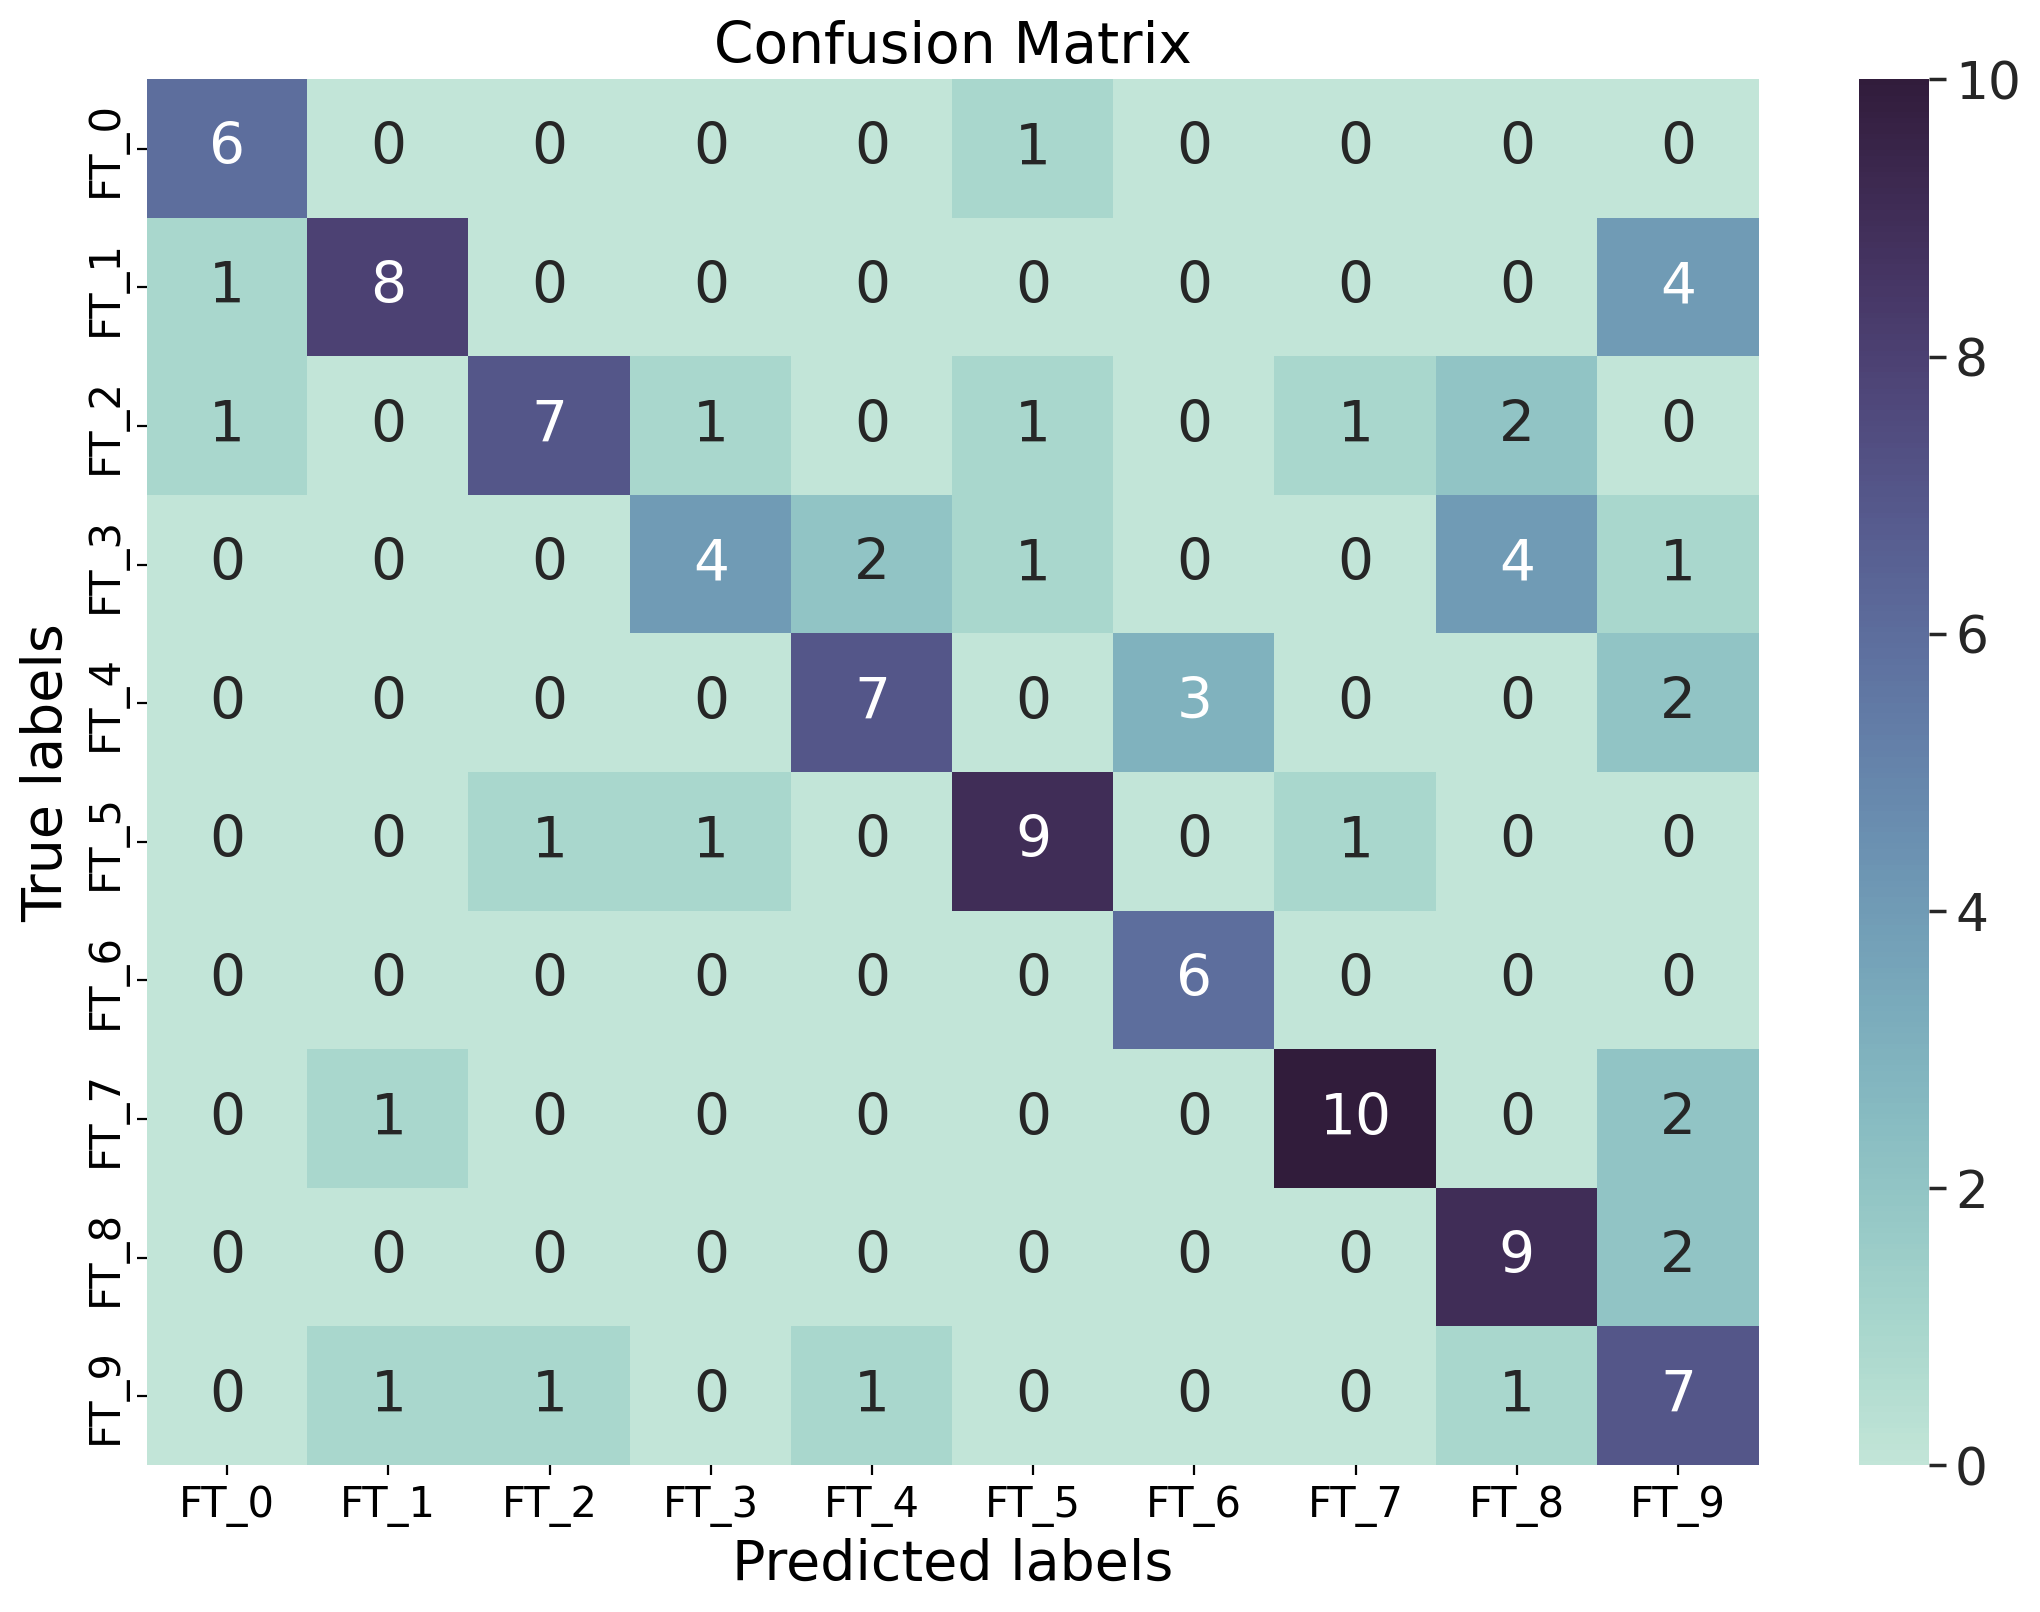

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm

fig = plt.subplots(figsize=(13, 9))

ConfMatrix=cm(np.argmax(y_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.set(font_scale=1.7)

sns.heatmap(ConfMatrix, annot=True, ax = ax,cmap = palette)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.rc('xtick', labelsize=17)  
plt.rc('ytick', labelsize=17)   

xTicklabels = []
yTicklabels = []

for i in range(0,10):
  aux= 'FT_' + str(i)
  xTicklabels.append(aux)
  aux2 = 'FT_' + str(i)
  yTicklabels.append(aux2)
ax.xaxis.set_ticklabels(xTicklabels)
ax.yaxis.set_ticklabels(yTicklabels)

# Explore ERRORS

In [ ]:
match = np.array(np.argmax(y_test_DA,1) == np.argmax(pred_probabilities,1))

In [ ]:
errors = np.where(match == False)[0]
print("Errors in test data",errors)

Errors in test data [  2   4  12  17  18  19  20  22  29  31  33  35  38  39  44  45  46  51
  54  55  56  57  63  66  67  68  69  73  76  81  83  87  94  97 102 103
 108]


In [ ]:
for i in range(10):
  print(str(i)+ '. ' + str(y_test_DA[errors[i]]))

0. [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1. [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
2. [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3. [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
4. [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
5. [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
6. [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
7. [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
8. [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
9. [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
np.where(pred_probabilities[errors[6]] == max(pred_probabilities[errors[6]])) #9 is confused with 1

(array([1]),)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina', quality=100)

print('Train Accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['accuracy'])),history.history['accuracy'],color = purple, linewidth = 3, label='Train Accuracy')
plt.plot(range(0, len(history.history['val_accuracy'])),history.history['val_accuracy'],color = blue, linewidth = 3, label='Test Accuracy')
plt.legend(loc='lower right')

plt.title('Test and Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()

In [ ]:
pred_probabilities= model_DA.predict(X_test_DA)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',y_test_DA[0:5])

#Repeat both cases with all dropouts to .5

##Not DA

In [ ]:
from keras.models import Sequential

from keras.layers import MaxPooling2D, Dropout, Dense, Flatten

from keras.layers import Convolution2D as Conv2D

model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100,3)))
model_1.add(Conv2D(32, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.5))

model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.5))

model_1.add(Flatten())
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax')) 

In [ ]:
from tensorflow.keras.optimizers import SGD

model_1.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_1.summary()

Model: "sequential_442"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 44, 44, 64)        36928     
                                                    

In [ ]:
history=model_1.fit(X_train, y_train,
         epochs=100,
         batch_size=128,
         validation_data=(X_val, y_val),
         verbose=1)

Epoch 1/100
3/3 [==============================] - 17s 5s/step - loss: 2.4830 - accuracy: 0.0795 - val_loss: 2.3002 - val_accuracy: 0.1023
Epoch 2/100
3/3 [==============================] - 15s 5s/step - loss: 2.3201 - accuracy: 0.0909 - val_loss: 2.3036 - val_accuracy: 0.1136
Epoch 3/100
3/3 [==============================] - 16s 5s/step - loss: 2.2979 - accuracy: 0.1080 - val_loss: 2.3051 - val_accuracy: 0.0795
Epoch 4/100
3/3 [==============================] - 16s 5s/step - loss: 2.3022 - accuracy: 0.1136 - val_loss: 2.3052 - val_accuracy: 0.0909
Epoch 5/100
3/3 [==============================] - 16s 5s/step - loss: 2.3004 - accuracy: 0.0909 - val_loss: 2.3045 - val_accuracy: 0.1023
Epoch 6/100
3/3 [==============================] - 16s 5s/step - loss: 2.2953 - accuracy: 0.1193 - val_loss: 2.3040 - val_accuracy: 0.1023
Epoch 7/100
3/3 [==============================] - 16s 5s/step - loss: 2.3027 - accuracy: 0.0938 - val_loss: 2.3039 - val_accuracy: 0.1023
Epoch 8/100
3/3 [==========

In [ ]:
# Check accuracy on train set
loss_train, accuracy_train = model_1.evaluate(X_train, y_train, batch_size=128)
print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set

loss, accuracy = model_1.evaluate(X_test, y_test, batch_size=128)
print('\nTest Accuracy=', accuracy)

3/3 [==============================] - 3s 1s/step - loss: 0.0015 - accuracy: 1.0000

Training Accuracy= 1.0
1/1 [==============================] - 1s 1s/step - loss: 1.7661 - accuracy: 0.6909

Test Accuracy= 0.6909090876579285


Train accuracy:  0.97
Test Accuracy:  0.66


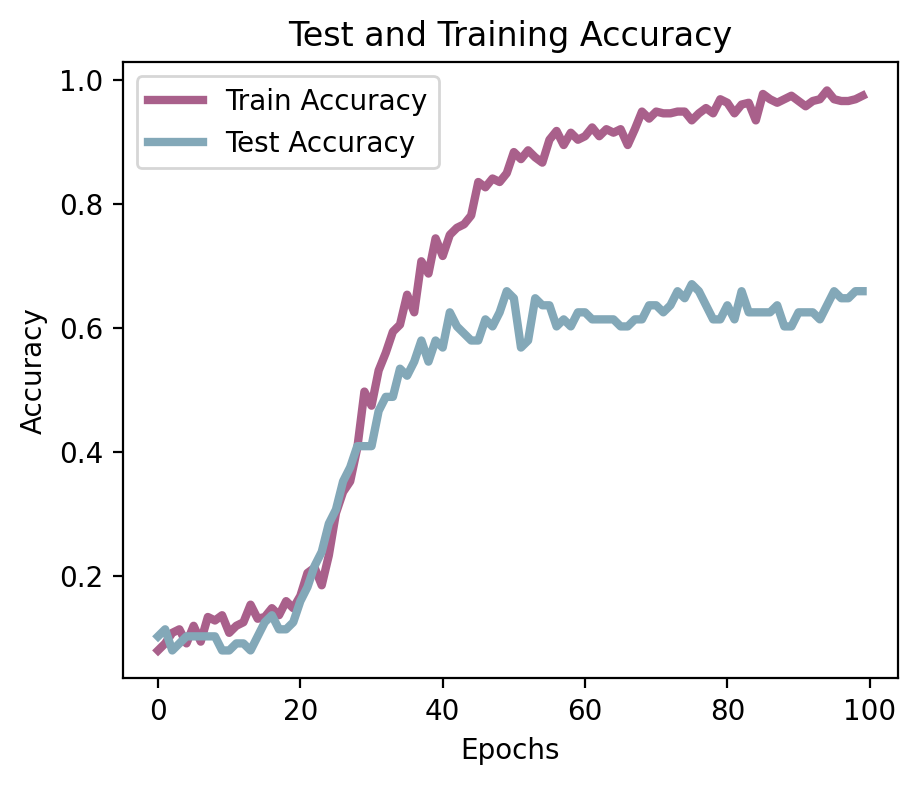

In [ ]:
set_matplotlib_formats('retina', quality=100)

print('Train accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['accuracy'])),history.history['accuracy'],color = purple, linewidth = 3, label='Train Accuracy')
plt.plot(range(0, len(history.history['val_accuracy'])),history.history['val_accuracy'],color = blue, linewidth = 3, label='Test Accuracy')
plt.legend(loc='upper left')

plt.title('Test and Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)  
plt.rc('axes', labelsize=MEDIUM_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()

Train Loss:  0.09
Test Loss:  2.38


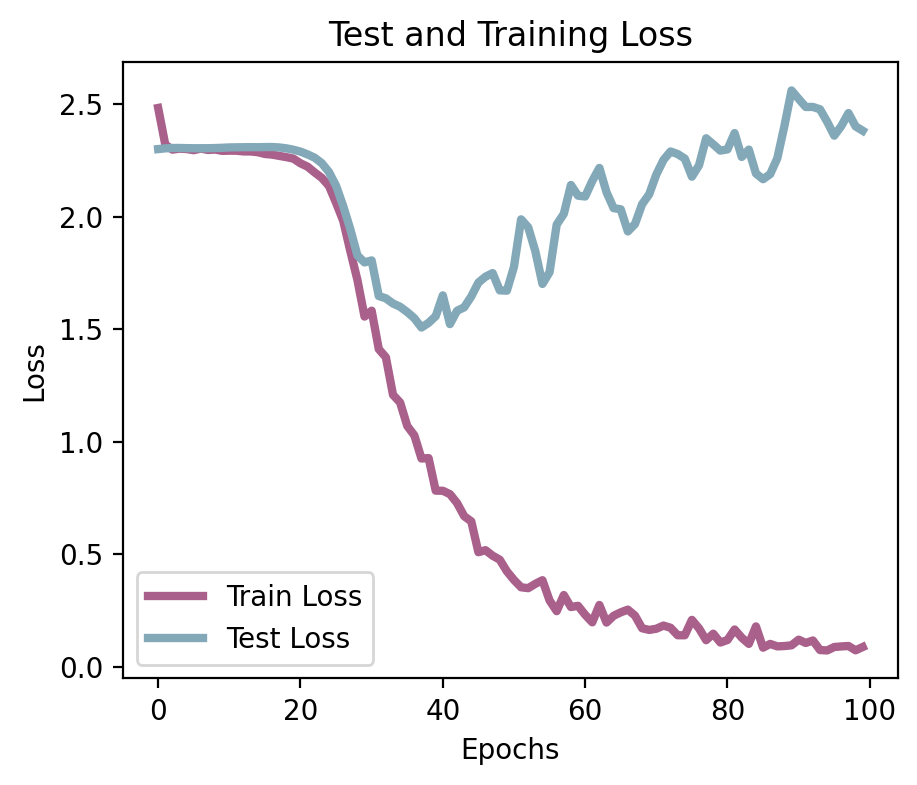

In [ ]:
set_matplotlib_formats('retina', quality=100)

print('Train Loss: ',np.round(history.history['loss'][-1],2))
print('Test Loss: ',np.round(history.history['val_loss'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['loss'])),history.history['loss'],color = purple, linewidth = 3, label='Train Loss')
plt.plot(range(0, len(history.history['val_loss'])),history.history['val_loss'],color = blue, linewidth = 3, label='Test Loss')
plt.legend(loc='lower left')

plt.title('Test and Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)  
plt.rc('axes', labelsize=MEDIUM_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()

In [ ]:
pred_probabilities= model_1.predict(X_test)

Confusion Matrix:
 [[ 5  0  0  0  0  0  1  0  1  0]
 [ 1 11  0  0  0  0  1  0  0  0]
 [ 0  1 11  0  0  0  1  0  0  0]
 [ 0  1  1  5  1  1  0  0  3  0]
 [ 0  0  0  1  8  0  1  0  0  2]
 [ 0  0  0  1  0  6  1  2  1  1]
 [ 0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  1  0  0  0 10  0  2]
 [ 0  0  0  0  0  1  1  0  9  0]
 [ 0  0  1  0  1  0  1  0  3  5]]


[Text(0, 0.5, 'FT_0'),
 Text(0, 1.5, 'FT_1'),
 Text(0, 2.5, 'FT_2'),
 Text(0, 3.5, 'FT_3'),
 Text(0, 4.5, 'FT_4'),
 Text(0, 5.5, 'FT_5'),
 Text(0, 6.5, 'FT_6'),
 Text(0, 7.5, 'FT_7'),
 Text(0, 8.5, 'FT_8'),
 Text(0, 9.5, 'FT_9')]

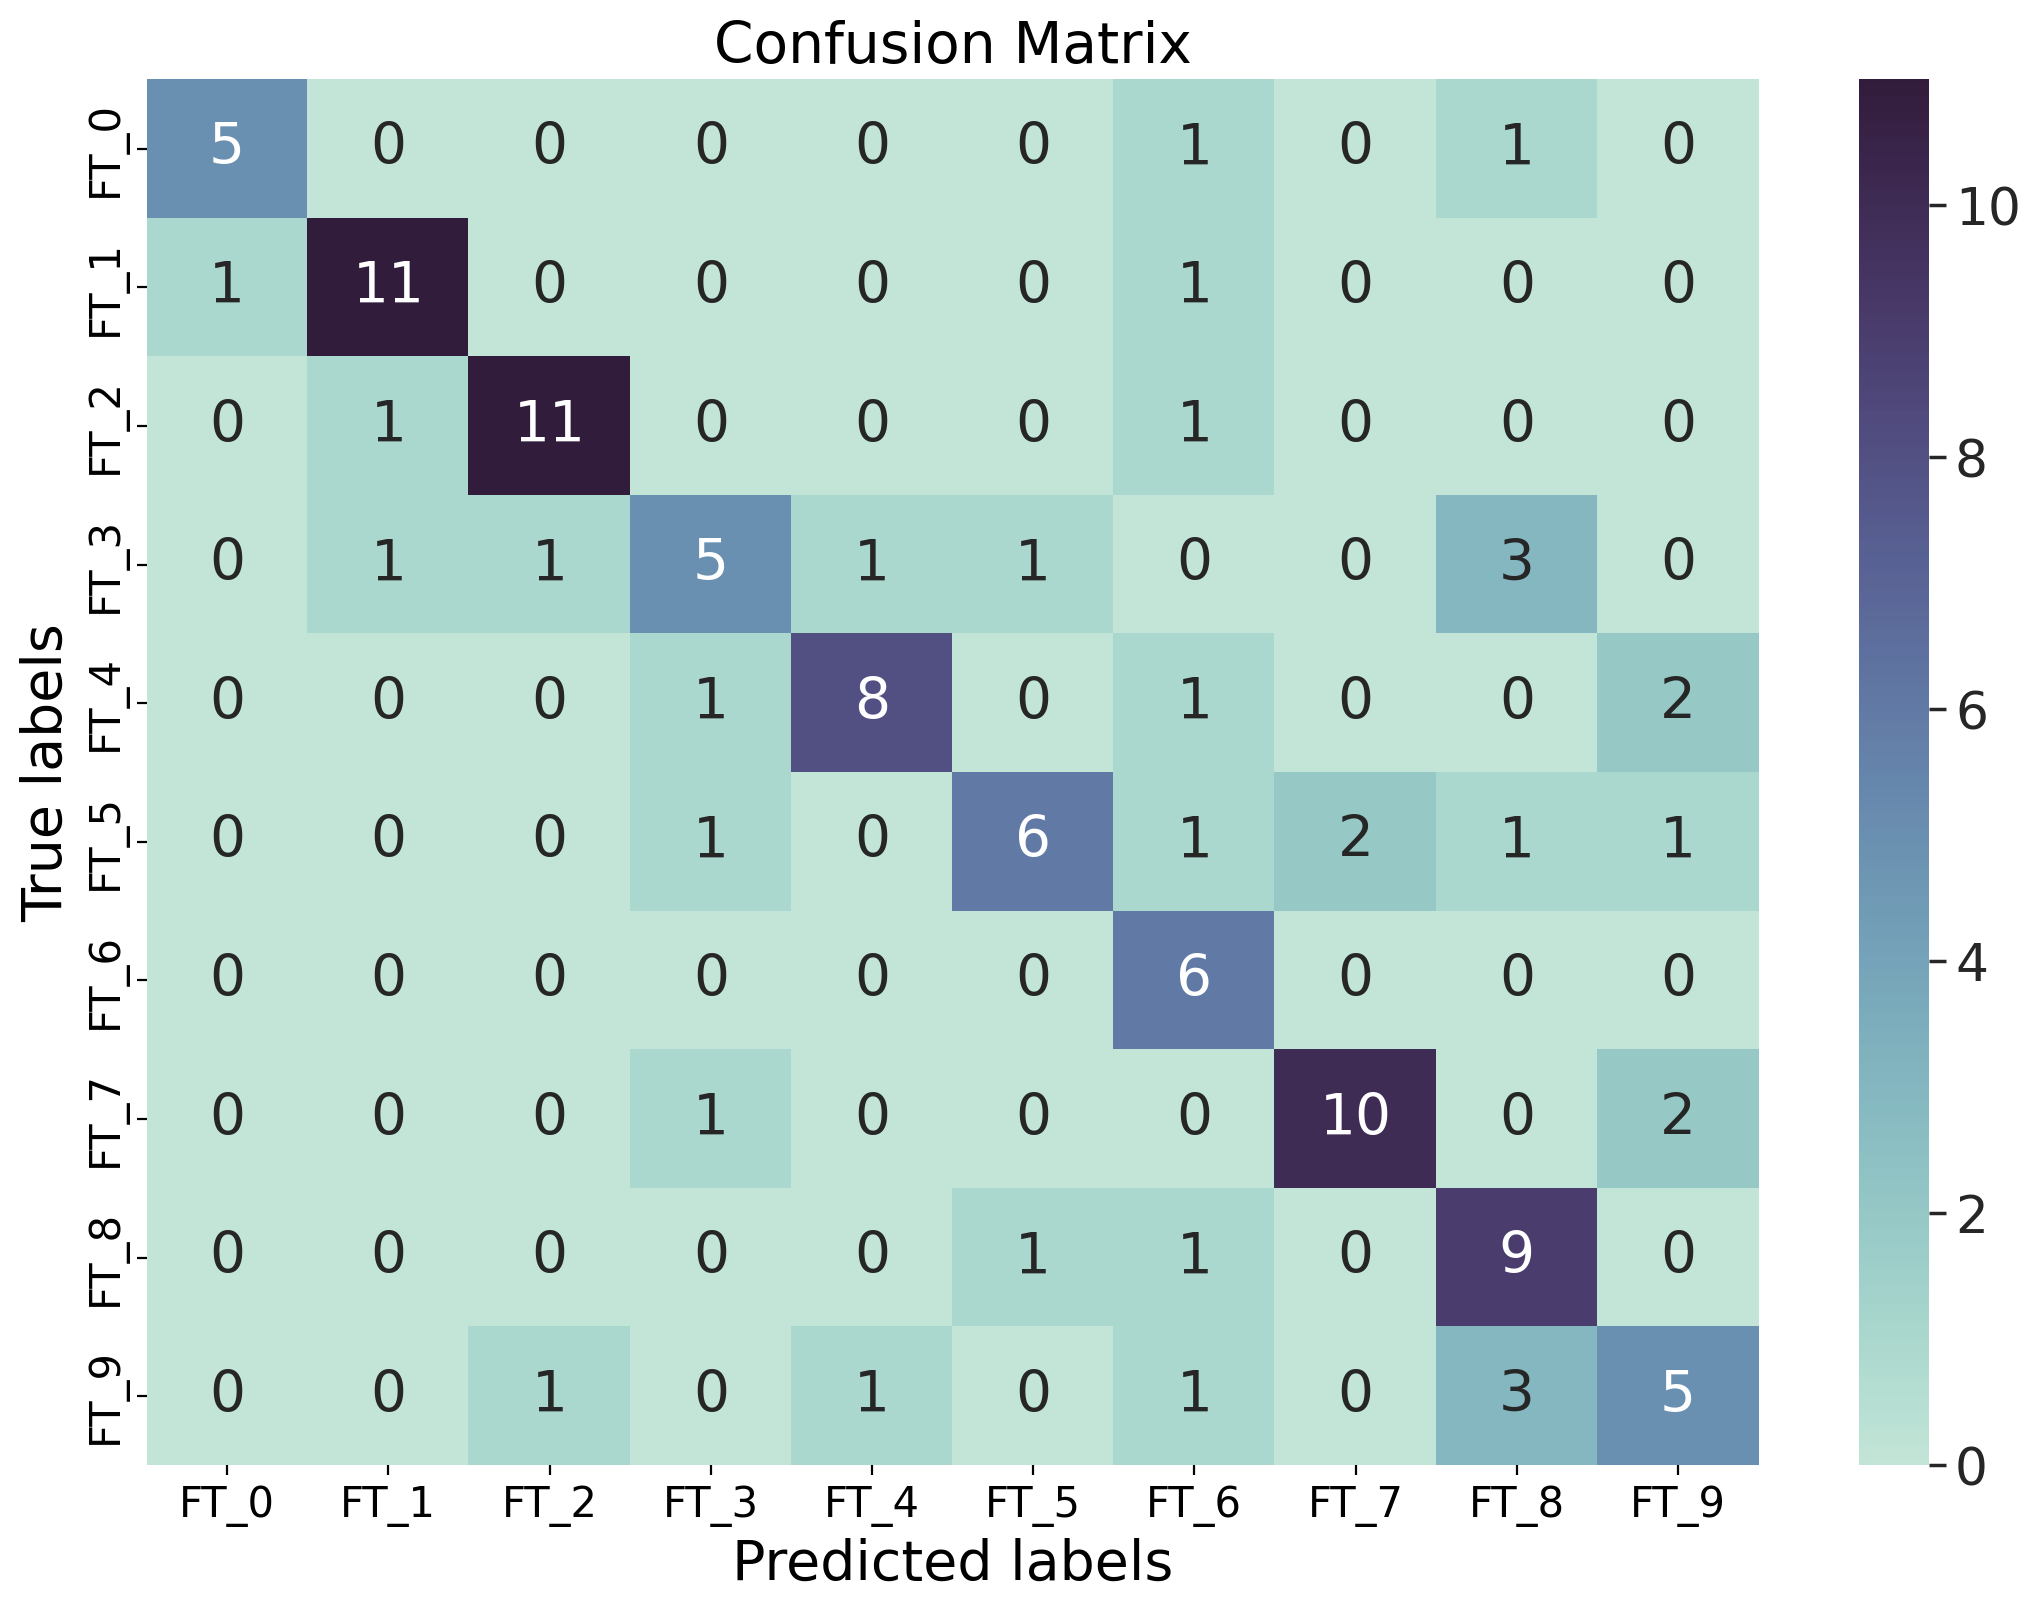

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm

fig = plt.subplots(figsize=(13, 9))

ConfMatrix=cm(np.argmax(y_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.set(font_scale=1.7)

sns.heatmap(ConfMatrix, annot=True, ax = ax,cmap = palette)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.rc('xtick', labelsize=17)  
plt.rc('ytick', labelsize=17)   

xTicklabels = []
yTicklabels = []

for i in range(0,10):
  aux= 'FT_' + str(i)
  xTicklabels.append(aux)
  aux2 = 'FT_' + str(i)
  yTicklabels.append(aux2)
ax.xaxis.set_ticklabels(xTicklabels)
ax.yaxis.set_ticklabels(yTicklabels)

##DA

In [ ]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Dropout, Dense, Flatten
from keras.layers import Convolution2D as Conv2D

model_DA_1 = Sequential()
model_DA_1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100,3)))
model_DA_1.add(Conv2D(32, (3, 3), activation='relu'))
model_DA_1.add(MaxPooling2D(pool_size=(2, 2)))
model_DA_1.add(Dropout(0.5))

model_DA_1.add(Conv2D(64, (3, 3), activation='relu'))
model_DA_1.add(Conv2D(64, (3, 3), activation='relu'))
model_DA_1.add(MaxPooling2D(pool_size=(2, 2)))
model_DA_1.add(Dropout(0.5))

model_DA_1.add(Flatten())
model_DA_1.add(Dense(256, activation='relu'))
model_DA_1.add(Dropout(0.5))
model_DA_1.add(Dense(10, activation='softmax')) 

In [ ]:
from tensorflow.keras.optimizers import SGD

model_DA_1.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_DA_1.summary()

Model: "sequential_443"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 44, 44, 64)        36928     
                                                    

In [ ]:
history=model_DA_1.fit(X_train_DA, y_train_DA,
         epochs=100,
         batch_size=128,
         validation_data=(X_val_DA, y_val_DA),
         verbose=1)

Epoch 1/100
6/6 [==============================] - 33s 5s/step - loss: 2.3349 - accuracy: 0.0866 - val_loss: 2.3045 - val_accuracy: 0.1080
Epoch 2/100
6/6 [==============================] - 31s 5s/step - loss: 2.3011 - accuracy: 0.1222 - val_loss: 2.3036 - val_accuracy: 0.0966
Epoch 3/100
6/6 [==============================] - 32s 5s/step - loss: 2.2979 - accuracy: 0.1222 - val_loss: 2.3038 - val_accuracy: 0.1136
Epoch 4/100
6/6 [==============================] - 32s 5s/step - loss: 2.2921 - accuracy: 0.1278 - val_loss: 2.3038 - val_accuracy: 0.1080
Epoch 5/100
6/6 [==============================] - 31s 5s/step - loss: 2.2841 - accuracy: 0.1364 - val_loss: 2.3035 - val_accuracy: 0.1136
Epoch 6/100
6/6 [==============================] - 32s 5s/step - loss: 2.2785 - accuracy: 0.1349 - val_loss: 2.3014 - val_accuracy: 0.1080
Epoch 7/100
6/6 [==============================] - 31s 5s/step - loss: 2.2626 - accuracy: 0.1577 - val_loss: 2.3003 - val_accuracy: 0.1250
Epoch 8/100
6/6 [==========

In [ ]:
# Check accuracy on train set
loss_train, accuracy_train = model_DA_1.evaluate(X_train_DA, y_train_DA, batch_size=128)
print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set

loss, accuracy = model_DA_1.evaluate(X_test_DA, y_test_DA, batch_size=128)
print('\nTest Accuracy=', accuracy)

6/6 [==============================] - 7s 1s/step - loss: 6.4988e-04 - accuracy: 1.0000

Training Accuracy= 1.0
1/1 [==============================] - 1s 1s/step - loss: 2.2595 - accuracy: 0.6727

Test Accuracy= 0.6727272868156433


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Train accuracy:  0.98
Test Accuracy:  0.41


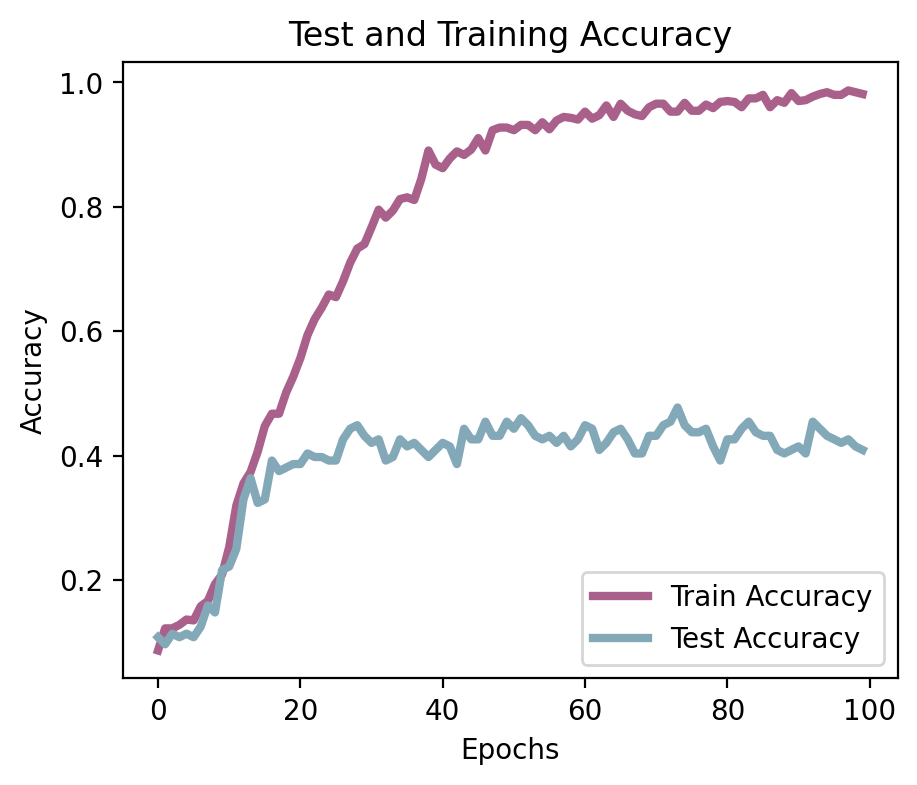

In [ ]:
set_matplotlib_formats('retina', quality=100)

print('Train accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['accuracy'])),history.history['accuracy'],color = purple, linewidth = 3, label='Train Accuracy')
plt.plot(range(0, len(history.history['val_accuracy'])),history.history['val_accuracy'],color = blue, linewidth = 3, label='Test Accuracy')
plt.legend(loc='lower right')

plt.title('Test and Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)  
plt.rc('axes', labelsize=MEDIUM_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()

Train Loss:  0.06
Test Loss:  5.01


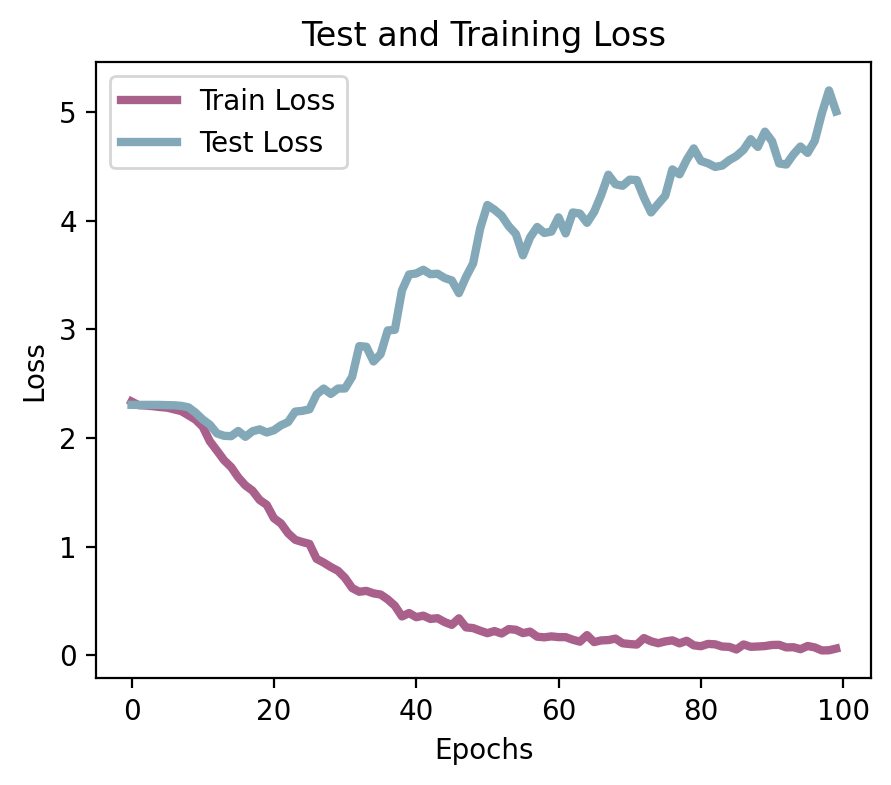

In [ ]:
set_matplotlib_formats('retina', quality=100)

print('Train Loss: ',np.round(history.history['loss'][-1],2))
print('Test Loss: ',np.round(history.history['val_loss'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['loss'])),history.history['loss'],color = purple, linewidth = 3, label='Train Loss')
plt.plot(range(0, len(history.history['val_loss'])),history.history['val_loss'],color = blue, linewidth = 3, label='Test Loss')
plt.legend(loc='upper left')

plt.title('Test and Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)  
plt.rc('axes', labelsize=MEDIUM_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()

In [ ]:
pred_probabilities= model_DA_1.predict(X_test_DA)

Confusion Matrix:
 [[ 6  0  0  0  0  1  0  0  0  0]
 [ 0 10  0  0  0  1  0  0  0  2]
 [ 1  1  9  0  0  1  0  0  1  0]
 [ 0  0  0  5  2  1  0  0  3  1]
 [ 0  1  0  0  8  0  1  0  0  2]
 [ 0  0  1  2  0  6  0  1  1  1]
 [ 0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  3]
 [ 0  0  0  0  0  1  0  0  9  1]
 [ 0  0  0  0  1  0  0  1  4  5]]


[Text(0, 0.5, 'FT_0'),
 Text(0, 1.5, 'FT_1'),
 Text(0, 2.5, 'FT_2'),
 Text(0, 3.5, 'FT_3'),
 Text(0, 4.5, 'FT_4'),
 Text(0, 5.5, 'FT_5'),
 Text(0, 6.5, 'FT_6'),
 Text(0, 7.5, 'FT_7'),
 Text(0, 8.5, 'FT_8'),
 Text(0, 9.5, 'FT_9')]

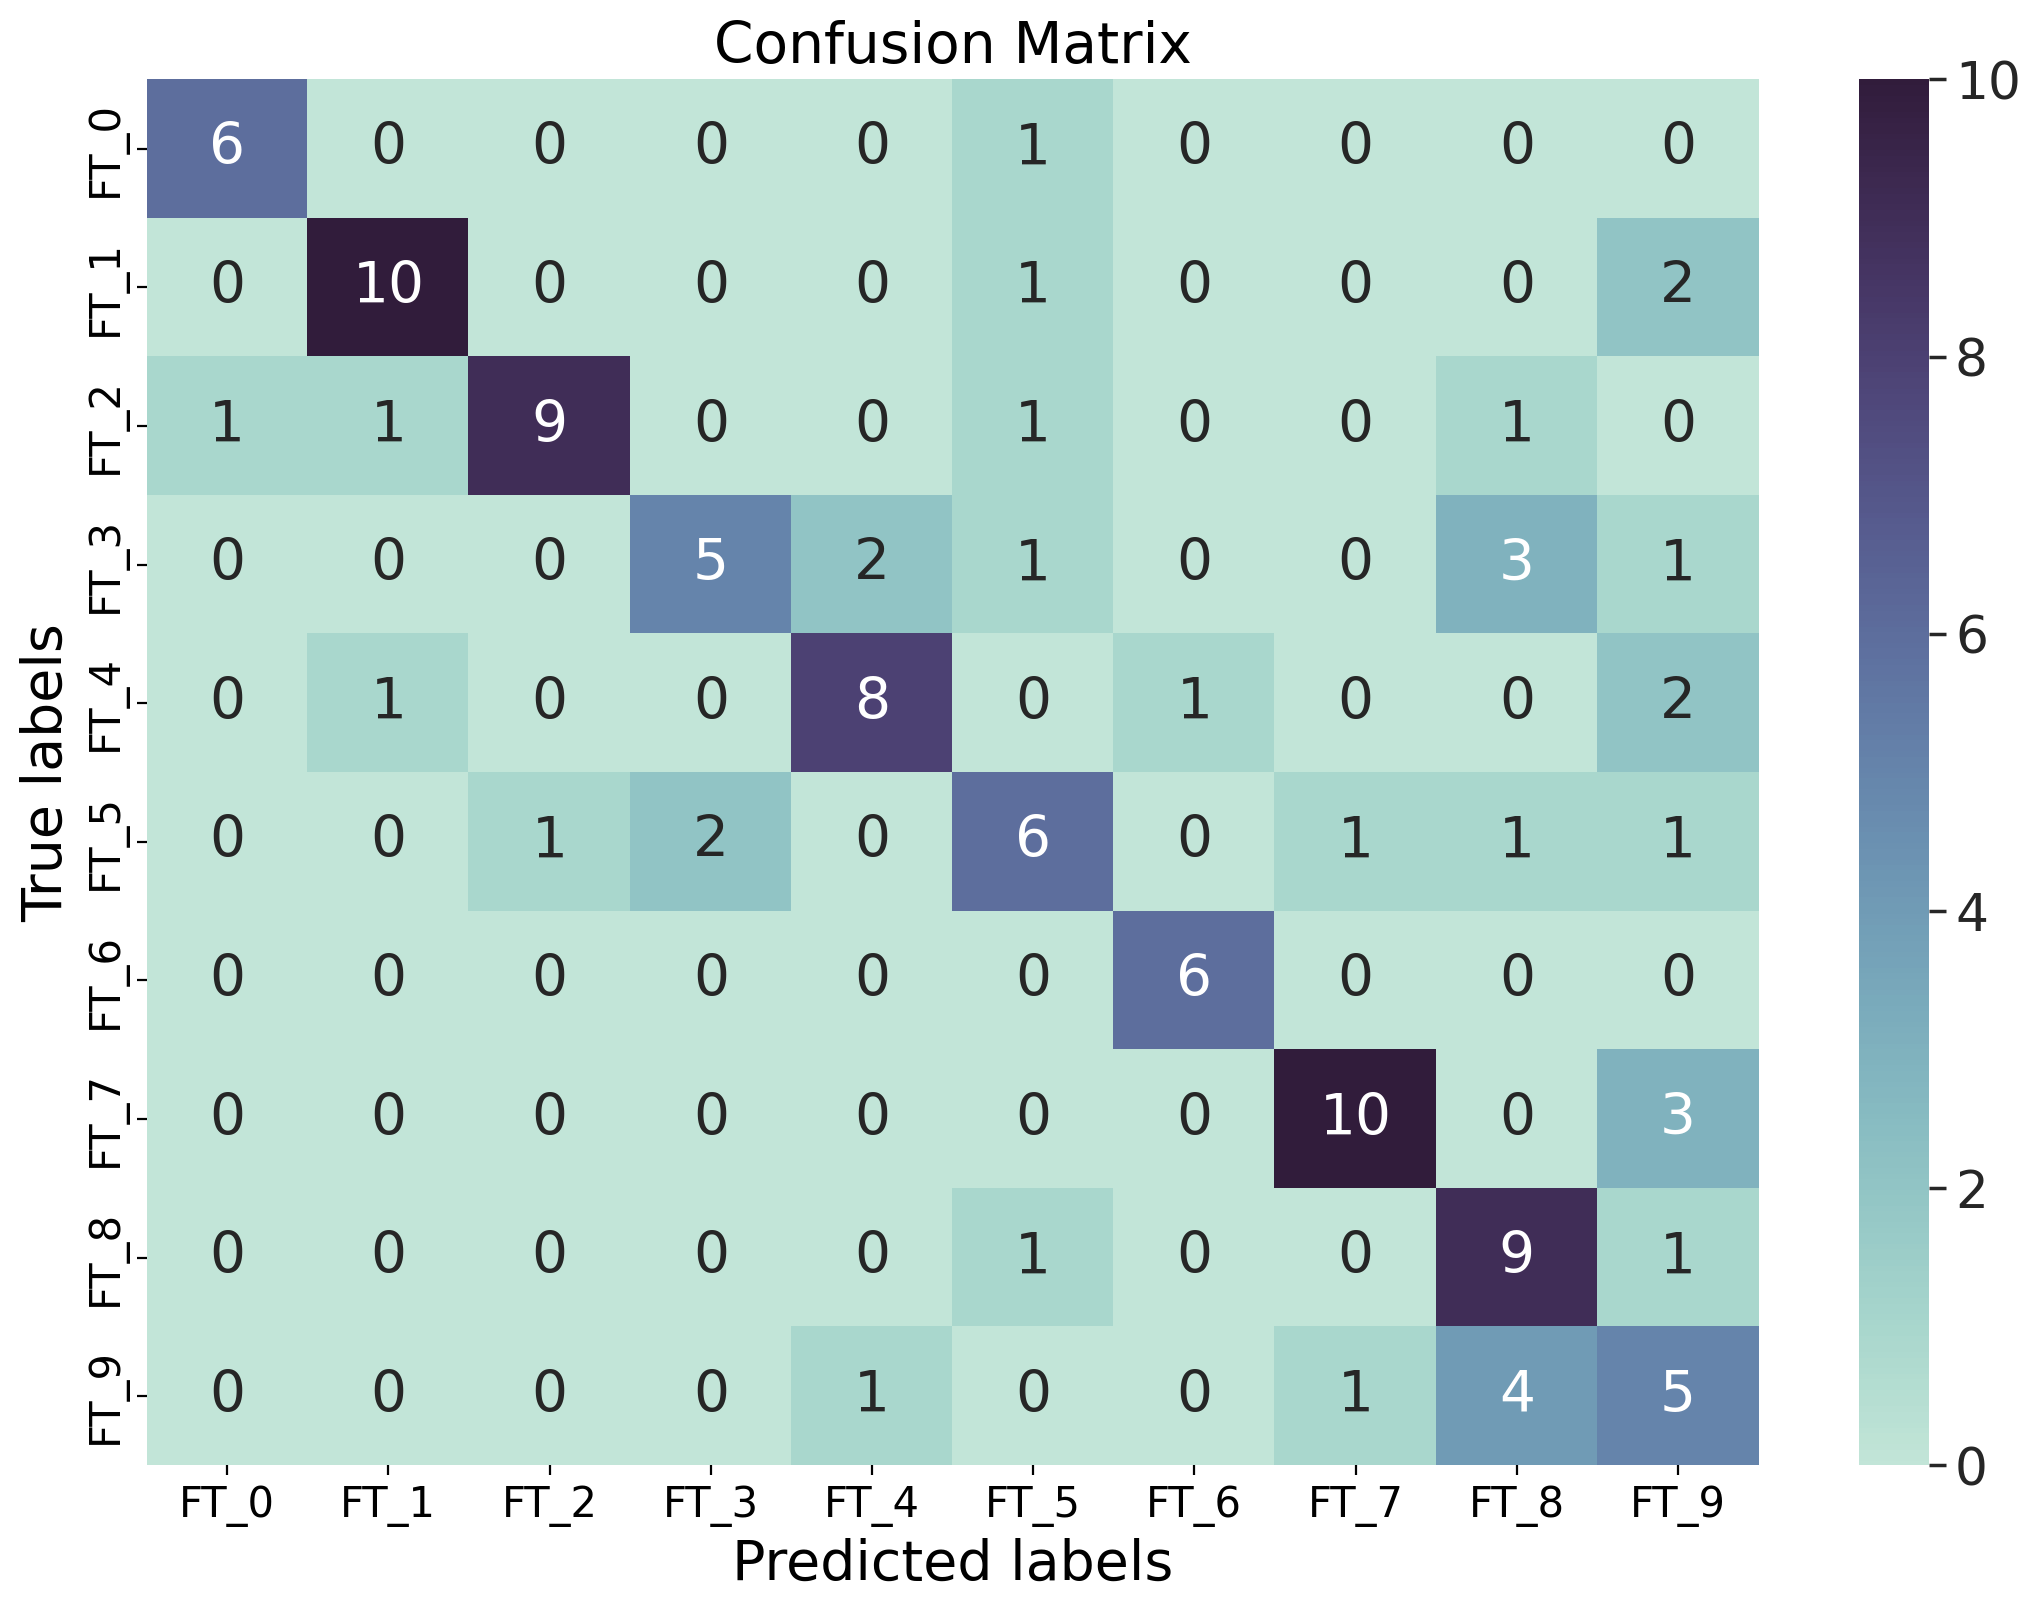

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm

fig = plt.subplots(figsize=(13, 9))

ConfMatrix=cm(np.argmax(y_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.set(font_scale=1.7)

sns.heatmap(ConfMatrix, annot=True, ax = ax,cmap = palette)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.rc('xtick', labelsize=17)  
plt.rc('ytick', labelsize=17)   

xTicklabels = []
yTicklabels = []

for i in range(0,10):
  aux= 'FT_' + str(i)
  xTicklabels.append(aux)
  aux2 = 'FT_' + str(i)
  yTicklabels.append(aux2)
ax.xaxis.set_ticklabels(xTicklabels)
ax.yaxis.set_ticklabels(yTicklabels)

#Epoch 50

##NO DA

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100,3)))
model_2.add(Conv2D(32, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.5))

model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.5))

model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax')) 

In [ ]:
from tensorflow.keras.optimizers import SGD

model_2.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [ ]:
history=model_2.fit(X_train_DA, y_train_DA,
         epochs=50,
         batch_size=128,
         validation_data=(X_val_DA, y_val_DA),
         verbose=1)

In [ ]:
# Check accuracy on train set
loss_train, accuracy_train = model_2.evaluate(X_train_DA, y_train_DA, batch_size=128)
print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set

loss, accuracy = model_2.evaluate(X_test_DA, y_test_DA, batch_size=128)
print('\nTest Accuracy=', accuracy)

In [ ]:
set_matplotlib_formats('retina', quality=100)

print('Train accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['accuracy'])),history.history['accuracy'],color = purple, linewidth = 3, label='Train Accuracy')
plt.plot(range(0, len(history.history['val_accuracy'])),history.history['val_accuracy'],color = blue, linewidth = 3, label='Test Accuracy')
plt.legend(loc='upper left')

plt.title('Test and Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)  
plt.rc('axes', labelsize=MEDIUM_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()

In [ ]:
pred_probabilities= model_2.predict(X_test)

In [ ]:
fig = plt.subplots(figsize=(13, 9))
ConfMatrix=cm(np.argmax(y_test,1), np.argmax(pred_probabilities,1))
print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.set(font_scale=1.7)

sns.heatmap(ConfMatrix, annot=True, ax = ax,cmap = palette)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.rc('xtick', labelsize=17)  
plt.rc('ytick', labelsize=17)   

xTicklabels = []
yTicklabels = []

for i in range(0,10):
  aux= 'FT_' + str(i)
  xTicklabels.append(aux)
  aux2 = 'FT_' + str(i)
  yTicklabels.append(aux2)
ax.xaxis.set_ticklabels(xTicklabels)
ax.yaxis.set_ticklabels(yTicklabels)

##DA

In [ ]:
model_DA_2 = Sequential()
model_DA_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100,3)))
model_DA_2.add(Conv2D(32, (3, 3), activation='relu'))
model_DA_2.add(MaxPooling2D(pool_size=(2, 2)))
model_DA_2.add(Dropout(0.5))

model_DA_2.add(Conv2D(64, (3, 3), activation='relu'))
model_DA_2.add(Conv2D(64, (3, 3), activation='relu'))
model_DA_2.add(MaxPooling2D(pool_size=(2, 2)))
model_DA_2.add(Dropout(0.5))

model_DA_2.add(Flatten())
model_DA_2.add(Dense(256, activation='relu'))
model_DA_2.add(Dropout(0.5))
model_DA_2.add(Dense(10, activation='softmax')) 

In [ ]:
from tensorflow.keras.optimizers import SGD

model_DA_2.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [ ]:
history=model_DA_2.fit(X_train_DA, y_train_DA,
         epochs=50,
         batch_size=128,
         validation_data=(X_val_DA, y_val_DA),
         verbose=1)

In [ ]:
# Check accuracy on train set
loss_train, accuracy_train = model_DA_2.evaluate(X_train_DA, y_train_DA, batch_size=128)
print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set
loss, accuracy = model_DA_2.evaluate(X_test_DA, y_test_DA, batch_size=128)
print('\nTest Accuracy=', accuracy)

In [ ]:
set_matplotlib_formats('retina', quality=100)

print('Train accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['accuracy'])),history.history['accuracy'],color = purple, linewidth = 3, label='Train Accuracy')
plt.plot(range(0, len(history.history['val_accuracy'])),history.history['val_accuracy'],color = blue, linewidth = 3, label='Test Accuracy')
plt.legend(loc='upper left')

plt.title('Test and Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)  
plt.rc('axes', labelsize=MEDIUM_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()

In [ ]:
pred_probabilities= model_DA_2.predict(X_test_DA)

In [ ]:
fig = plt.subplots(figsize=(13, 9))
ConfMatrix=cm(np.argmax(y_test,1), np.argmax(pred_probabilities,1))
print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.set(font_scale=1.7)

sns.heatmap(ConfMatrix, annot=True, ax = ax,cmap = palette)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.rc('xtick', labelsize=17)  
plt.rc('ytick', labelsize=17)   

xTicklabels = []
yTicklabels = []

for i in range(0,10):
  aux= 'FT_' + str(i)
  xTicklabels.append(aux)
  aux2 = 'FT_' + str(i)
  yTicklabels.append(aux2)
ax.xaxis.set_ticklabels(xTicklabels)
ax.yaxis.set_ticklabels(yTicklabels)ba

#Transfer Learning

In [ ]:
from tensorflow.keras import applications

vgg_model = applications.VGG16(weights='imagenet', include_top=False) 
################## Change the VGG model ###################################################################
#vgg_model = applications.xception.Xception(include_top=False, weights='imagenet', input_tensor=None, input_shape=(299, 299, 3), pooling=None, classes=1000)
#vgg_model = applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_tensor=None, input_shape=(299, 299, 3), pooling=None, classes=1000)
#vgg_model = applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3), pooling=None, classes=1000)

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
vgg_model.trainable = False

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Model

inputs = keras.Input(shape=(100, 100, 3))

In [ ]:
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as we will see later
x = vgg_model(inputs, training=False)

In [ ]:
# Convert features of las pooling layer of vgg_model to vectors
x = keras.layers.GlobalAveragePooling2D()(x)

In [ ]:
# A Dense classifier with 5 units (5 Font Types classification)
predictions = Dense(10, activation='softmax', name='softmax_new')(x)  # new softmax layer
transfer_model = Model(inputs, predictions)

In [ ]:
transfer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 softmax_new (Dense)         (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
import keras


transfer_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:

# validation_data allows to see evaluation on test while training
history=transfer_model.fit(X_train, y_train,
         epochs=50,
         batch_size=128,
         validation_data=(X_test, y_test),
         verbose=1)

Epoch 1/50
3/3 [==============================] - 46s 16s/step - loss: 2.3965 - accuracy: 0.0795 - val_loss: 2.2698 - val_accuracy: 0.1273
Epoch 2/50
3/3 [==============================] - 45s 17s/step - loss: 2.2711 - accuracy: 0.1847 - val_loss: 2.2067 - val_accuracy: 0.3182
Epoch 3/50
3/3 [==============================] - 45s 16s/step - loss: 2.2093 - accuracy: 0.2926 - val_loss: 2.1688 - val_accuracy: 0.3909
Epoch 4/50
3/3 [==============================] - 45s 16s/step - loss: 2.1592 - accuracy: 0.3551 - val_loss: 2.1379 - val_accuracy: 0.4182
Epoch 5/50
3/3 [==============================] - 45s 16s/step - loss: 2.1207 - accuracy: 0.4034 - val_loss: 2.1108 - val_accuracy: 0.4818
Epoch 6/50
3/3 [==============================] - 45s 16s/step - loss: 2.0779 - accuracy: 0.5028 - val_loss: 2.0821 - val_accuracy: 0.5091
Epoch 7/50
3/3 [==============================] - 45s 16s/step - loss: 2.0486 - accuracy: 0.5824 - val_loss: 2.0594 - val_accuracy: 0.4636
Epoch 8/50
3/3 [===========

In [ ]:
# Check accuracy on train set

loss_train, accuracy_train = transfer_model.evaluate(X_train, y_train, batch_size=128)


print('\nTraining Accuracy=', accuracy_train)

# Check accuracy on test set

loss, accuracy = transfer_model.evaluate(X_test, y_test, batch_size=128)


print('\nTest Accuracy=', accuracy)

3/3 [==============================] - 34s 11s/step - loss: 1.1007 - accuracy: 0.9233

Training Accuracy= 0.9232954382896423
1/1 [==============================] - 11s 11s/step - loss: 1.2332 - accuracy: 0.8091

Test Accuracy= 0.8090909123420715


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Train Accuracy:  0.92
Test Accuracy:  0.81


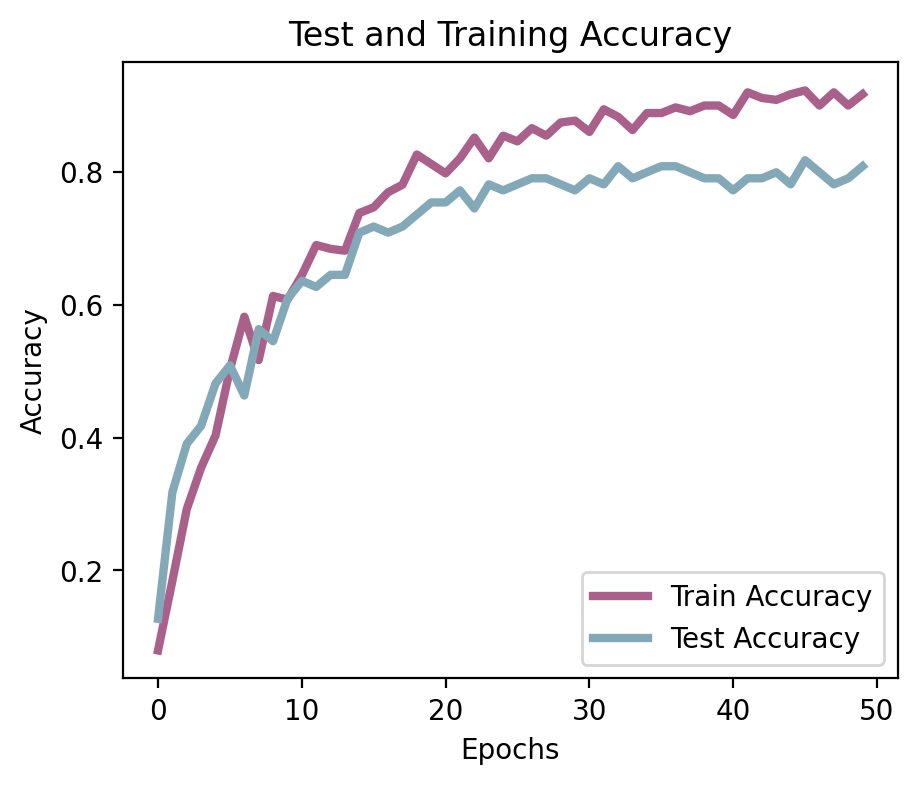

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina', quality=100)

print('Train Accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['accuracy'])),history.history['accuracy'],color = purple, linewidth= 3, label='Train Accuracy')
plt.plot(range(0, len(history.history['val_accuracy'])),history.history['val_accuracy'],color = blue, linewidth= 3, label='Test Accuracy')
plt.legend(loc='lower right')

plt.title('Test and Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()

Train Loss:  1.11
Test Loss:  1.23


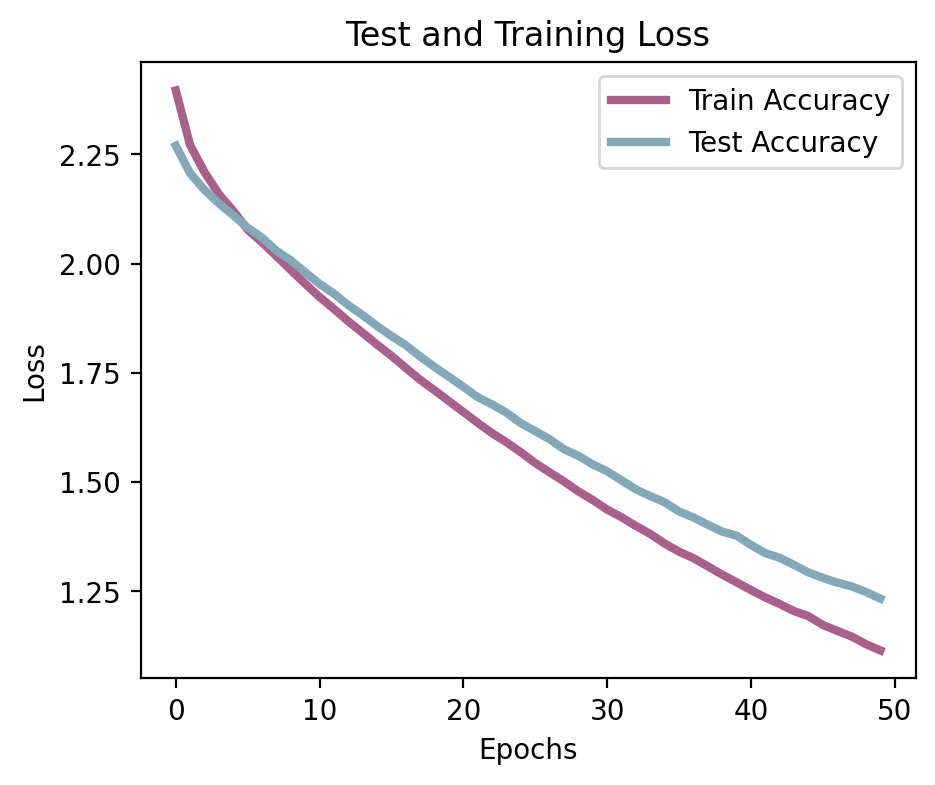

In [ ]:
set_matplotlib_formats('retina', quality=100)

print('Train Loss: ',np.round(history.history['loss'][-1],2))
print('Test Loss: ',np.round(history.history['val_loss'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['loss'])),history.history['loss'],color = purple,linewidth = 3, label='Train Accuracy')
plt.plot(range(0, len(history.history['val_loss'])),history.history['val_loss'],color = blue, linewidth = 3, label='Test Accuracy')
plt.legend(loc='upper right')

plt.title('Test and Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)  
plt.rc('axes', labelsize=MEDIUM_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()

In [ ]:
pred_probabilities= transfer_model.predict(X_test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',y_test[0:5])

First Five Probs.:
 [[0.18821174 0.01378175 0.04629989 0.05249501 0.01624944 0.07583591
  0.45191562 0.01081702 0.08305386 0.06133978]
 [0.10240994 0.02528165 0.03321196 0.07750925 0.03358214 0.1095893
  0.15898716 0.02700741 0.3497616  0.08265962]
 [0.03061096 0.13460511 0.10193391 0.05782914 0.30664474 0.04974226
  0.03601801 0.14333628 0.04281415 0.09646552]
 [0.0293244  0.00869928 0.0864047  0.1252964  0.04369221 0.49145386
  0.06889309 0.03869951 0.07383382 0.03370273]
 [0.01781612 0.05072103 0.05542282 0.04611267 0.18556507 0.07225078
  0.02943701 0.36576977 0.07893894 0.09796582]]


First Five Classes:
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Confusion Matrix:
 [[ 7  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  1  0  0  0  0  0]
 [ 0  0 11  0  0  0  1  1  0  0]
 [ 0  0  0  3  2  6  0  0  0  1]
 [ 0  1  0  0  8  0  0  2  0  1]
 [ 0  0  0  0  0 12  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  1  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0 11  0]
 [ 2  0  0  0  0  1  1  0  0  7]]


[Text(0, 0.5, 'FT_0'),
 Text(0, 1.5, 'FT_1'),
 Text(0, 2.5, 'FT_2'),
 Text(0, 3.5, 'FT_3'),
 Text(0, 4.5, 'FT_4'),
 Text(0, 5.5, 'FT_5'),
 Text(0, 6.5, 'FT_6'),
 Text(0, 7.5, 'FT_7'),
 Text(0, 8.5, 'FT_8'),
 Text(0, 9.5, 'FT_9')]

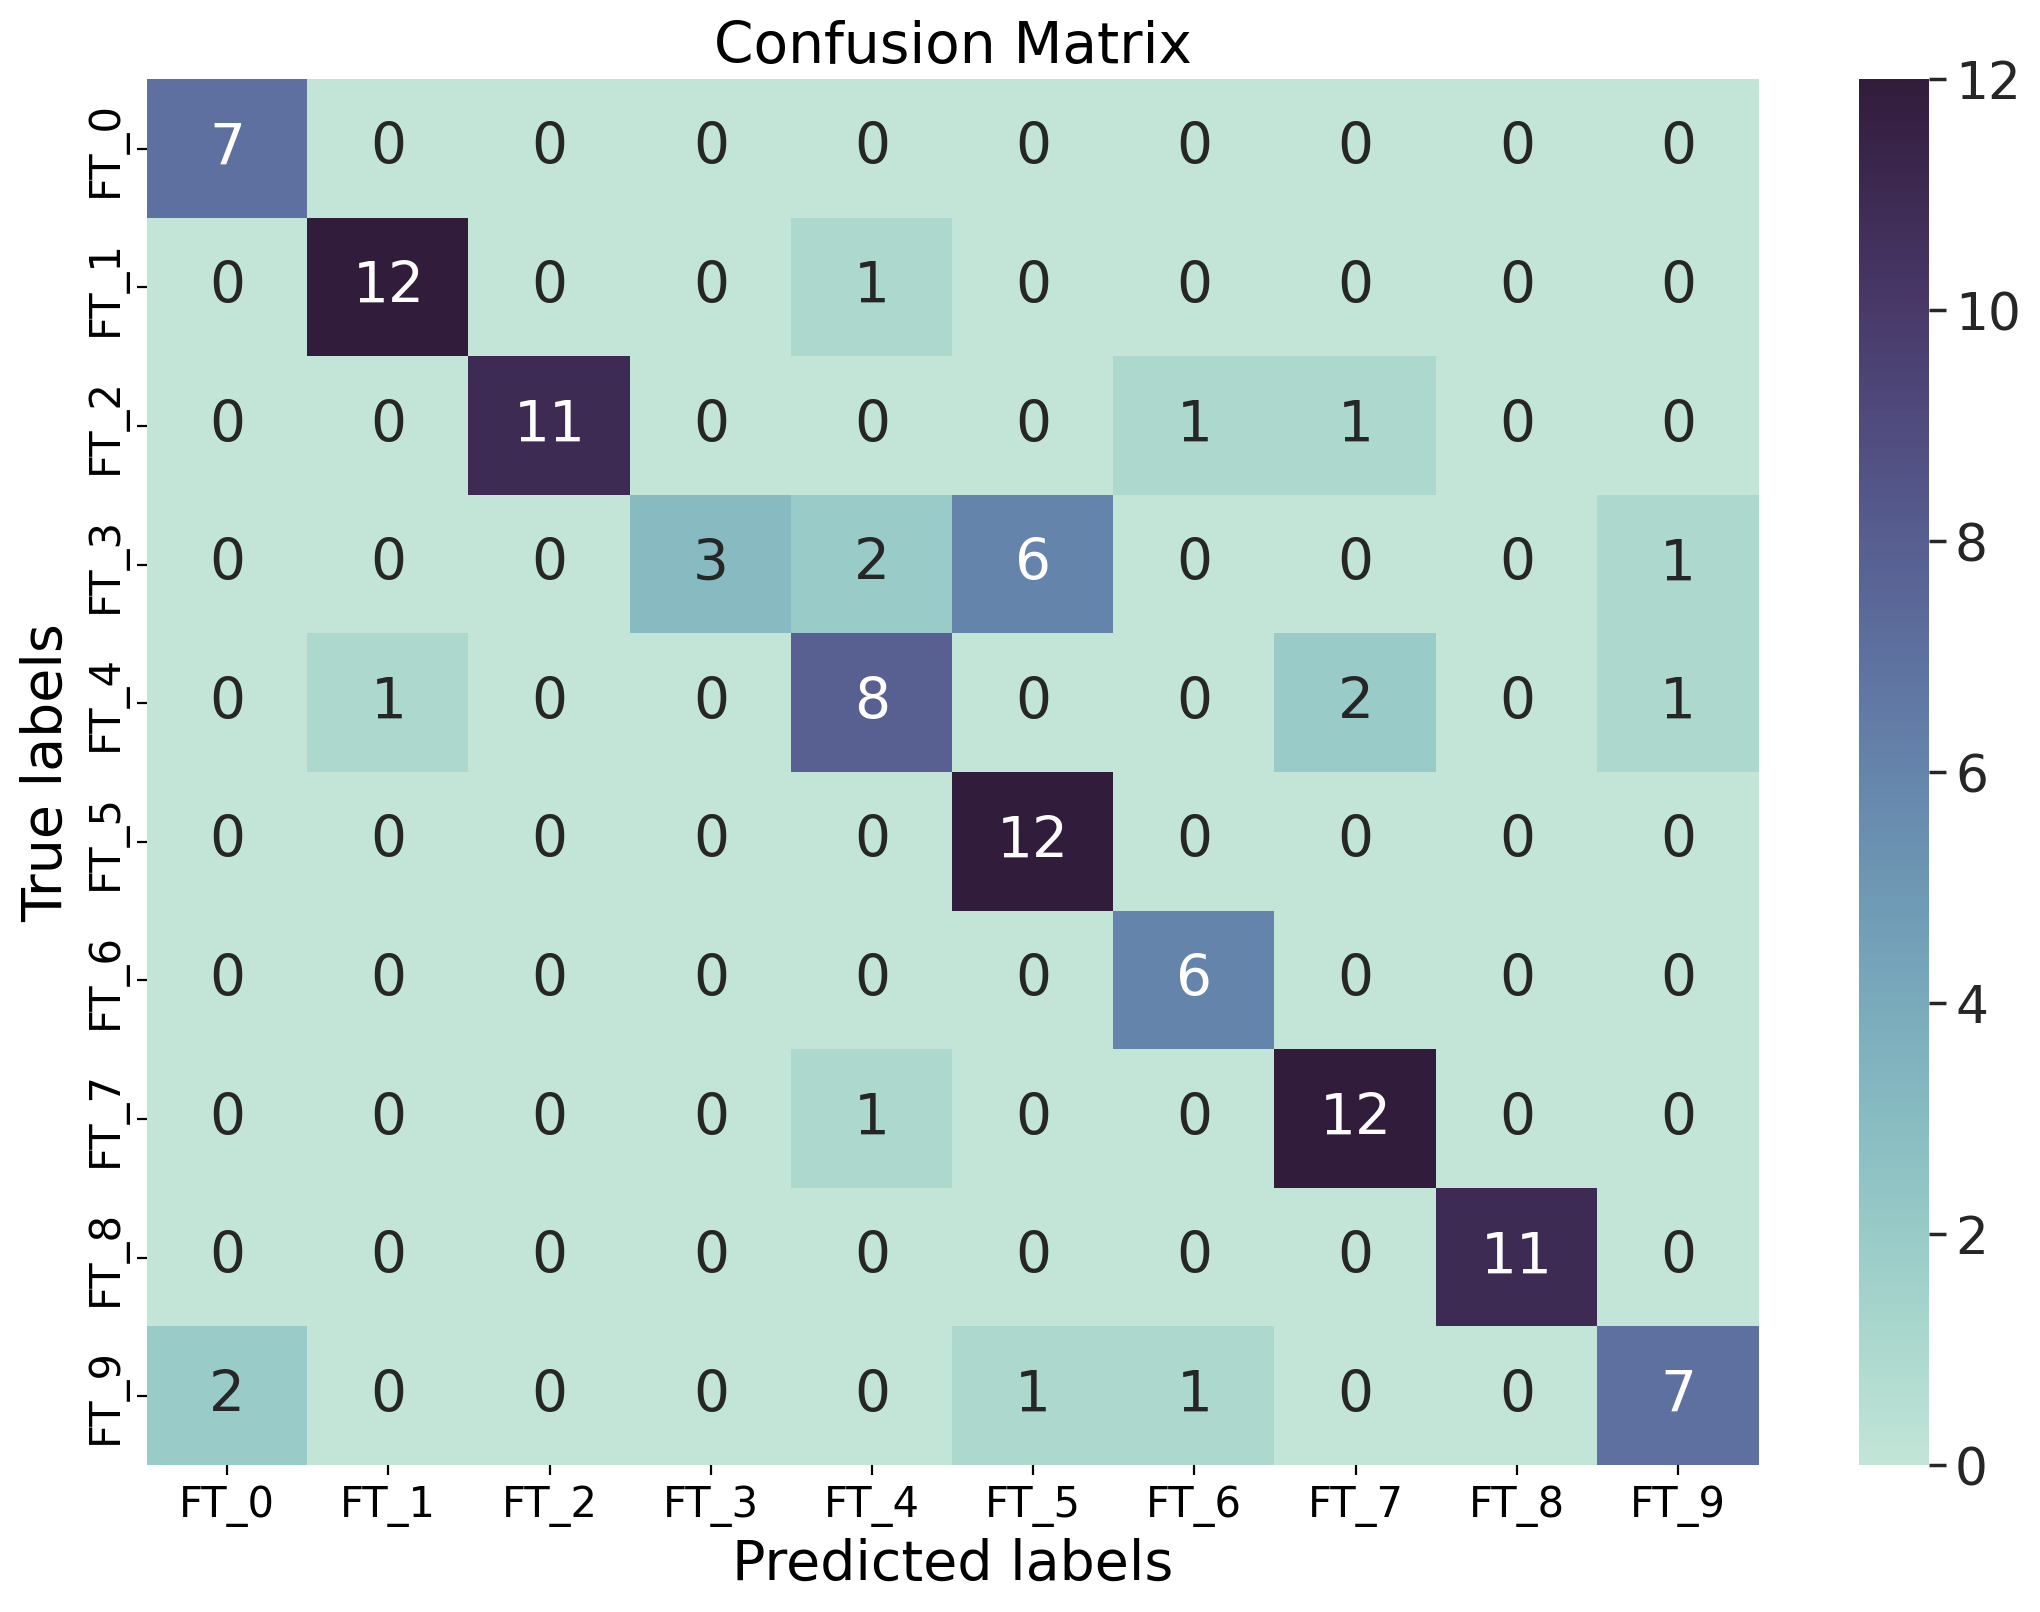

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm

fig = plt.subplots(figsize=(13, 9))

ConfMatrix=cm(np.argmax(y_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.set(font_scale=1.7)

sns.heatmap(ConfMatrix, annot=True, ax = ax,cmap = palette); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.rc('xtick', labelsize=17)  
plt.rc('ytick', labelsize=17)   

xTicklabels = []
yTicklabels = []

for i in range(0,10):
  aux= 'FT_' + str(i)
  xTicklabels.append(aux)
  aux2 = 'FT_' + str(i)
  yTicklabels.append(aux2)
ax.xaxis.set_ticklabels(xTicklabels)
ax.yaxis.set_ticklabels(yTicklabels)

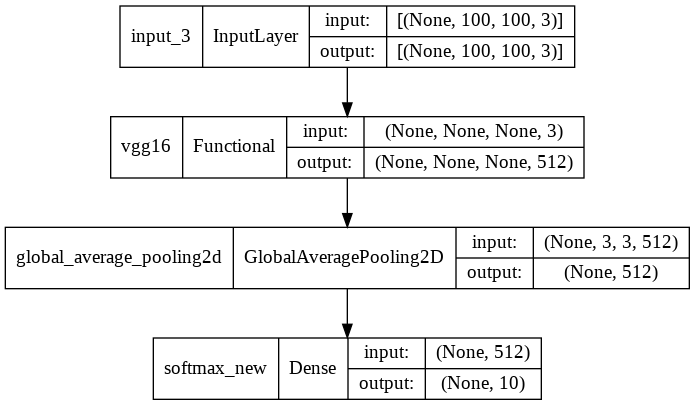

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(transfer_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
layers_info = {}
transfer_model_layer_names = []
for i in transfer_model.layers:
    layers_info[i.name] = i.get_config()
    transfer_model_layer_names.append(i.name)
    i.get_weights()
print(transfer_model_layer_names)

['input_3', 'vgg16', 'global_average_pooling2d', 'softmax_new']


In [ ]:
transfer_model.layers[1].get_weights()[0].shape

(3, 3, 3, 64)

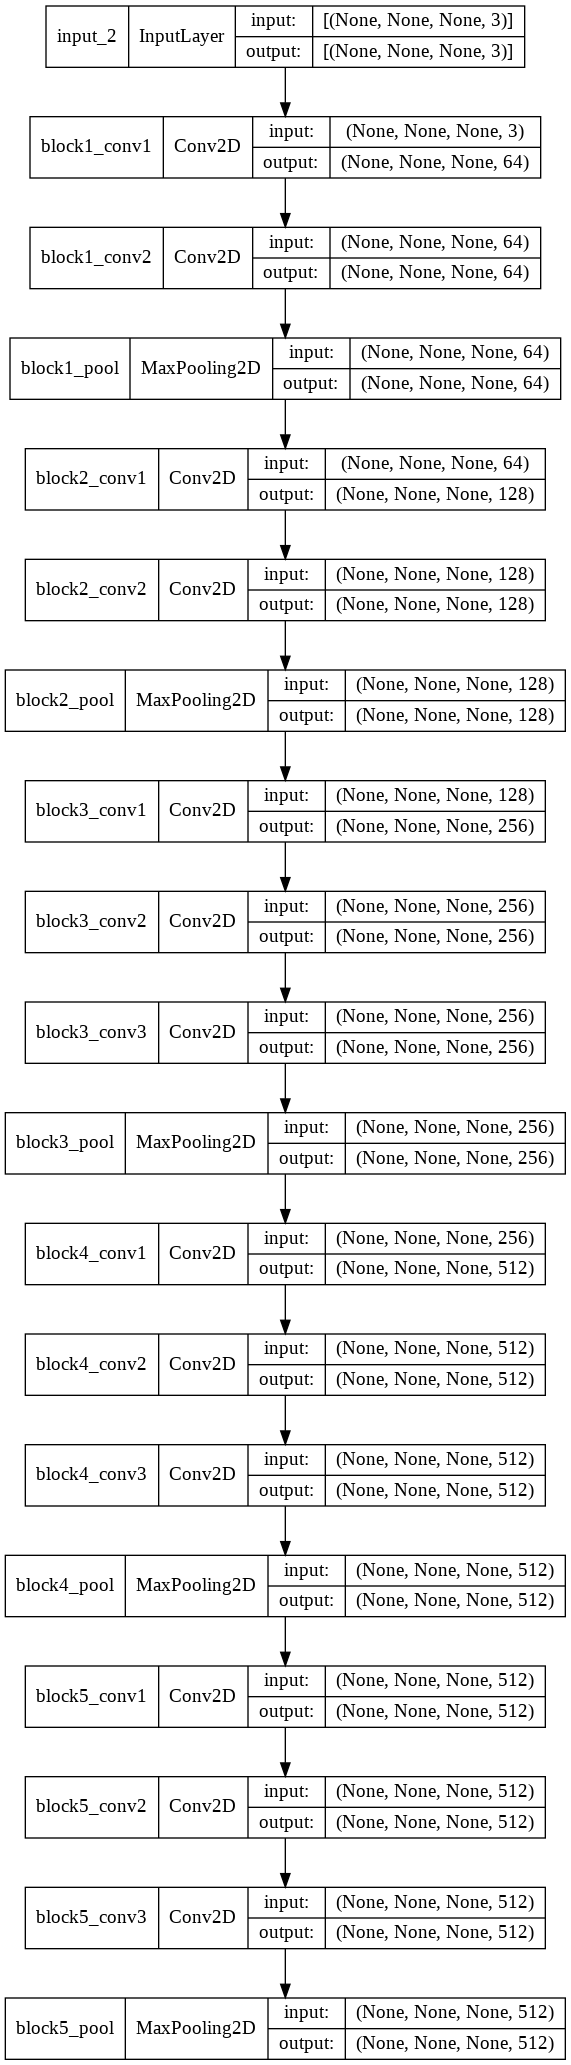

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(vgg_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
layers_info = {}
vgg_model_layer_names = []
for i in vgg_model.layers:
    layers_info[i.name] = i.get_config()
    vgg_model_layer_names.append(i.name)
    i.get_weights()
print(vgg_model_layer_names)

['input_2', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']


In [ ]:
for layer in vgg_model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)
  

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


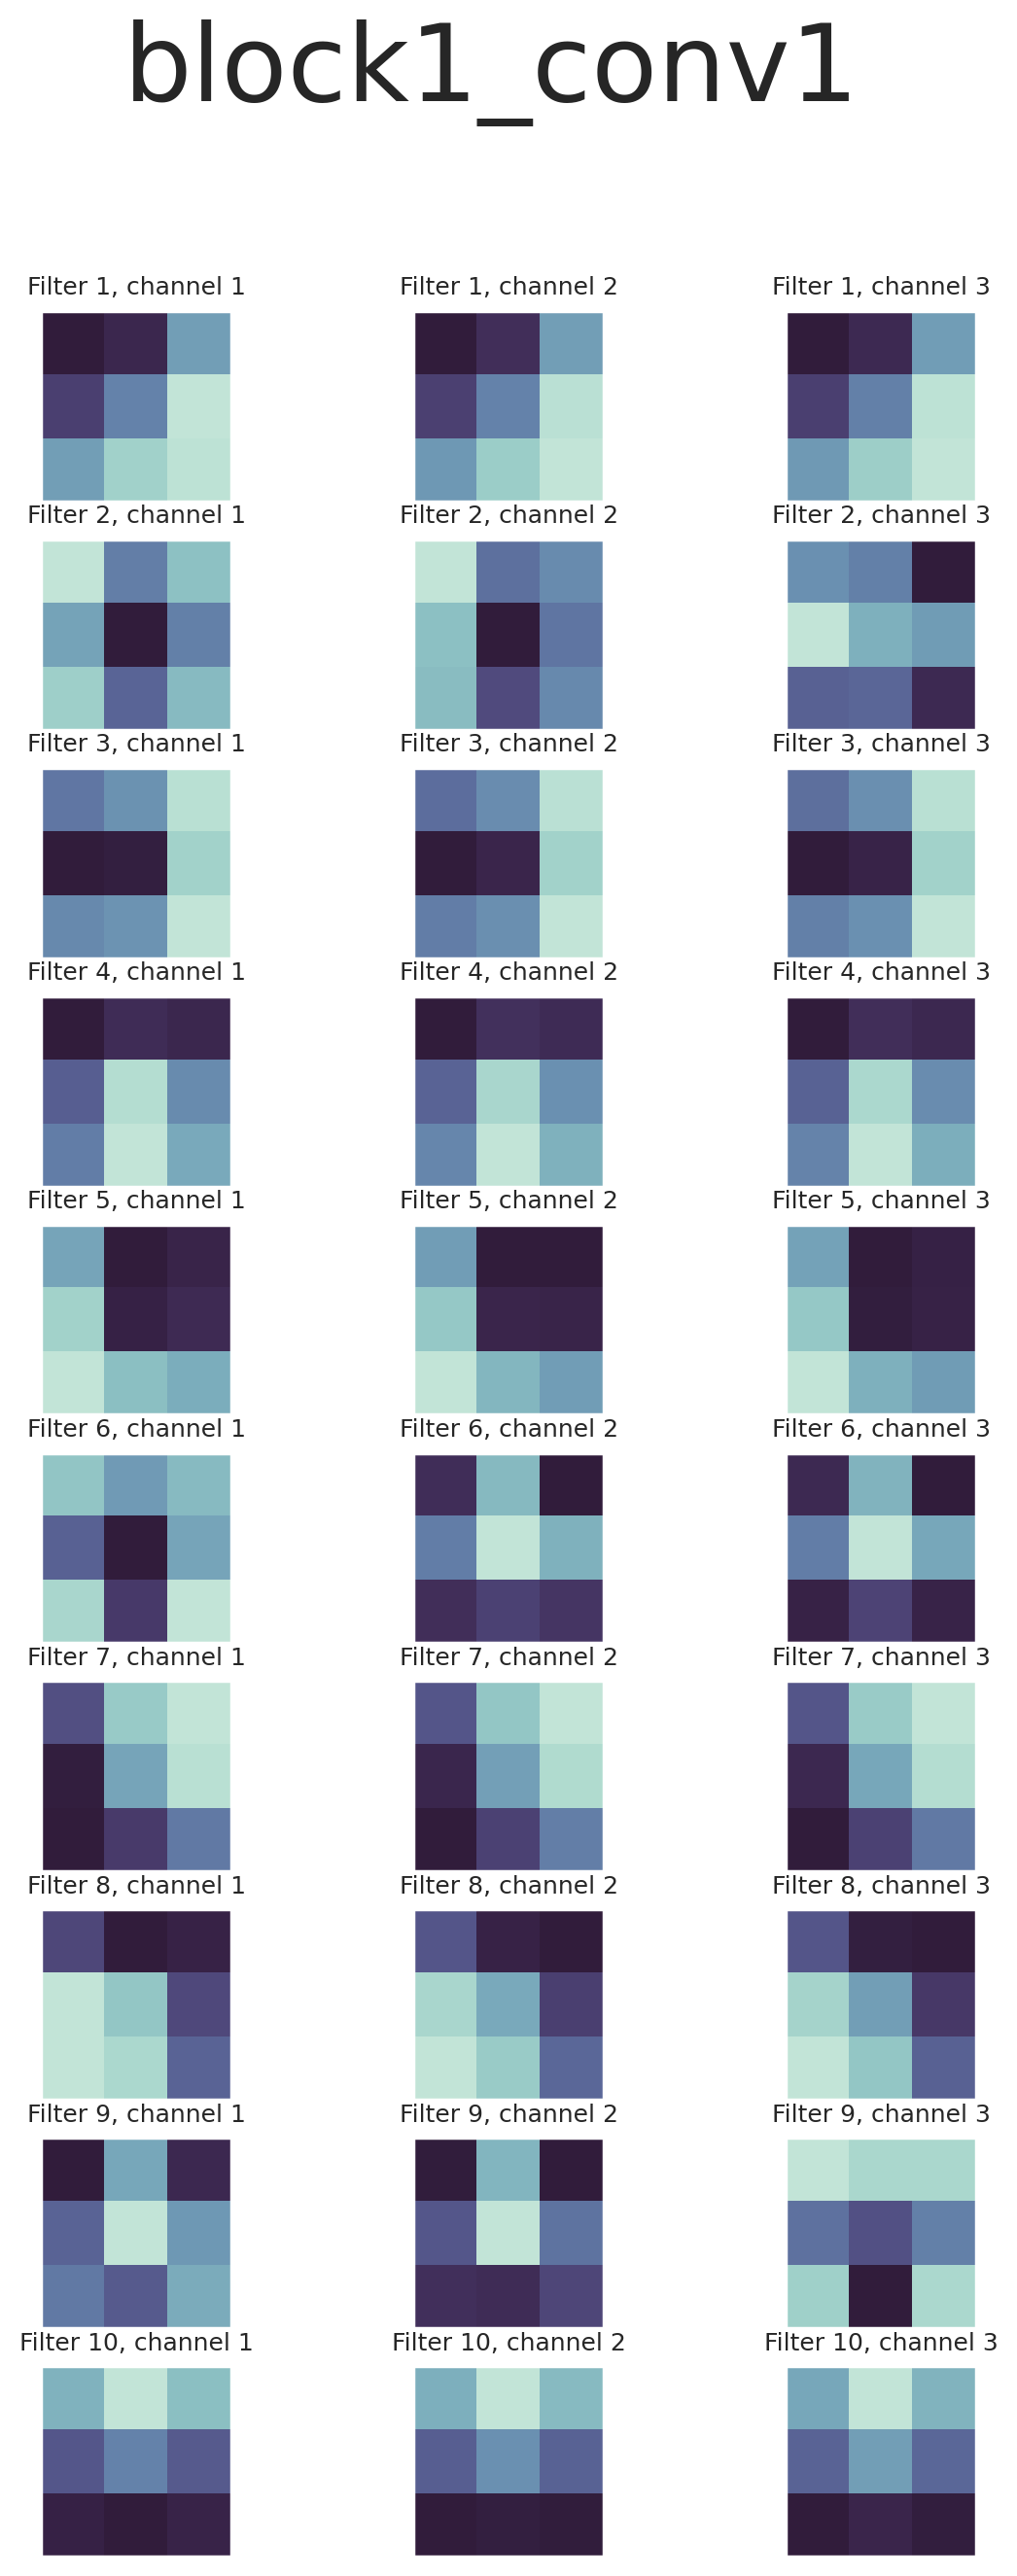

In [ ]:
#block1_conv1 (3, 3, 3, 64)
n_layer = 1
filters = vgg_model.layers[n_layer].get_weights()[0]

n_rows = 10  # n_filters
n_cols = 3  # n_chs

fig,ax = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(7,15))
plt.suptitle(vgg_model.layers[n_layer].name,fontsize=40)
for i in range(n_rows):
	filter = filters[:, :, :, i]
	for j in range(n_cols):
		ax[i][j].imshow(filter[:, :, j], cmap=palette)
		ax[i][j].set_title( 'Filter '+ str((i+1)) + ', channel ' + str((j+1)), size = 9)
		ax[i][j].set_xticks([])
		ax[i][j].set_yticks([])
plt.show()

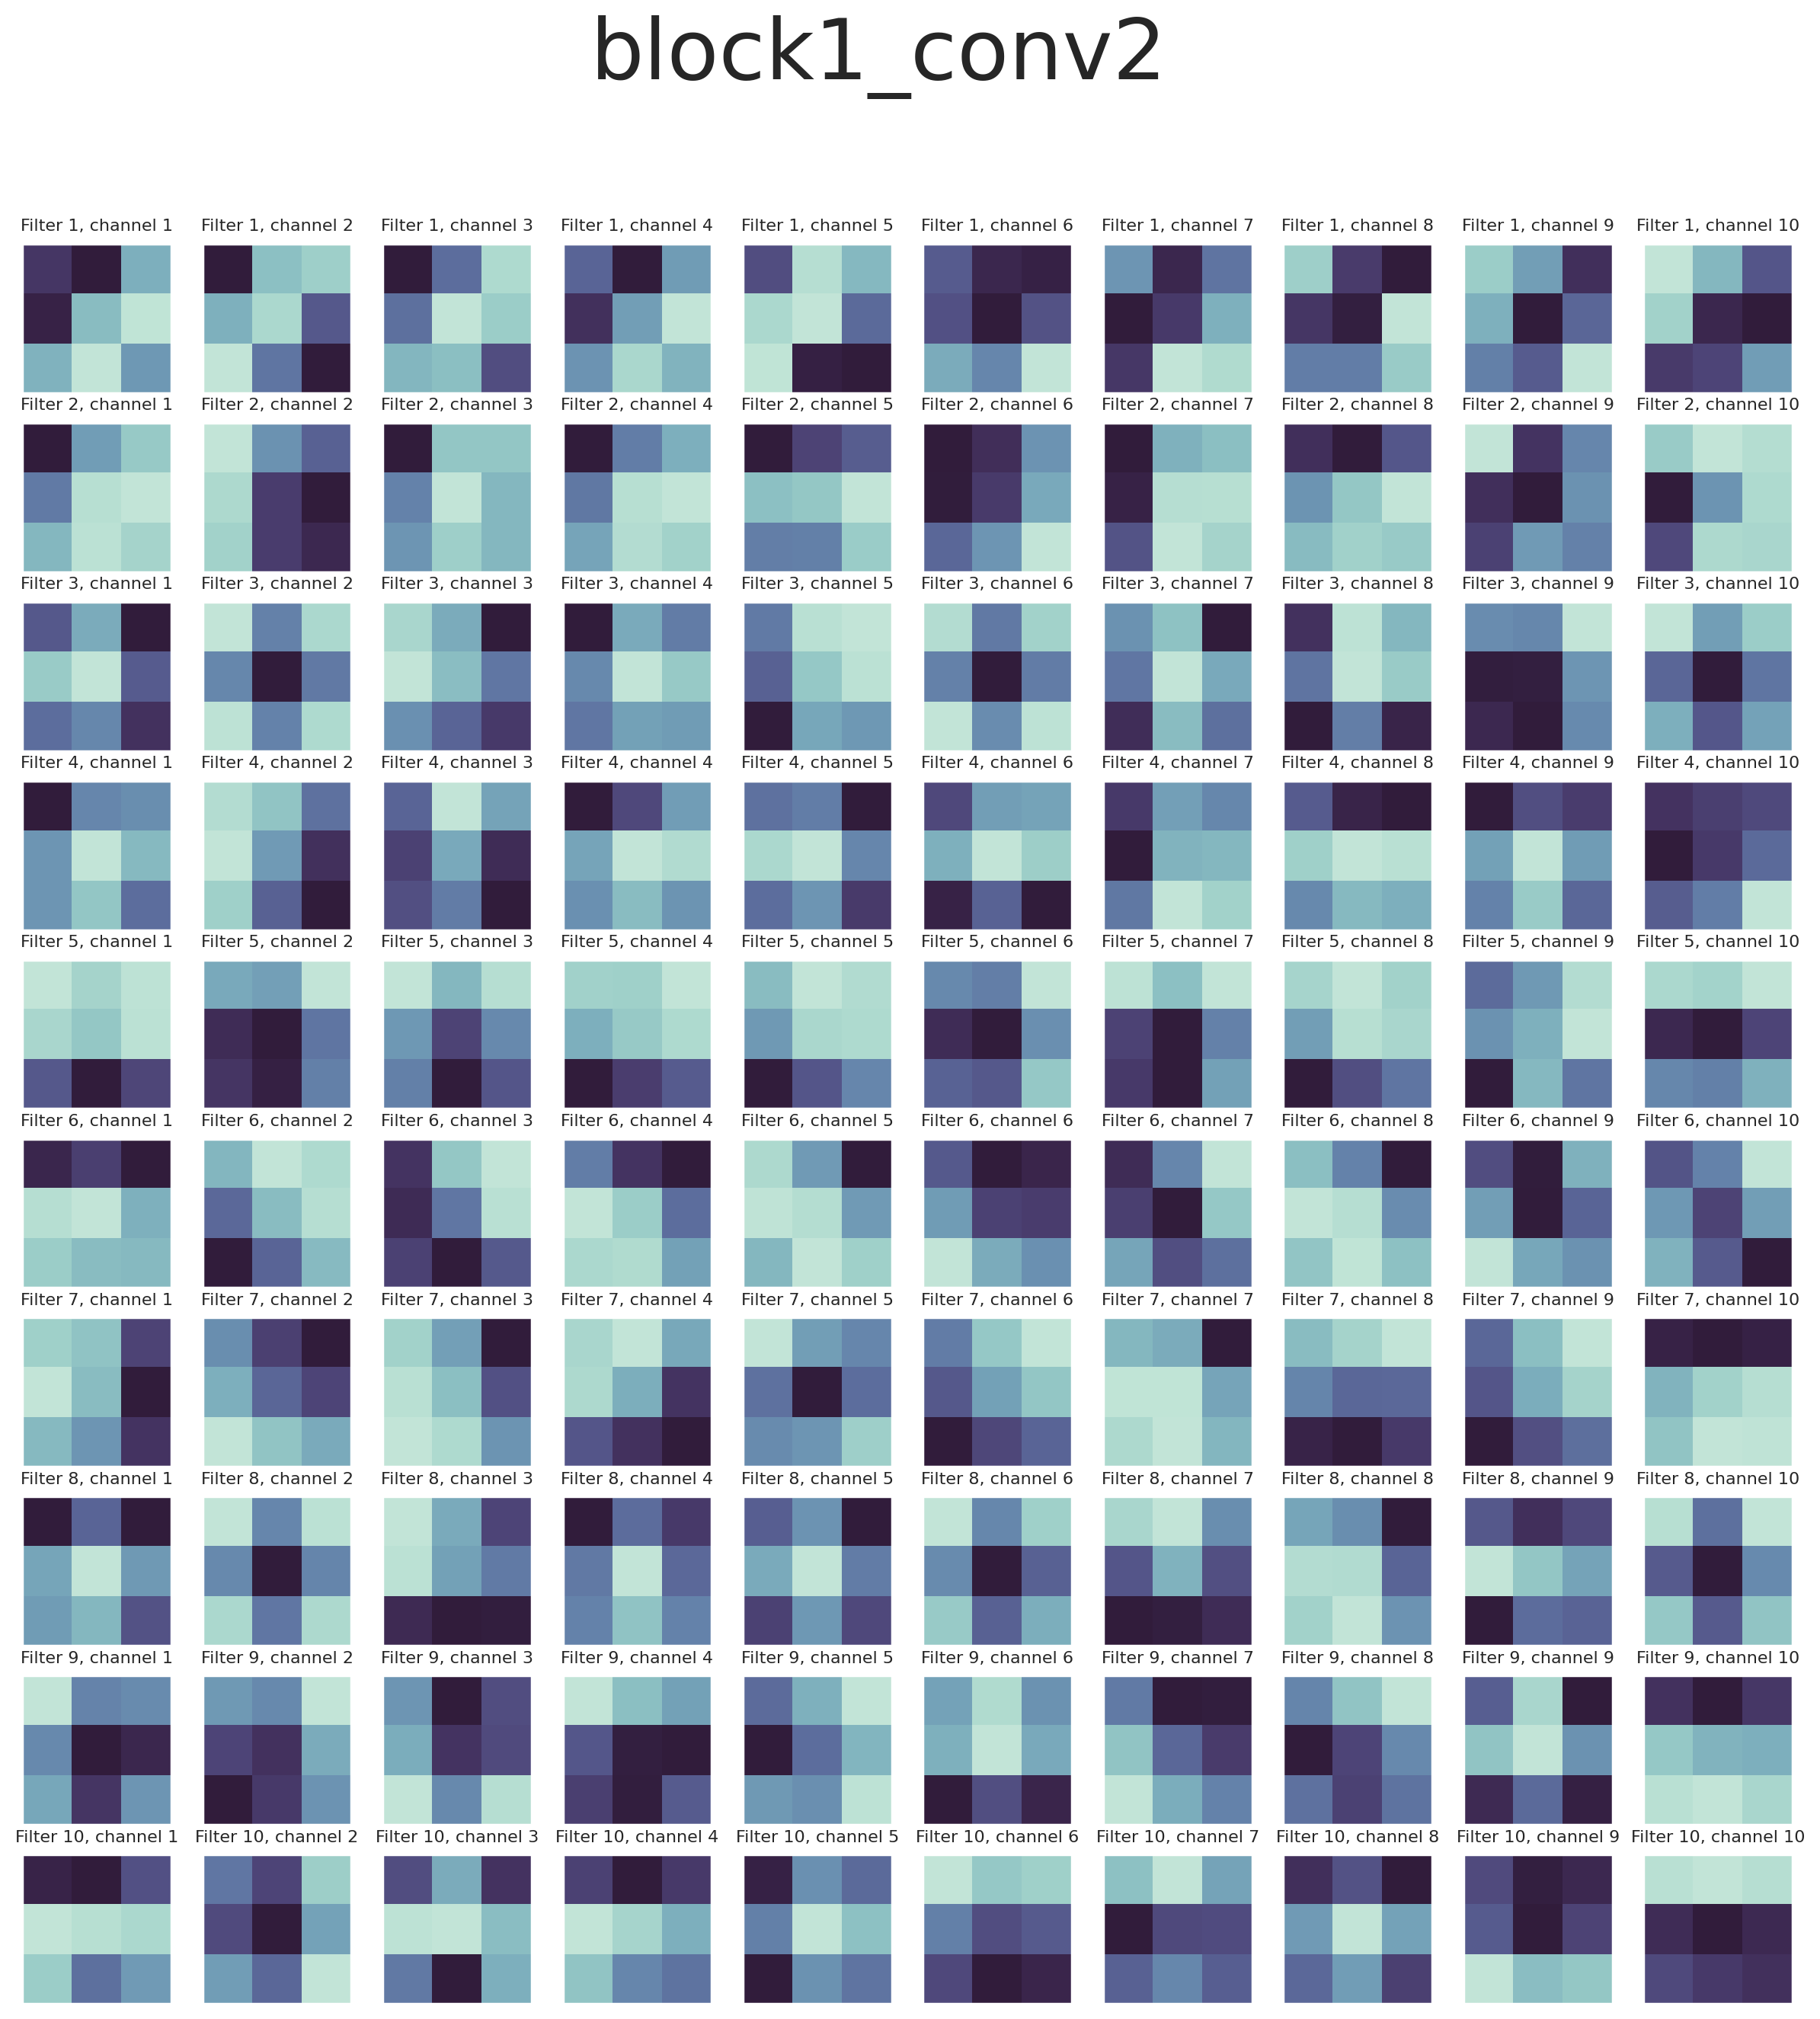

In [ ]:
#block1_conv2 (3, 3, 64, 64)
n_layer = 2
filters = vgg_model.layers[n_layer].get_weights()[0]

n_rows = 10  # n_filters
n_cols = 10  # n_chs

fig,ax = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(15,15))
plt.suptitle(vgg_model.layers[n_layer].name,fontsize=40)
for i in range(n_rows):
	filter = filters[:, :, :, i]
	for j in range(n_cols):
		ax[i][j].imshow(filter[:, :, j], cmap=palette)
		ax[i][j].set_title( 'Filter '+ str((i+1)) + ', channel ' + str((j+1)), size = 8)
		ax[i][j].set_xticks([])
		ax[i][j].set_yticks([])
plt.show()

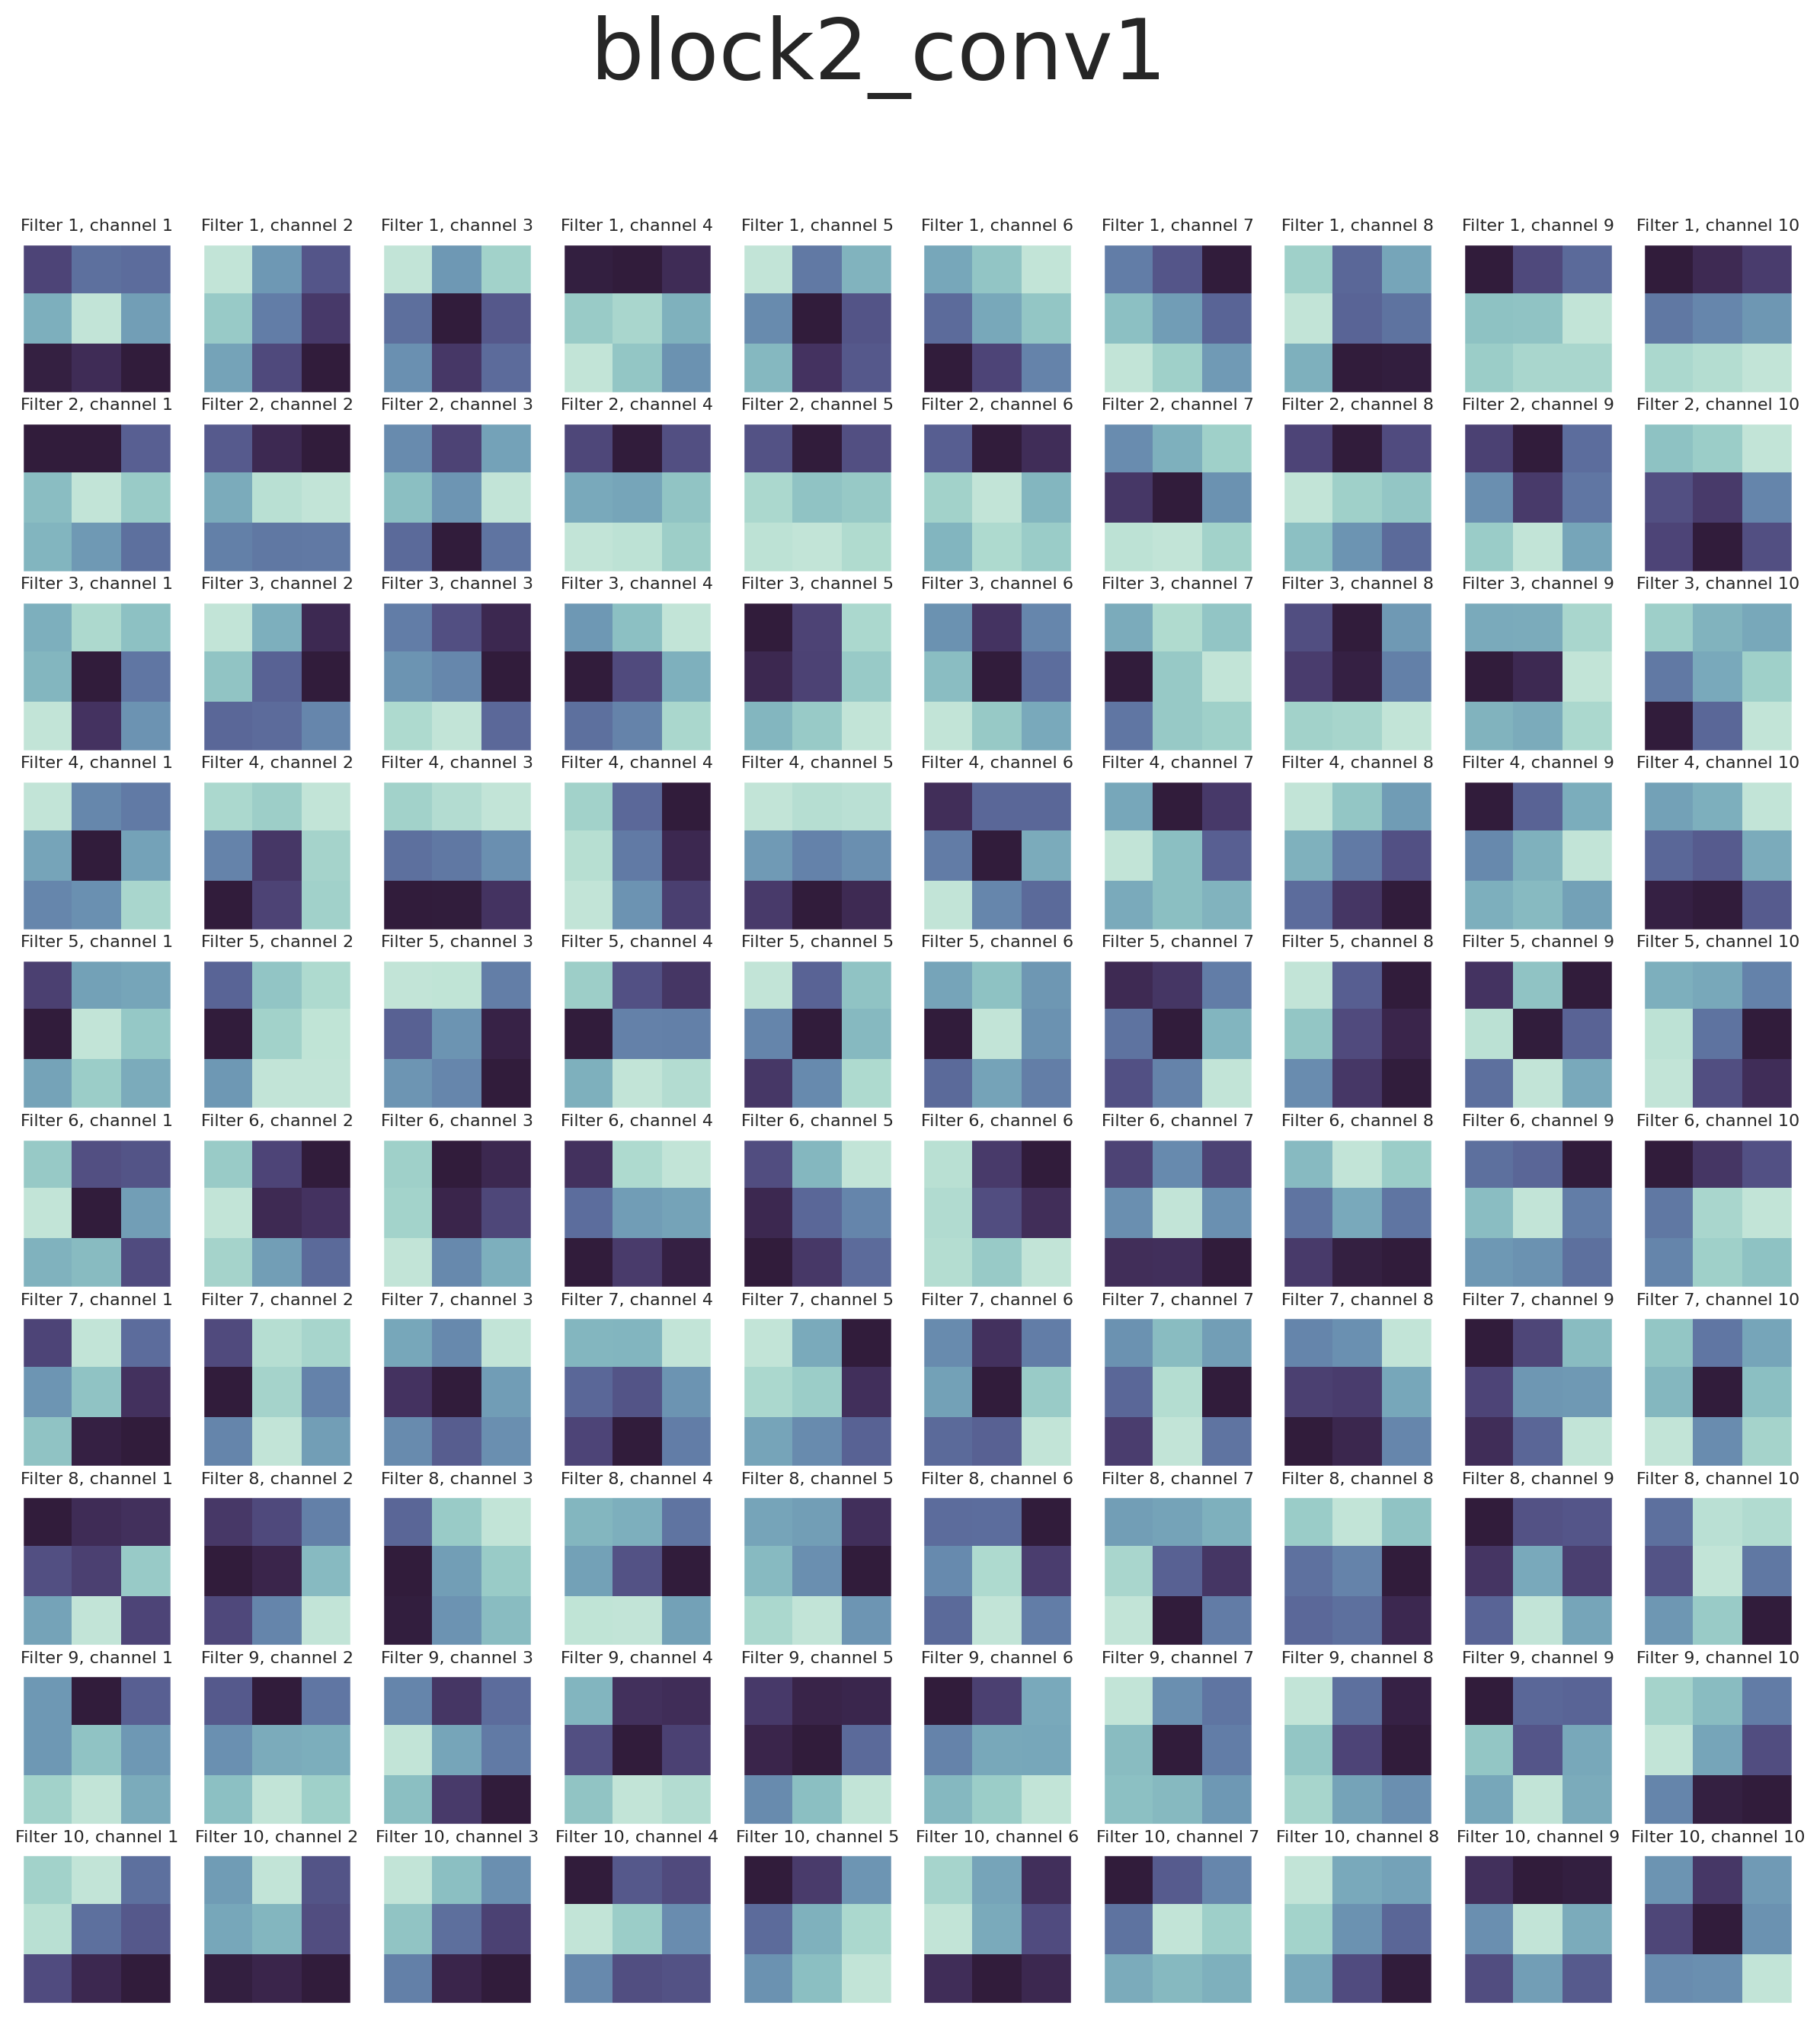

In [ ]:
#block2_conv1 (3, 3, 64, 128)
n_layer = 4
filters = vgg_model.layers[n_layer].get_weights()[0]

n_rows = 10  # n_filters
n_cols = 10  # n_chs

fig,ax = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(15,15))
plt.suptitle(vgg_model.layers[n_layer].name,fontsize=40)
for i in range(n_rows):
	filter = filters[:, :, :, i]
	for j in range(n_cols):
		ax[i][j].imshow(filter[:, :, j], cmap=palette)
		ax[i][j].set_title( 'Filter '+ str((i+1)) + ', channel ' + str((j+1)), size = 8)
		ax[i][j].set_xticks([])
		ax[i][j].set_yticks([])
plt.show()

In [ ]:
from IPython.display import set_matplotlib_formats
from keras.models import Model

set_matplotlib_formats('retina', quality=100)

#n_layer = 1 #96x96 feature map with 32 channels
#n_rows = 2  
n_cols = 16

image = X_train[124]
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

for n_layer in range(1,len(vgg_model.layers)):
  if vgg_model.layers[n_layer].name == 'flatten':
      break;  
  intermediate_layer_model = Model(inputs=vgg_model.input,outputs=vgg_model.get_layer(vgg_model.layers[n_layer].name).output)
  intermediate_output = intermediate_layer_model.predict(image)
  n_channels = intermediate_output.shape[-1]
  n_rows = n_channels//n_cols
  if n_rows == 4:
    high = 7
  if n_rows == 8:
    high = 10.5
  if n_rows == 16:
    high = 24
  if n_rows == 32:
    high = 40
  fig,ax = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20,high))
  plt.suptitle(vgg_model.layers[n_layer].name,fontsize=40)
  aux = 0
  for i in range(n_rows):
    for j in range(n_cols):
      ax[i][j].imshow(intermediate_output[0,:,:,aux], cmap = palette)
      ax[i][j].set_title('Channel '+ str((1+aux)), size = 9)
      ax[i][j].set_xticks([])
      ax[i][j].set_yticks([])
      aux = aux + 1 
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
intermediate_output[0].shape

(3, 3, 512)

In [ ]:
layers_info = {}
vgg_model_layer_names = []
for i in vgg_model.layers:
    layers_info[i.name] = i.get_config()
    vgg_model_layer_names.append(i.name)
vgg_model_layer_names

['input_2',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_pool']

#Fine-Tuning

In [ ]:
# Unfreeze the base model
vgg_model.trainable = True

In [ ]:
import tensorflow as tf


# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account

transfer_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5), # Very low learning rate
              metrics=['accuracy'])

In [ ]:
# Train end-to-end. Be careful to stop before you overfit!
#NOTE : batch_size = 32 because out-of-memory problems!
history=transfer_model.fit(X_train, y_train,
         epochs=3,
         batch_size=32,
         validation_data=(X_test, y_test),
         verbose=1)

Epoch 1/3
11/11 [==============================] - 164s 15s/step - loss: 0.5505 - accuracy: 0.8949 - val_loss: 0.3957 - val_accuracy: 0.8636
Epoch 2/3
11/11 [==============================] - 160s 15s/step - loss: 0.1662 - accuracy: 0.9688 - val_loss: 0.3301 - val_accuracy: 0.9000
Epoch 3/3
11/11 [==============================] - 162s 15s/step - loss: 0.0807 - accuracy: 0.9801 - val_loss: 0.2595 - val_accuracy: 0.9273


In [ ]:
pred_probabilities= transfer_model.predict(X_test)

print('First Five Probs.:\n',pred_probabilities[0:5])

print('\n\nFirst Five Classes:\n',y_test[0:5])

First Five Probs.:
 [[8.3114551e-03 4.4391395e-08 4.3727355e-06 1.3453574e-06 1.3191658e-08
  4.6570840e-06 9.9121678e-01 6.2184400e-09 1.8483492e-05 4.4289912e-04]
 [3.1606007e-05 8.3389455e-07 4.9105614e-07 4.3286916e-04 7.7682202e-08
  8.2891849e-05 6.6054973e-04 4.9805709e-07 9.9815935e-01 6.3087832e-04]
 [1.1008522e-05 8.4783740e-02 8.3534848e-03 2.3249289e-04 8.9094025e-01
  4.2862732e-05 8.4989506e-06 1.5006984e-02 4.3301343e-06 6.1627227e-04]
 [1.9436868e-08 1.4222323e-08 1.1883538e-04 3.5516993e-04 3.2883611e-06
  9.9947160e-01 7.4692471e-06 3.7284641e-05 4.2107863e-06 2.0713144e-06]
 [3.5903900e-09 8.5289340e-04 8.0093268e-06 1.7563510e-06 3.1485125e-02
  2.4394558e-05 2.1551218e-08 9.6714139e-01 9.7328962e-07 4.8560291e-04]]


First Five Classes:
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
# Check accuracy on test set

loss, accuracy = transfer_model.evaluate(X_test, y_test, batch_size=128)


print('\nTest Accuracy=', accuracy)

1/1 [==============================] - 11s 11s/step - loss: 0.2595 - accuracy: 0.9273

Test Accuracy= 0.9272727370262146


Confusion Matrix:
 [[ 7  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  1  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  1  0  0  0  0]
 [ 0  4  0  0  8  0  0  0  0  0]
 [ 0  0  0  1  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0]
 [ 0  1  0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0 11]]


[Text(0, 0.5, 'FT_0'),
 Text(0, 1.5, 'FT_1'),
 Text(0, 2.5, 'FT_2'),
 Text(0, 3.5, 'FT_3'),
 Text(0, 4.5, 'FT_4'),
 Text(0, 5.5, 'FT_5'),
 Text(0, 6.5, 'FT_6'),
 Text(0, 7.5, 'FT_7'),
 Text(0, 8.5, 'FT_8'),
 Text(0, 9.5, 'FT_9')]

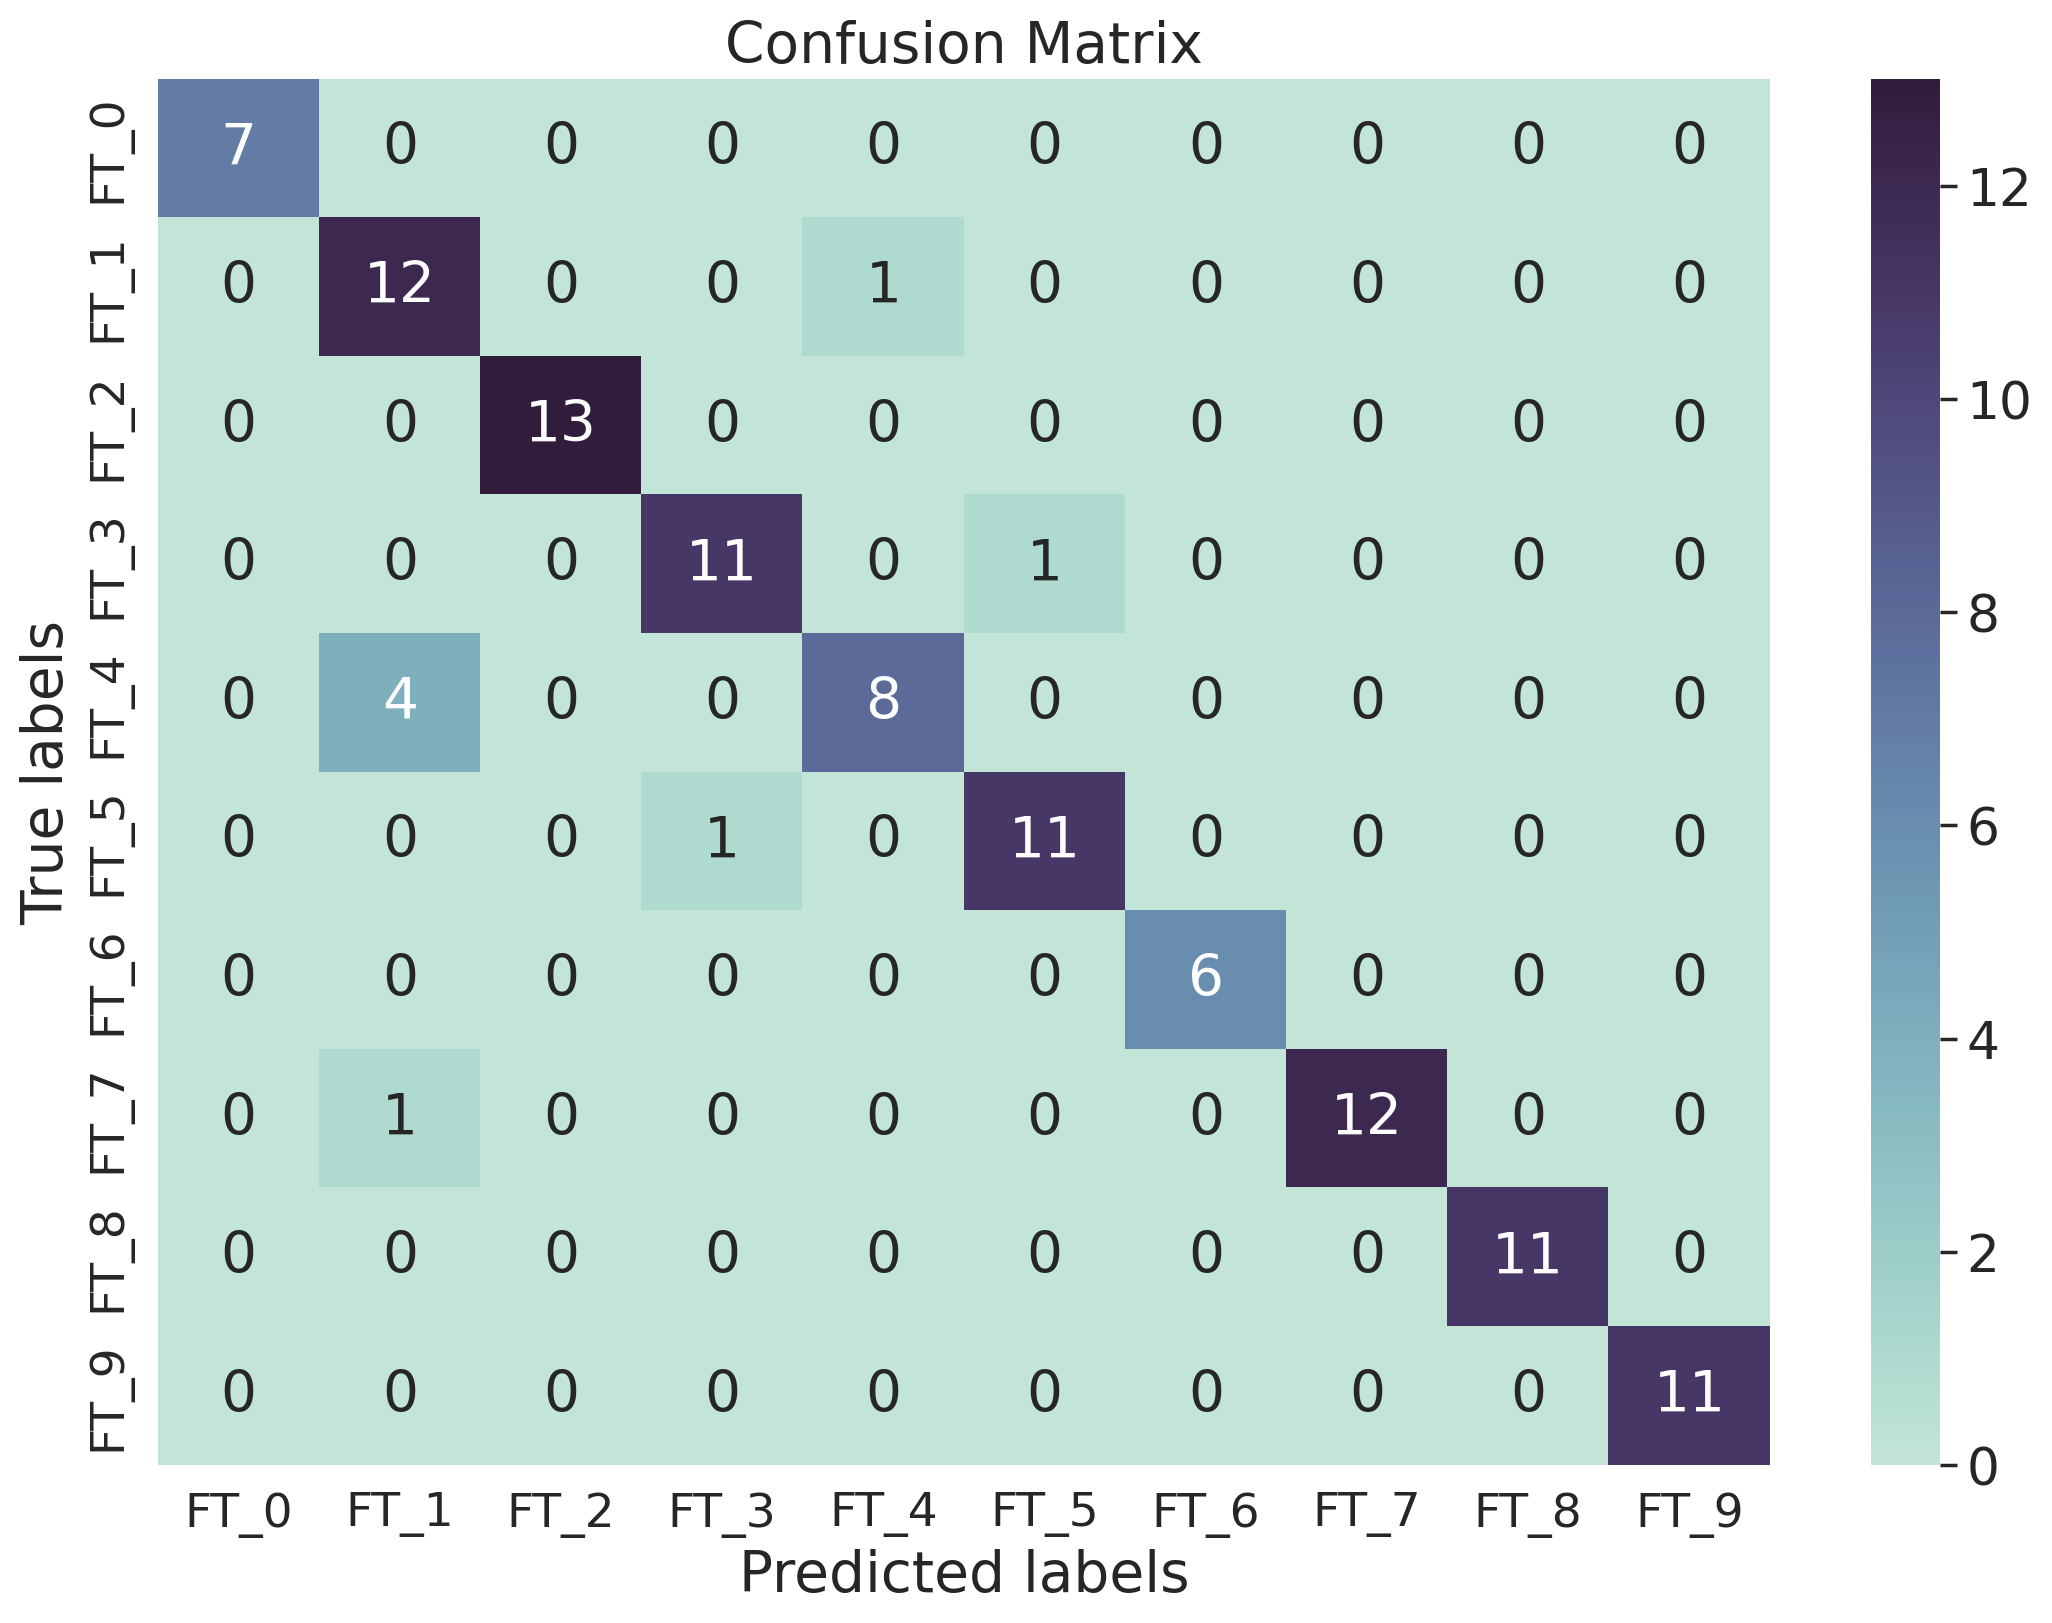

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm

fig = plt.subplots(figsize=(13, 9))

ConfMatrix=cm(np.argmax(y_test,1), np.argmax(pred_probabilities,1))

print('Confusion Matrix:\n',ConfMatrix)

ax= plt.subplot()
palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.set(font_scale=1.7)

sns.heatmap(ConfMatrix, annot=True, ax = ax,cmap = palette); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.rc('xtick', labelsize=17)  
plt.rc('ytick', labelsize=17)   

xTicklabels = []
yTicklabels = []

for i in range(0,10):
  aux= 'FT_' + str(i)
  xTicklabels.append(aux)
  aux2 = 'FT_' + str(i)
  yTicklabels.append(aux2)
ax.xaxis.set_ticklabels(xTicklabels)
ax.yaxis.set_ticklabels(yTicklabels)

In [ ]:
transfer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 softmax_new (Dense)         (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


Train Accuracy:  0.98
Test Accuracy:  0.93


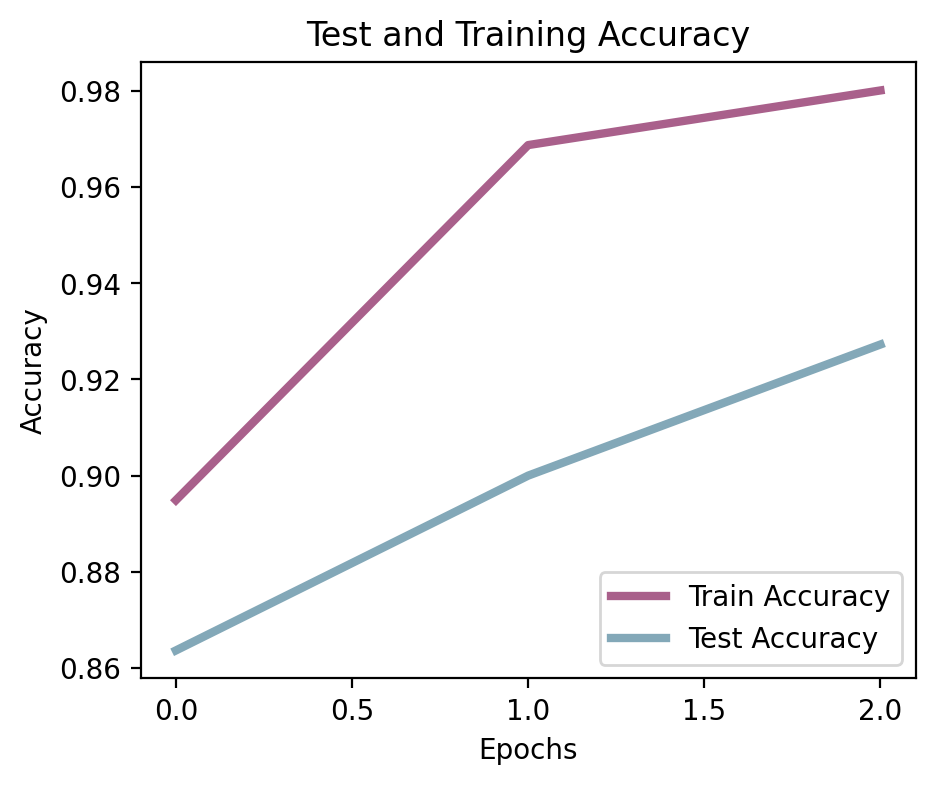

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina', quality=100)

print('Train Accuracy: ',np.round(history.history['accuracy'][-1],2))
print('Test Accuracy: ',np.round(history.history['val_accuracy'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['accuracy'])),history.history['accuracy'],color = purple, linewidth = 3, label='Train Accuracy')
plt.plot(range(0, len(history.history['val_accuracy'])),history.history['val_accuracy'],color = blue, linewidth = 3, label='Test Accuracy')
plt.legend(loc='lower right')

plt.title('Test and Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()

Train Loss:  0.08
Test Loss:  0.26


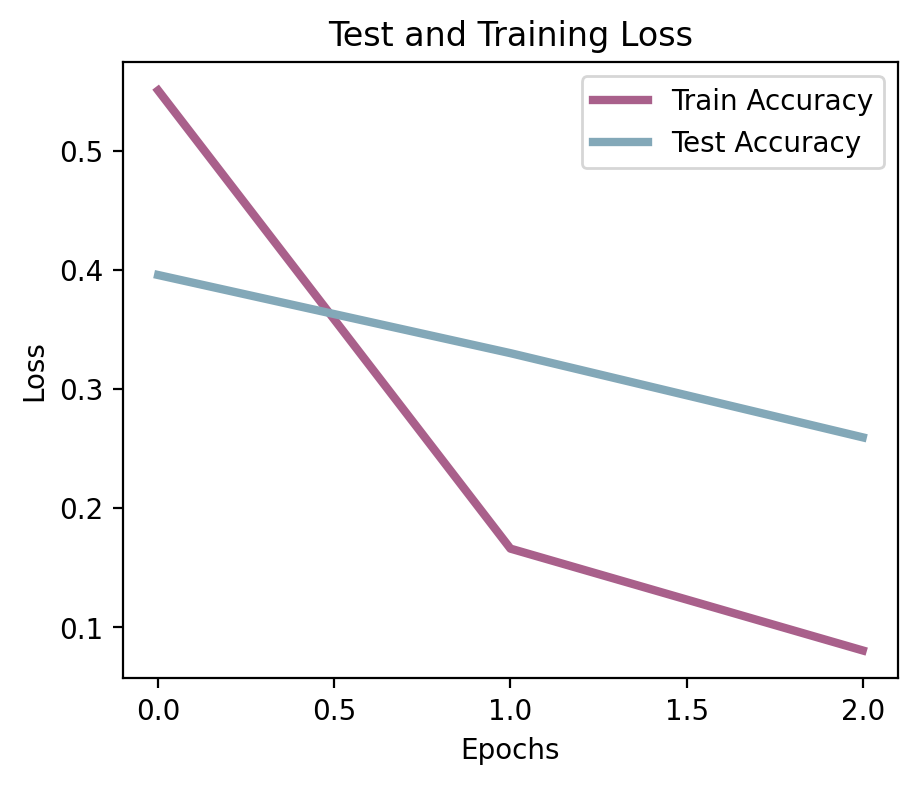

In [ ]:
set_matplotlib_formats('retina', quality=100)

print('Train Loss: ',np.round(history.history['loss'][-1],2))
print('Test Loss: ',np.round(history.history['val_loss'][-1],2))

plt.style.use('default')

figure(figsize=(5, 4))

plt.plot(range(0,len(history.history['loss'])),history.history['loss'],color = purple, linewidth = 3, label='Train Accuracy')
plt.plot(range(0, len(history.history['val_loss'])),history.history['val_loss'],color = blue, linewidth = 3, label='Test Accuracy')
plt.legend(loc='upper right')

plt.title('Test and Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 500

plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)  
plt.rc('axes', labelsize=MEDIUM_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.show()